## Brazil will win World Cup|

# TODO:
- Update all teams to add:
    - 'goals_z'
    - 'g_z'
    - 'boxtouches_z'
    - 'progpasses_z'
    - 'progruns_z',
    
- Maybe add miles from country? 
- Add Continent of country
- Continent of winners
    - South America
    - Europe

# Cecklist

## Frame the problem and look at big picture
[X] Define the objective.

    - predict winners of each game in world cup

[X] What are the current solutions if any

    - Many

[X] How should performance be measures

    - How well predictions come to fruition. 

[X] List the assumptions you or others have made so far.

    - spi will predict winner
    - gather SPI of starters for each team
    - use cummulative SPI for each team 
    - performance in qualifying tournaments and performance in fifa
    - performance in qualifying rounds and performance in elimination

[ ] Verify assumptions if possible



## Get the Data
[X] List data you need and how much is needed

    - Historical World Cup data for wins and losses?
    - SPI of all starters on national teams

[ ] Find and document where you get data

[ ] Get the data

[ ] Convert the data to a format you can manipulate

[ ] Check size and type of data (time series, sample, geographial, etc.)

[ ] Sample a test set, put it aside, and don't look at it. 


## Explore the data to gain insights
Note: try to get insights from a field expert for these steps.

[ ] Create a copy of the data for exploration

[ ] Create a jupyter notebook to keep record of data 
exploration

[ ] Study each attribute and its characteristics:

    - Name    
    - Type (categorical, int/float, bount/unbounded, text, structured, etc.)
            - .info(), .describe(), .shape, .head()        
    - Noisiness and type of noise (stochastic, outliers, rounding errors, etc.   
    - Possibly useful for the task?
    - Type of distribution (Gaussian, uniform, logarithmic, etc.)

[ ] For supervised learning, Identify the target attribute(s)

[ ] Visualize the data.

[ ] Study the correlations between attributes

[ ] Identify promising transformations you may want to apply. 

[ ] Document what you have learned
    

## Prepare the data to better expose the underlying data patterns to ML algorithms
Notes: 

    - Work on copies of data (Keep the original dataset intact).
    - Write functions for all data transformation you apply, for 5 reasons:
        1. You can easily prepare the data the next time you get a fresh dataset
        2. ability to apply these transformations in future projects
        3. To clean and prepare the test set
        4. To clean and new data instances
        5. To make it easy to treate your preparation choices as hyperparamteres
 

[ ] **Data Clearning**:

    - Fix or remove outliers (optional)
    - Fill in missing values (e.g., with zero, mean, median, etc.) or drop rows (columns)

[ ] Feature Selection (optional)

    - Drop the attributes that provide no useful information for the task.

[ ] **Feature engineering**, where appropriate:

    - Discretize continuous features.
    - Decompose features (e.g., categorical, date/time, etc.)
    - Aggregate features into promising new features.

[ ] **Feature Scaling** 

    - Standardize or normalize features


## Explore many different models and short-list the best ones
note: try to automate these steps as much as possible.


[ ] Train many quick and dirty models from different categories, using standard parameters.

    - regression 
    - linear
    - naive
    - Bayes
    - SVM
    - Random Forest
    - Neural net
    - etc.

[ ] Measure and compare their performance

    - For each model, use **N-fold cross-validation** and compute the standard deviation of their performance.

[ ] Analyze the most significant variables for each algorithm

[ ] Analyze the types of errors the models make

[ ] Quick round of feature selection and engineering

[ ] One or two more quick iterations of the 5 previous steps

[ ] short-list the top three to five most promising models, preferring models that make different types of errors


## Fine-tune your models and combine them into a solution.
Note: 

    - you will want to use as much data as possible for this step, especially as you move toward the end of fine-tuning.
    - automate what you can
    

[ ] Find-tune hyperparameters using **cross-validation**

    - treat your data transformation choices asa hyperparameters, especially when you are note sure about them (e.g., should I replace missing values with zero or the median value, etc.)
    - Unless there are very few hyperparameter values to explore, prefer random search over grid search. If training is very long, you might prefer a Bayesian optimization approach(e.g., a gaussian process priors)

[ ] Try **Ensemble methods**. Combining your best models will often perform better than running them indiviually.

[ ] Once you are confident about your final model, measure its performance on the test set to estimate the generalization error. 

**Note: Don't tweak your model after measuring the generalization error: you would just start overfitting the test set.**


## Present solution

[ ] Document what you have done

[ ] Create Presentation


## Launch, monitor, and Maintain

### https://www.kaggle.com/code/launay10christian/world-cup-prediction/notebook

Good source for baseline

## Glossary

**SPI** - rating designed to provide the best possible objective representation of a team's current overall skill level.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker
import matplotlib.ticker as plticker
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

import matplotlib.pyplot as pyplot
import seaborn as sns

### Variables for wc 2018, 2014, 2010, 2004, 2000 and for teams in 2022 world cup

In [4]:
years = [2018, 2014, 2010, 2006, 2002]

In [5]:
teams_2022 = ['Qatar', 'Netherlands', 'Senegal', 'Ecuador', 'England', 'USA', 'Wales', 'Iran', 'Argentina', 'Poland', 'Mexico', 'Saudi Arabia', 'France', 'Denmark', 'Tunisia', 'Australia', 'Germany', 'Spain', 'Japan', 'Costa Rica', 'Belgium', 'Croatia', 'Canada', 'Morocco', 'Brazil', 'Switzerland', 'Serbia', 'Cameroon', 'Portugal', 'Uruguay', 'Ghana', 'Korea Republic']

## World Cup 2018 Matches  

In [6]:
matches = pd.read_csv('wc_matches.csv')

In [7]:
matches.head()

,date,league_id,league,team1,team2,spi1,spi2,prob1,prob2,probtie,proj_score1,proj_score2,score1,score2,xg1,xg2,nsxg1,nsxg2,adj_score1,adj_score2
0,2018-06-14,1908,FIFA World Cup,Russia,Saudi Arabia,70.14,51.33,0.6615,0.1200,0.2184,2.03,0.73,5,0,1.62,0.20,1.55,0.11,4.18,0.00
1,2018-06-15,1908,FIFA World Cup,Egypt,Uruguay,62.46,79.52,0.1845,0.5433,0.2723,0.82,1.61,0,1,0.42,1.94,0.65,1.94,0.00,1.05
2,2018-06-15,1908,FIFA World Cup,Morocco,Iran,72.33,65.57,0.4004,0.2667,0.3330,1.13,0.86,0,1,0.86,0.72,0.57,0.36,0.00,1.05
3,2018-06-15,1908,FIFA World Cup,Portugal,Spain,83.47,91.30,0.2459,0.4809,0.2732,1.07,1.60,3,3,1.15,1.63,0.80,2.59,3.15,3.15
4,2018-06-16,1908,FIFA World Cup,France,Australia,87.18,61.69,0.7694,0.0746,0.1560,2.61,0.69,2,1,1.38,1.03,1.24,0.39,2.10,1.05


In [8]:
matches.columns

Index(['date', 'league_id', 'league', 'team1', 'team2', 'spi1', 'spi2',
       'prob1', 'prob2', 'probtie', 'proj_score1', 'proj_score2', 'score1',
       'score2', 'xg1', 'xg2', 'nsxg1', 'nsxg2', 'adj_score1', 'adj_score2'],
      dtype='object')

In [9]:
matches['date'] =  pd.to_datetime(matches['date'],  format="%Y/%m/%d")


In [10]:
matches = matches.set_index('date')

In [11]:
# matches.plot()

In [12]:
# matches['xg2'].plot()

In [13]:
# axs = matches.plot.area(figsize=(34, 26), subplots=True)

In [14]:
# matches.plot.scatter(x="xg1", y="nsxg1", alpha=0.5)


overview of the available plot methods:

In [15]:
[
    method_name
    for method_name in dir(matches.plot)
    if not method_name.startswith("_")
]

['area',
 'bar',
 'barh',
 'box',
 'density',
 'hexbin',
 'hist',
 'kde',
 'line',
 'pie',
 'scatter']

<AxesSubplot:>

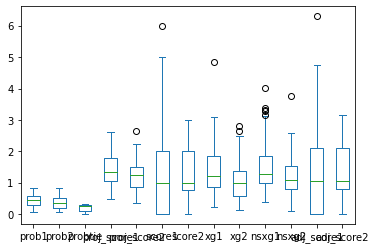

In [16]:
new_df = matches.drop(columns=['league_id', 'spi1', 'spi2'])
new_df.plot.box()

In [17]:
# fig, axs = plt.subplots(figsize=(12, 4))        # Create an empty matplotlib Figure and Axes
# new_df.plot.area(ax=axs)                   # Use pandas to put the area plot on the prepared Figure/Axes
# axs.set_ylabel("Date")          # Do any matplotlib customization you like
# fig.savefig("testing.png")           # Save the Figure/Axes using the existing matplotlib method.


In [18]:
# df = df.rename(columns=str.lower)

In [19]:
new_df.columns

Index(['league', 'team1', 'team2', 'prob1', 'prob2', 'probtie', 'proj_score1',
       'proj_score2', 'score1', 'score2', 'xg1', 'xg2', 'nsxg1', 'nsxg2',
       'adj_score1', 'adj_score2'],
      dtype='object')

In [20]:
new_df.groupby("score1").mean()

,prob1,prob2,probtie,proj_score1,proj_score2,score2,xg1,xg2,nsxg1,nsxg2,adj_score1,adj_score2
score1,,,,,,,,,,,,
0,0.302400,0.458224,0.239412,1.114118,1.456471,1.529412,0.829412,1.115294,1.192353,1.259412,0.000000,1.547059
1,0.451336,0.360277,0.188395,1.412727,1.200000,1.136364,1.442727,1.177727,1.576818,1.128182,1.050000,1.174091
2,0.500573,0.343227,0.156187,1.515333,1.140000,0.866667,1.669333,1.028000,1.751333,1.415333,1.970667,0.910000
3,0.537300,0.261820,0.200880,1.696000,1.040000,1.200000,1.840000,0.866000,1.914000,1.282000,3.000000,1.260000
4,0.569200,0.430800,0.000000,1.395000,1.135000,2.500000,1.645000,0.825000,0.840000,1.465000,4.200000,2.625000
5,0.708950,0.098750,0.192250,2.250000,0.695000,1.000000,3.225000,0.655000,1.830000,0.770000,4.460000,1.050000
6,0.757400,0.053800,0.188900,2.040000,0.360000,1.000000,3.060000,1.020000,1.350000,0.890000,6.300000,1.050000


In [21]:
# new_df.groupby("score1")["xg1"].mean()

In [22]:
# new_df[["score1", "xg1"]].groupby("score1").mean()

In [23]:
# new_df.groupby(["score1", "xg1"])["nsxg1"].mean()

In [24]:
# new_df.groupby("score1")["score1"].count()

In [25]:
# new_df.sort_values(by="score1").head()

In [26]:
# new_df['team1'].value_counts()

In [27]:
# #Adding goal difference and establishing who is the winner 
# winner = []
# for i in range (len(matches['team2'])):
#     if matches ['score2'][i] > matches['score1'][i]:
#         winner.append(matches['team2'][i])
#     elif matches['score2'][i] < matches ['score1'][i]:
#         winner.append(matches['team1'][i])
#     else:
#         winner.append('Draw')
# matches['winning_team'] = winner

# #adding goal difference column
# matches['goal_difference'] = np.absolute(matches['score2'] - matches['score1'])

# # matches.head()

In [28]:
matches.shape

(64, 19)

## World Cup Comparisons Data

In [29]:
comparisons = pd.read_csv('world_cup_comparisons.csv')

In [30]:
comparisons.columns

Index(['player', 'season', 'team', 'goals_z', 'xg_z', 'crosses_z',
       'boxtouches_z', 'passes_z', 'progpasses_z', 'takeons_z', 'progruns_z',
       'tackles_z', 'interceptions_z', 'clearances_z', 'blocks_z', 'aerials_z',
       'fouls_z', 'fouled_z', 'nsxg_z'],
      dtype='object')

In [31]:
comparisons.shape

(5899, 19)

### Change comparisons to world cups 2018, 2014, and 2010, 2004, 2000

comparisons years 2000-2018

In [32]:
years

[2018, 2014, 2010, 2006, 2002]

In [33]:
comparisons['season'].value_counts()

2018    560
2006    559
2014    558
2010    550
2002    537
1998    533
1986    399
1994    397
1990    389
1982    374
1978    266
1970    265
1974    258
1966    254
Name: season, dtype: int64

In [34]:
comparisons = comparisons.loc[comparisons['season'].isin(years)]

In [35]:
comparisons.shape

(2764, 19)

comparisons teams that are in world cup 2022

In [36]:
comparisons = comparisons.loc[comparisons['team'].isin(teams_2022)]

In [37]:
comparisons.shape

(1837, 19)

In [38]:
comparisons.head()

,player,season,team,goals_z,xg_z,crosses_z,boxtouches_z,passes_z,progpasses_z,takeons_z,progruns_z,tackles_z,interceptions_z,clearances_z,blocks_z,aerials_z,fouls_z,fouled_z,nsxg_z
0,Cristian Pavón,2018,Argentina,-0.42,-0.55,0.08,-0.24,-0.61,-0.72,-0.05,0.15,0.30,-0.79,-0.80,-0.45,-0.23,-0.38,-0.91,-0.58
1,Eduardo Salvio,2018,Argentina,-0.42,-0.50,-0.51,0.64,0.02,-0.46,-0.05,0.48,0.61,0.67,0.32,-0.45,0.21,-1.11,0.68,-0.03
2,Enzo Pérez,2018,Argentina,-0.42,0.11,-0.51,-0.69,0.27,-0.65,-0.36,-0.34,0.35,-0.22,-0.80,-0.45,-0.89,0.72,0.04,-0.66
3,Federico Fazio,2018,Argentina,-0.42,-0.59,-0.51,-0.69,-0.97,-0.91,-0.67,-0.84,-0.82,-0.79,-0.64,-0.45,0.21,-1.11,-0.59,-0.77
4,Franco Armani,2018,Argentina,-0.42,-0.59,-0.51,-0.80,-0.67,0.64,-0.67,-0.67,-0.82,-0.79,-0.64,-0.45,-0.89,-1.11,-0.91,-0.77


In [39]:
comparisons.tail()

,player,season,team,goals_z,xg_z,crosses_z,boxtouches_z,passes_z,progpasses_z,takeons_z,progruns_z,tackles_z,interceptions_z,clearances_z,blocks_z,aerials_z,fouls_z,fouled_z,nsxg_z
2759,Mario Regueiro,2002,Uruguay,-0.41,-0.65,0.02,0.18,-1.15,-0.89,1.49,0.10,-0.45,-0.16,-0.75,-0.52,-0.31,-0.80,1.08,-0.75
2760,Pablo García,2002,Uruguay,-0.41,-0.07,0.02,-0.74,1.53,0.48,-0.21,0.65,2.76,2.24,-0.05,1.47,0.10,0.33,0.72,0.42
2761,Richard Morales,2002,Uruguay,1.70,1.85,-0.56,1.41,-1.38,-1.08,-0.77,-1.01,-0.95,-1.01,-0.75,-0.52,0.10,-0.80,-0.71,-0.35
2762,Ronald Paolo Montero Iglesias,2002,Uruguay,-0.41,-0.65,-0.56,-0.74,1.76,1.41,0.36,1.76,0.65,0.38,2.31,2.73,2.19,0.33,-0.71,-0.60
2763,Sebastián Abreu,2002,Uruguay,-0.41,0.64,-0.56,0.64,-1.10,-1.01,-0.21,-0.46,-0.45,-0.83,-0.47,-0.52,0.94,1.84,0.36,-0.60


In [40]:
year2002 = [2002]
year2006 = [2006]
year2010 = [2010]
year2014 = [2014]
year2018 = [2018]

# Germany

## 2010

In [41]:
comparisons = comparisons.drop(columns = ['player'])


In [42]:
comparisons

,season,team,goals_z,xg_z,crosses_z,boxtouches_z,passes_z,progpasses_z,takeons_z,progruns_z,tackles_z,interceptions_z,clearances_z,blocks_z,aerials_z,fouls_z,fouled_z,nsxg_z
0,2018,Argentina,-0.42,-0.55,0.08,-0.24,-0.61,-0.72,-0.05,0.15,0.30,-0.79,-0.80,-0.45,-0.23,-0.38,-0.91,-0.58
1,2018,Argentina,-0.42,-0.50,-0.51,0.64,0.02,-0.46,-0.05,0.48,0.61,0.67,0.32,-0.45,0.21,-1.11,0.68,-0.03
2,2018,Argentina,-0.42,0.11,-0.51,-0.69,0.27,-0.65,-0.36,-0.34,0.35,-0.22,-0.80,-0.45,-0.89,0.72,0.04,-0.66
3,2018,Argentina,-0.42,-0.59,-0.51,-0.69,-0.97,-0.91,-0.67,-0.84,-0.82,-0.79,-0.64,-0.45,0.21,-1.11,-0.59,-0.77
4,2018,Argentina,-0.42,-0.59,-0.51,-0.80,-0.67,0.64,-0.67,-0.67,-0.82,-0.79,-0.64,-0.45,-0.89,-1.11,-0.91,-0.77
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2759,2002,Uruguay,-0.41,-0.65,0.02,0.18,-1.15,-0.89,1.49,0.10,-0.45,-0.16,-0.75,-0.52,-0.31,-0.80,1.08,-0.75
2760,2002,Uruguay,-0.41,-0.07,0.02,-0.74,1.53,0.48,-0.21,0.65,2.76,2.24,-0.05,1.47,0.10,0.33,0.72,0.42
2761,2002,Uruguay,1.70,1.85,-0.56,1.41,-1.38,-1.08,-0.77,-1.01,-0.95,-1.01,-0.75,-0.52,0.10,-0.80,-0.71,-0.35
2762,2002,Uruguay,-0.41,-0.65,-0.56,-0.74,1.76,1.41,0.36,1.76,0.65,0.38,2.31,2.73,2.19,0.33,-0.71,-0.60


In [43]:
ger = ["Germany"]

In [44]:
ger_year = comparisons.loc[comparisons["team"].isin(ger)]

In [45]:
ger2010year = ger_year.loc[ger_year["season"].isin(year2010)]

In [46]:
ger2010xg = ger2010year.sort_values(by=["goals_z"], ascending=False)

In [47]:
ger2010xg13 = ger2010xg.head(13)

#### top 13 players from Germany in 2010 by XG

### Remove columns

'boxtouches_z', 'progpasses_z', 'progruns_z'

In [48]:
ger2010xg13 = ger2010xg13.drop(columns=['season', 'team'])


In [49]:
ger2010 = ger2010xg13.mean()

In [50]:
ger2010

goals_z            0.816923
xg_z               0.433846
crosses_z         -0.024615
boxtouches_z       0.452308
passes_z           0.194615
progpasses_z      -0.104615
takeons_z          0.006154
progruns_z         0.384615
tackles_z          0.047692
interceptions_z    0.056923
clearances_z      -0.066923
blocks_z           0.276154
aerials_z          0.296154
fouls_z           -0.387692
fouled_z          -0.258462
nsxg_z             0.276154
dtype: float64

In [51]:
# (.513077 + .328462) / .816923

### Fouled

In [52]:
# -0.134615 - -0.294615

# Setup New DF for derived stats

In [53]:
# # initialize list of lists
# data = [['Germany', 2010, 0.816923, 0.513077, 0.458462, -0.367692, 0.142308, 1.0301]]
  
# # Create the pandas DataFrame
# stats_df = pd.DataFrame(data, columns=['Country', 'Year', 'goals_z', 'xg_z', 'boxtouches_z', 'progpasses_z', 'progruns_z', 'new_xg'])
  

In [54]:
# stats_df['Fouled'] = 0.16
# stats_df['results'] = 3
# stats_df

## 2014

In [53]:
ger2014year = ger_year.loc[ger_year["season"].isin(year2014)]

In [54]:
ger2014xg = ger2014year.sort_values(by=["goals_z"], ascending=False)

In [55]:
ger2014xg13 = ger2014xg.head(13)

In [56]:
ger2014xg13 = ger2014xg13.drop(columns=['season', 'team',])


In [57]:
ger2014 = ger2014xg13.mean()

In [58]:
ger2014

goals_z            0.755385
xg_z               0.614615
crosses_z          0.071538
boxtouches_z       0.436923
passes_z           0.516923
progpasses_z       0.344615
takeons_z         -0.132308
progruns_z        -0.006154
tackles_z          0.671538
interceptions_z   -0.043846
clearances_z      -0.240769
blocks_z          -0.013846
aerials_z         -0.113846
fouls_z           -0.118462
fouled_z           0.043077
nsxg_z             0.396154
dtype: float64

In [59]:
# (.719231 + .527692) / 0.755385

### Fouled

In [60]:
# 0.186154 - 0.022308

In [61]:
# new_row = {'Country': 'Germany', 'Year': 2014, 'goals_z': 0.755385, 'xg_z': 0.719231, 'boxtouches_z': 0.601538, 'progpasses_z': 0.316154, 'progruns_z': 0.198462, 'new_xg': 1.65071, 'Fouled': 0.163846, 'results': 1}

# stats_df = stats_df.append(new_row, ignore_index=True)

In [62]:
# stats_df

## 2018 

In [63]:
ger2018year = ger_year.loc[ger_year["season"].isin(year2018)]

In [64]:
ger2018xg = ger2018year.sort_values(by=["goals_z"], ascending=False)

In [65]:
ger2018xg13 = ger2018xg.head(13)

In [66]:
ger2018xg13 = ger2018xg13.drop(columns=['season', 'team'])


In [67]:
ger2018 = ger2018xg13.mean()

In [68]:
ger2018

goals_z           -0.066154
xg_z               0.162308
crosses_z          0.266923
boxtouches_z       0.741538
passes_z           0.566154
progpasses_z       0.604615
takeons_z         -0.193846
progruns_z         0.526923
tackles_z          0.376923
interceptions_z    0.288462
clearances_z      -0.490000
blocks_z          -0.120769
aerials_z         -0.350769
fouls_z           -0.510769
fouled_z          -0.260000
nsxg_z             0.861538
dtype: float64

In [69]:
# (.615385 + 1.417692) / -0.066154

### Fouled

In [70]:
# 0.196923 - -0.323077

In [71]:
# new_row = {'Country': 'Germany', 'Year': 2018, 'goals_z': -0.066154, 
#            'xg_z': 0.615385, 'boxtouches_z': 1.570000, 
#            'progpasses_z': 0.565385, 'progruns_z': 0.930769, 'new_xg': -30.73248, 
#            'Fouled': 0.52, 'results': 32}

# stats_df = stats_df.append(new_row, ignore_index=True)

In [72]:
# stats_df

## 2006

In [73]:
ger2006year = ger_year.loc[ger_year["season"].isin(year2006)]

In [74]:
ger2006xg = ger2006year.sort_values(by=["goals_z"], ascending=False)

In [75]:
ger2006xg13 = ger2006xg.head(13)

In [76]:
ger2006xg13 = ger2006xg13.drop(columns=['season', 'team'])


In [77]:
ger2006 = ger2006xg13.mean()

In [78]:
ger2006

goals_z            0.560000
xg_z               0.225385
crosses_z          0.015385
boxtouches_z       0.206923
passes_z           0.061538
progpasses_z      -0.043077
takeons_z         -0.203077
progruns_z         0.036923
tackles_z          0.370769
interceptions_z   -0.070000
clearances_z      -0.178462
blocks_z          -0.349231
aerials_z         -0.093846
fouls_z           -0.165385
fouled_z          -0.055385
nsxg_z            -0.000769
dtype: float64

In [79]:
# (.482308 + 0.350769) / 0.560000

### Fouled

In [80]:
# .354615 - .220769

In [81]:
# new_row = {'Country': 'Germany', 'Year': 2006, 'goals_z': 0.560000, 
#            'xg_z': 0.482308, 'boxtouches_z': 0.450769, 
#            'progpasses_z': 0.300769, 'progruns_z': 0.272308, 'new_xg': 1.4876375, 
#            'Fouled': 1.4876375, 'results': 3}

# stats_df = stats_df.append(new_row, ignore_index=True)

## 2002

In [82]:
ger2002year = ger_year.loc[ger_year["season"].isin(year2002)]

In [83]:
ger2002xg = ger2002year.sort_values(by=["goals_z"], ascending=False)

In [84]:
ger2002xg13 = ger2002xg.head(13)

In [85]:
ger2002xg13 = ger2002xg13.drop(columns=['season', 'team'])


In [86]:
ger2002 = ger2002xg13.mean()

In [87]:
ger2002

goals_z            0.563077
xg_z               0.288462
crosses_z          0.093846
boxtouches_z       0.223846
passes_z          -0.443846
progpasses_z      -0.369231
takeons_z         -0.342308
progruns_z        -0.298462
tackles_z         -0.030769
interceptions_z   -0.316154
clearances_z      -0.322308
blocks_z          -0.274615
aerials_z          0.026923
fouls_z           -0.260769
fouled_z          -0.017692
nsxg_z             0.113846
dtype: float64

In [88]:
# (.426923 + 0.512308) / 0.563077

### Fouled

In [89]:
# .265385 - .211538

In [90]:
# new_row = {'Country': 'Germany', 'Year': 2002, 'goals_z': 0.563077, 
#            'xg_z': 0.426923, 'boxtouches_z': 0.280769, 
#            'progpasses_z': -0.102308, 'progruns_z': 0.011538, 'new_xg': 1.668032968, 
#            'Fouled': 0.05384699, 'results': 2}

# stats_df = stats_df.append(new_row, ignore_index=True)

In [843]:
ger = pd.concat([ger2018, ger2014, ger2010, ger2006, ger2002], axis=1).T

In [844]:
ger

,goals_z,xg_z,crosses_z,boxtouches_z,passes_z,progpasses_z,takeons_z,progruns_z,tackles_z,interceptions_z,clearances_z,blocks_z,aerials_z,fouls_z,fouled_z,nsxg_z
0,-0.066154,0.162308,0.266923,0.741538,0.566154,0.604615,-0.193846,0.526923,0.376923,0.288462,-0.490000,-0.120769,-0.350769,-0.510769,-0.260000,0.861538
1,0.755385,0.614615,0.071538,0.436923,0.516923,0.344615,-0.132308,-0.006154,0.671538,-0.043846,-0.240769,-0.013846,-0.113846,-0.118462,0.043077,0.396154
2,0.816923,0.433846,-0.024615,0.452308,0.194615,-0.104615,0.006154,0.384615,0.047692,0.056923,-0.066923,0.276154,0.296154,-0.387692,-0.258462,0.276154
3,0.560000,0.225385,0.015385,0.206923,0.061538,-0.043077,-0.203077,0.036923,0.370769,-0.070000,-0.178462,-0.349231,-0.093846,-0.165385,-0.055385,-0.000769
4,0.563077,0.288462,0.093846,0.223846,-0.443846,-0.369231,-0.342308,-0.298462,-0.030769,-0.316154,-0.322308,-0.274615,0.026923,-0.260769,-0.017692,0.113846


In [845]:
ger.rename(index={0: 'Germany18', 1: 'Germany14', 
                 2: 'Germany10', 3: 'Germany06', 4: 'Germany02'}, inplace=True)

In [846]:
ger

,goals_z,xg_z,crosses_z,boxtouches_z,passes_z,progpasses_z,takeons_z,progruns_z,tackles_z,interceptions_z,clearances_z,blocks_z,aerials_z,fouls_z,fouled_z,nsxg_z
Germany18,-0.066154,0.162308,0.266923,0.741538,0.566154,0.604615,-0.193846,0.526923,0.376923,0.288462,-0.490000,-0.120769,-0.350769,-0.510769,-0.260000,0.861538
Germany14,0.755385,0.614615,0.071538,0.436923,0.516923,0.344615,-0.132308,-0.006154,0.671538,-0.043846,-0.240769,-0.013846,-0.113846,-0.118462,0.043077,0.396154
Germany10,0.816923,0.433846,-0.024615,0.452308,0.194615,-0.104615,0.006154,0.384615,0.047692,0.056923,-0.066923,0.276154,0.296154,-0.387692,-0.258462,0.276154
Germany06,0.560000,0.225385,0.015385,0.206923,0.061538,-0.043077,-0.203077,0.036923,0.370769,-0.070000,-0.178462,-0.349231,-0.093846,-0.165385,-0.055385,-0.000769
Germany02,0.563077,0.288462,0.093846,0.223846,-0.443846,-0.369231,-0.342308,-0.298462,-0.030769,-0.316154,-0.322308,-0.274615,0.026923,-0.260769,-0.017692,0.113846


In [847]:
df2 = ger.assign(results=[32, 1, 3, 3, 2])

In [848]:
df2

,goals_z,xg_z,crosses_z,boxtouches_z,passes_z,progpasses_z,takeons_z,progruns_z,tackles_z,interceptions_z,clearances_z,blocks_z,aerials_z,fouls_z,fouled_z,nsxg_z,results
Germany18,-0.066154,0.162308,0.266923,0.741538,0.566154,0.604615,-0.193846,0.526923,0.376923,0.288462,-0.490000,-0.120769,-0.350769,-0.510769,-0.260000,0.861538,32
Germany14,0.755385,0.614615,0.071538,0.436923,0.516923,0.344615,-0.132308,-0.006154,0.671538,-0.043846,-0.240769,-0.013846,-0.113846,-0.118462,0.043077,0.396154,1
Germany10,0.816923,0.433846,-0.024615,0.452308,0.194615,-0.104615,0.006154,0.384615,0.047692,0.056923,-0.066923,0.276154,0.296154,-0.387692,-0.258462,0.276154,3
Germany06,0.560000,0.225385,0.015385,0.206923,0.061538,-0.043077,-0.203077,0.036923,0.370769,-0.070000,-0.178462,-0.349231,-0.093846,-0.165385,-0.055385,-0.000769,3
Germany02,0.563077,0.288462,0.093846,0.223846,-0.443846,-0.369231,-0.342308,-0.298462,-0.030769,-0.316154,-0.322308,-0.274615,0.026923,-0.260769,-0.017692,0.113846,2


In [849]:
# df2.to_csv('germany1.csv')

# Switzerland
* 2010: -1.76 
* 2014: 1.954
* 2018: 2.143

In [98]:
swits = ['Switzerland']

In [99]:
swiss_year = comparisons.loc[comparisons["team"].isin(swits)]

In [100]:
swiss2010year = swiss_year.loc[swiss_year["season"].isin(year2010)]

In [101]:
ch2010xg = swiss2010year.sort_values(by=["xg_z"], ascending=False)

In [102]:
ch2010xg13 = ch2010xg.head(13)

In [103]:
ch2010xg13 = ch2010xg13.drop(columns=['season', 'team'])


In [104]:
ch2010 = ch2010xg13.mean()

In [105]:
ch2010

goals_z           -0.222308
xg_z               0.122308
crosses_z          0.251538
boxtouches_z       0.128462
passes_z          -0.108462
progpasses_z       0.071538
takeons_z          0.090769
progruns_z        -0.068462
tackles_z         -0.446154
interceptions_z    0.276154
clearances_z       0.367692
blocks_z          -0.122308
aerials_z          0.059231
fouls_z            0.429231
fouled_z           0.042308
nsxg_z             0.269231
dtype: float64

In [106]:
# (.122308 + .269231) / -0.222308

### Fouled

In [107]:
# .042308 - .429231

In [108]:
# new_row = {'Country': 'Switzerland', 'Year': 2010, 'goals_z': -0.222308, 'xg_z': 0.122308,
#            'boxtouches_z': 0.128462, 'progpasses_z': 0.071538, 'progruns_z': -0.068462, 
#            'new_xg': -1.7612, 'Fouled': -0.3869, 'results': 32}

# stats_df = stats_df.append(new_row, ignore_index=True)

## 2014

In [850]:
swiss2014year = swiss_year.loc[swiss_year["season"].isin(year2014)]

In [851]:
ch2014xg = swiss2014year.sort_values(by=["xg_z"], ascending=False)

In [852]:
ch2014xg13 = ch2014xg.head(13)

In [853]:
ch2014xg13 = ch2014xg13.drop(columns=['season', 'team'])


In [854]:
ch2014 = ch2014xg13.mean()

In [855]:
ch2014

goals_z            0.387692
xg_z               0.550769
crosses_z          0.022308
boxtouches_z       0.138462
passes_z           0.072308
progpasses_z       0.213077
takeons_z          0.010000
progruns_z         0.050769
tackles_z          0.204615
interceptions_z   -0.194615
clearances_z      -0.060769
blocks_z          -0.215385
aerials_z         -0.130000
fouls_z            0.323077
fouled_z           0.382308
nsxg_z             0.206923
dtype: float64

In [856]:
# (.550769 + .206923) / .387692

### Fouled

In [857]:
# .382308 - .323077

In [858]:
# new_row = {'Country': 'Switzerland', 'Year': 2014,  'goals_z': 0.387692, 'xg_z': 0.550769, 
#            'boxtouches_z': 0.138462, 'progpasses_z': 0.213077, 'progruns_z': 0.050769, 
#            'new_xg': 1.9543, 'Fouled': 0.05923, 'results': 16}

# stats_df = stats_df.append(new_row, ignore_index=True)

In [859]:
# stats_df

## 2018

In [860]:
swiss2018year = swiss_year.loc[swiss_year["season"].isin(year2018)]

In [861]:
ch2018xg = swiss2018year.sort_values(by=["xg_z"], ascending=False)

In [862]:
ch2018xg13 = ch2018xg.head(13)

In [863]:
ch2018xg13 = ch2018xg13.drop(columns=['season', 'team'])


In [864]:
ch2018 = ch2018xg13.mean()

In [865]:
ch2018

goals_z            0.241538
xg_z               0.330769
crosses_z          0.522308
boxtouches_z       0.181538
passes_z           0.219231
progpasses_z       0.113077
takeons_z          0.045385
progruns_z         0.286923
tackles_z          0.679231
interceptions_z    0.503077
clearances_z      -0.172308
blocks_z           0.457692
aerials_z         -0.246923
fouls_z           -0.040000
fouled_z           0.116154
nsxg_z             0.186923
dtype: float64

In [866]:
# (.330769 + .186923) / 0.241538

### Fouled

In [867]:
# .116154 - -0.040000

In [868]:
# new_row = {'Country': 'Switzerland', 'Year': 2018, 'goals_z': 0.241538, 'xg_z': 0.330769, 
#            'boxtouches_z': 0.181538, 'progpasses_z': 0.113077, 'progruns_z': 0.286923, 
#            'new_xg': 2.1433, 'Fouled': 0.1561, 'results': 16}

# stats_df = stats_df.append(new_row, ignore_index=True)

In [869]:
# stats_df

## 2006

In [870]:
swiss2006year = swiss_year.loc[swiss_year["season"].isin(year2006)]

In [871]:
ch2006xg = swiss2006year.sort_values(by=["xg_z"], ascending=False)

In [872]:
ch2006xg13 = ch2006xg.head(13)

In [873]:
ch2006xg13 = ch2006xg13.drop(columns=['season', 'team'])


In [874]:
ch2006 = ch2006xg13.mean()

In [875]:
ch2006

goals_z            0.113077
xg_z               0.003846
crosses_z         -0.050000
boxtouches_z      -0.033077
passes_z           0.225385
progpasses_z       0.148462
takeons_z         -0.013077
progruns_z        -0.072308
tackles_z          0.570769
interceptions_z    0.958462
clearances_z       0.206154
blocks_z          -0.008462
aerials_z          0.479231
fouls_z           -0.151538
fouled_z           0.146154
nsxg_z            -0.044615
dtype: float64

In [876]:
# (.003846 + -0.044615) / 0.113077

### Fouled

In [877]:
# .146154 - -0.151538

In [878]:
# new_row = {'Country': 'Switzerland', 'Year': 2006, 'goals_z': 0.113077, 'xg_z': 0.003846, 
#            'boxtouches_z': -0.033077, 'progpasses_z': 0.148462, 'progruns_z': -0.072308, 
#            'new_xg': -0.360541, 'Fouled': 0.297692, 'results': 16}

# stats_df = stats_df.append(new_row, ignore_index=True)

## 2002 NA

In [879]:
swis = pd.concat([ch2006, ch2010, ch2014, ch2018], axis=1).T

In [880]:
swis

,goals_z,xg_z,crosses_z,boxtouches_z,passes_z,progpasses_z,takeons_z,progruns_z,tackles_z,interceptions_z,clearances_z,blocks_z,aerials_z,fouls_z,fouled_z,nsxg_z
0,0.113077,0.003846,-0.050000,-0.033077,0.225385,0.148462,-0.013077,-0.072308,0.570769,0.958462,0.206154,-0.008462,0.479231,-0.151538,0.146154,-0.044615
1,-0.222308,0.122308,0.251538,0.128462,-0.108462,0.071538,0.090769,-0.068462,-0.446154,0.276154,0.367692,-0.122308,0.059231,0.429231,0.042308,0.269231
2,0.387692,0.550769,0.022308,0.138462,0.072308,0.213077,0.010000,0.050769,0.204615,-0.194615,-0.060769,-0.215385,-0.130000,0.323077,0.382308,0.206923
3,0.241538,0.330769,0.522308,0.181538,0.219231,0.113077,0.045385,0.286923,0.679231,0.503077,-0.172308,0.457692,-0.246923,-0.040000,0.116154,0.186923


In [881]:
swis.rename(index={0: 'Switzerland06', 1: 'Switzerland10', 
                 2: 'Switzerland14', 3: 'Switzerland18'}, inplace=True)

In [882]:
swis

,goals_z,xg_z,crosses_z,boxtouches_z,passes_z,progpasses_z,takeons_z,progruns_z,tackles_z,interceptions_z,clearances_z,blocks_z,aerials_z,fouls_z,fouled_z,nsxg_z
Switzerland06,0.113077,0.003846,-0.050000,-0.033077,0.225385,0.148462,-0.013077,-0.072308,0.570769,0.958462,0.206154,-0.008462,0.479231,-0.151538,0.146154,-0.044615
Switzerland10,-0.222308,0.122308,0.251538,0.128462,-0.108462,0.071538,0.090769,-0.068462,-0.446154,0.276154,0.367692,-0.122308,0.059231,0.429231,0.042308,0.269231
Switzerland14,0.387692,0.550769,0.022308,0.138462,0.072308,0.213077,0.010000,0.050769,0.204615,-0.194615,-0.060769,-0.215385,-0.130000,0.323077,0.382308,0.206923
Switzerland18,0.241538,0.330769,0.522308,0.181538,0.219231,0.113077,0.045385,0.286923,0.679231,0.503077,-0.172308,0.457692,-0.246923,-0.040000,0.116154,0.186923


In [883]:
df2 = swis.assign(results=[10, 19, 11, 14])

- 10 	  Switzerland 	G 	4 	2 	2 	0 	4 	0 	+4 	8 - 2006
- 14 	  Switzerland 	E 	4 	1 	2 	1 	5 	5 	5 	0 - 2018
- 11 	  Switzerland 	E 	4 	2 	0 	2 	6 	7 	7 	0  - 2014
- 19 	  Switzerland 	H 	3 	1 	1 	1 	1 	1 	0 	4 - 2010

In [887]:
df2

,goals_z,xg_z,crosses_z,boxtouches_z,passes_z,progpasses_z,takeons_z,progruns_z,tackles_z,interceptions_z,clearances_z,blocks_z,aerials_z,fouls_z,fouled_z,nsxg_z,results
Switzerland06,0.113077,0.003846,-0.050000,-0.033077,0.225385,0.148462,-0.013077,-0.072308,0.570769,0.958462,0.206154,-0.008462,0.479231,-0.151538,0.146154,-0.044615,10
Switzerland10,-0.222308,0.122308,0.251538,0.128462,-0.108462,0.071538,0.090769,-0.068462,-0.446154,0.276154,0.367692,-0.122308,0.059231,0.429231,0.042308,0.269231,19
Switzerland14,0.387692,0.550769,0.022308,0.138462,0.072308,0.213077,0.010000,0.050769,0.204615,-0.194615,-0.060769,-0.215385,-0.130000,0.323077,0.382308,0.206923,11
Switzerland18,0.241538,0.330769,0.522308,0.181538,0.219231,0.113077,0.045385,0.286923,0.679231,0.503077,-0.172308,0.457692,-0.246923,-0.040000,0.116154,0.186923,14


In [888]:
# df2.to_csv('Switzerland1.csv')

# Spain

In [885]:
es = ['Spain']

In [886]:
es_year = comparisons.loc[comparisons["team"].isin(es)]

In [889]:
es2010year = es_year.loc[es_year["season"].isin(year2010)]

In [890]:
es2010xg = es2010year.sort_values(by=["xg_z"], ascending=False)

In [891]:
es2010xg13 = es2010xg.head(13)

In [892]:
es2010xg13 = es2010xg13.drop(columns=['season', 'team'])


In [893]:
es2010 = es2010xg13.mean()

In [894]:
es2010

goals_z            0.180000
xg_z               0.539231
crosses_z          0.383077
boxtouches_z       0.868462
passes_z           1.156923
progpasses_z       0.320000
takeons_z          0.616923
progruns_z         1.432308
tackles_z          0.753846
interceptions_z    0.910000
clearances_z       0.026923
blocks_z           0.636154
aerials_z          0.286154
fouls_z           -0.138462
fouled_z           0.464615
nsxg_z             0.762308
dtype: float64

In [895]:
# (.539231 + .762308) / .180000

### Fouled

In [896]:
# .464615 - -0.138462

In [897]:
# new_row = {'Country': 'Spain', 'Year': 2010, 'goals_z': 0.180000, 'xg_z': 0.539231, 
#            'boxtouches_z': 0.868462,'progpasses_z': 0.320000, 'progruns_z': 1.432308, 
#            'new_xg': 7.2307, 'Fouled': 0.60307, 'results': 1}

# stats_df = stats_df.append(new_row, ignore_index=True)

## 2014

In [898]:
es2014year = es_year.loc[es_year["season"].isin(year2014)]

In [899]:
es2014xg = es2014year.sort_values(by=["xg_z"], ascending=False)

In [900]:
es2014xg13 = es2014xg.head(13)

In [901]:
es2014xg13 = es2014xg13.drop(columns=['season', 'team'])


In [902]:
es2014 = es2014xg13.mean()

In [903]:
es2014

goals_z            0.243846
xg_z               0.536154
crosses_z         -0.076154
boxtouches_z       0.596923
passes_z           0.770769
progpasses_z      -0.052308
takeons_z         -0.182308
progruns_z         0.489231
tackles_z          1.146154
interceptions_z    0.657692
clearances_z      -0.383077
blocks_z          -0.379231
aerials_z          0.017692
fouls_z           -0.391538
fouled_z           0.333077
nsxg_z             0.412308
dtype: float64

In [904]:
# (.536154 + .412308) / .243846

### Fouled

In [905]:
# 0.333077 - -0.391538

In [906]:
# new_row = {'Country': 'Spain', 'Year': 2014, 'goals_z': 0.243846, 'xg_z': 0.536154, 
#            'boxtouches_z': 0.596923, 'progpasses_z': -0.052308, 'progruns_z': 0.489231, 
#            'new_xg': 3.8895, 'Fouled': 0.724615, 'results': 32}

# stats_df = stats_df.append(new_row, ignore_index=True)

## 2018

In [907]:
es2018year = es_year.loc[es_year["season"].isin(year2018)]

In [908]:
es2018xg = es2018year.sort_values(by=["xg_z"], ascending=False)

In [909]:
es2018xg13 = es2018xg.head(13)

In [910]:
es2018xg13 = es2018xg13.drop(columns=['season', 'team'])


In [911]:
es2018 = es2018xg13.mean()

In [912]:
es2018


goals_z            0.190769
xg_z               0.680769
crosses_z          0.319231
boxtouches_z       0.763077
passes_z           1.410769
progpasses_z       0.267692
takeons_z          0.516923
progruns_z         0.981538
tackles_z          0.420000
interceptions_z    0.449231
clearances_z      -0.392308
blocks_z           0.094615
aerials_z         -0.016923
fouls_z           -0.410000
fouled_z           0.195385
nsxg_z             0.726154
dtype: float64

In [913]:
# (.680769 + .726154) / .190769

### Fouled

In [914]:
# .195385 - -0.410000

In [915]:
# new_row = {'Country': 'Spain', 'Year': 2018, 'goals_z': 0.190769, 'xg_z': 0.680769, 
#            'boxtouches_z': 0.763077, 'progpasses_z': 0.267692, 'progruns_z': 0.981538, 
#            'new_xg': 7.37500, 'Fouled': 0.605385, 'results': 16}

# stats_df = stats_df.append(new_row, ignore_index=True)

In [916]:
# stats_df

## 2006

In [917]:
es2006year = es_year.loc[es_year["season"].isin(year2006)]

In [918]:
es2006xg = es2006year.sort_values(by=["xg_z"], ascending=False)

In [919]:
es2006xg13 = es2006xg.head(13)

In [920]:
es2006xg13 = es2006xg13.drop(columns=['season', 'team'])


In [921]:
es2006 = es2006xg13.mean()

In [922]:
es2006


goals_z            0.881538
xg_z               1.015385
crosses_z          0.637692
boxtouches_z       0.533077
passes_z           0.500769
progpasses_z       0.266154
takeons_z          0.676923
progruns_z         0.080000
tackles_z          0.447692
interceptions_z    1.215385
clearances_z      -0.337692
blocks_z          -0.442308
aerials_z         -0.273077
fouls_z            0.041538
fouled_z           0.093077
nsxg_z             0.650769
dtype: float64

In [923]:
# (1.015385 + .650769) / .881538

### Fouled

In [924]:
# .093077 - .041538

In [925]:
# new_row = {'Country': 'Spain', 'Year': 2006, 'goals_z': 0.881538, 'xg_z': 1.015385, 
#            'boxtouches_z': 0.533077, 'progpasses_z': 0.266154, 'progruns_z': 0.080000, 
#            'new_xg': 1.890053, 'Fouled': 0.051538999, 'results': 16}

# stats_df = stats_df.append(new_row, ignore_index=True)

## 2002

In [926]:
es2002year = es_year.loc[es_year["season"].isin(year2002)]

In [927]:
es2002xg = es2002year.sort_values(by=["xg_z"], ascending=False)

In [928]:
es2002xg13 = es2002xg.head(13)

In [929]:
es2002xg13 = es2002xg13.drop(columns=['season', 'team'])


In [930]:
es2002 = es2002xg13.mean()

In [931]:
es2002


goals_z            0.451538
xg_z               0.495385
crosses_z         -0.012308
boxtouches_z       0.182308
passes_z           0.003077
progpasses_z      -0.222308
takeons_z          0.012308
progruns_z         0.130769
tackles_z          0.147692
interceptions_z   -0.010000
clearances_z      -0.193846
blocks_z          -0.215385
aerials_z          0.151538
fouls_z           -0.287692
fouled_z           0.157692
nsxg_z             0.132308
dtype: float64

In [932]:
# (.495385 + .132308) / .451538

### Fouled

In [933]:
# .157692 - -0.287692

In [934]:
# new_row = {'Country': 'Spain', 'Year': 2002, 'goals_z': 0.451538, 'xg_z': 0.495385, 
#            'boxtouches_z': 0.182308, 'progpasses_z': -0.222308, 'progruns_z': 0.130769, 
#            'new_xg': 1.390122, 'Fouled': 0.445384, 'results': 8}

# stats_df = stats_df.append(new_row, ignore_index=True)

- es2002
- es2006
- es2018
- es2014
- es2010

In [935]:
spa = pd.concat([es2002, es2006, es2010, es2014, es2018], axis=1).T

In [936]:
spa

,goals_z,xg_z,crosses_z,boxtouches_z,passes_z,progpasses_z,takeons_z,progruns_z,tackles_z,interceptions_z,clearances_z,blocks_z,aerials_z,fouls_z,fouled_z,nsxg_z
0,0.451538,0.495385,-0.012308,0.182308,0.003077,-0.222308,0.012308,0.130769,0.147692,-0.010000,-0.193846,-0.215385,0.151538,-0.287692,0.157692,0.132308
1,0.881538,1.015385,0.637692,0.533077,0.500769,0.266154,0.676923,0.080000,0.447692,1.215385,-0.337692,-0.442308,-0.273077,0.041538,0.093077,0.650769
2,0.180000,0.539231,0.383077,0.868462,1.156923,0.320000,0.616923,1.432308,0.753846,0.910000,0.026923,0.636154,0.286154,-0.138462,0.464615,0.762308
3,0.243846,0.536154,-0.076154,0.596923,0.770769,-0.052308,-0.182308,0.489231,1.146154,0.657692,-0.383077,-0.379231,0.017692,-0.391538,0.333077,0.412308
4,0.190769,0.680769,0.319231,0.763077,1.410769,0.267692,0.516923,0.981538,0.420000,0.449231,-0.392308,0.094615,-0.016923,-0.410000,0.195385,0.726154


In [937]:
spa.rename(index={0: 'Spain02', 1: 'Spain06', 
                 2: 'Spain10', 3: 'Spain14', 4: 'Spain18'}, inplace=True)



- 10 	 Spain 	B 	4 	1 	3 	0 	6 	7 	6 	+1
- 23 	 Spain 	B 	3 	1 	0 	2 	3 	4 	7 	−3
- 1 	 Spain 	H 	7 	6 	0 	1 	8 	2 	+6 	18
- 9 	 Spain 	H 	4 	3 	0 	1 	9 	4 	+5 	9
- 5 	B 	 Spain 	5 	3 	2 	0 	10 	5 	+5 	11

In [940]:
df2 = spa.assign(results=[10, 23, 1, 9, 5])

In [941]:
df2

,goals_z,xg_z,crosses_z,boxtouches_z,passes_z,progpasses_z,takeons_z,progruns_z,tackles_z,interceptions_z,clearances_z,blocks_z,aerials_z,fouls_z,fouled_z,nsxg_z,results
Spain02,0.451538,0.495385,-0.012308,0.182308,0.003077,-0.222308,0.012308,0.130769,0.147692,-0.010000,-0.193846,-0.215385,0.151538,-0.287692,0.157692,0.132308,10
Spain06,0.881538,1.015385,0.637692,0.533077,0.500769,0.266154,0.676923,0.080000,0.447692,1.215385,-0.337692,-0.442308,-0.273077,0.041538,0.093077,0.650769,23
Spain10,0.180000,0.539231,0.383077,0.868462,1.156923,0.320000,0.616923,1.432308,0.753846,0.910000,0.026923,0.636154,0.286154,-0.138462,0.464615,0.762308,1
Spain14,0.243846,0.536154,-0.076154,0.596923,0.770769,-0.052308,-0.182308,0.489231,1.146154,0.657692,-0.383077,-0.379231,0.017692,-0.391538,0.333077,0.412308,9
Spain18,0.190769,0.680769,0.319231,0.763077,1.410769,0.267692,0.516923,0.981538,0.420000,0.449231,-0.392308,0.094615,-0.016923,-0.410000,0.195385,0.726154,5


In [942]:
# df2.to_csv('Spain1.csv')

#  Portugal

In [943]:
port = ['Portugal']

In [944]:
port_year = comparisons.loc[comparisons["team"].isin(port)]

In [945]:
port2010year = port_year.loc[port_year["season"].isin(year2010)]

In [946]:
port2010xg = port2010year.sort_values(by=["xg_z"], ascending=False)

In [947]:
port2010xg13 = port2010xg.head(13)

In [948]:
port2010xg13 = port2010xg13.drop(columns=['season', 'team',])


In [949]:
port2010 = port2010xg13.mean()

In [950]:
port2010

goals_z            0.531538
xg_z               0.284615
crosses_z         -0.023846
boxtouches_z       0.100769
passes_z           0.078462
progpasses_z      -0.300000
takeons_z          0.070000
progruns_z         0.180769
tackles_z          0.105385
interceptions_z    0.073846
clearances_z       0.023846
blocks_z          -0.131538
aerials_z         -0.009231
fouls_z            0.236154
fouled_z          -0.030000
nsxg_z             0.053077
dtype: float64

In [951]:
# (.284615 + .053077) / .531538

### Fouled

In [952]:
# -0.030000 - .236154

In [953]:
# new_row = {'Country': 'Portugal', 'Year': 2010, 'goals_z': 0.531538, 'xg_z': 0.284615, 
#            'boxtouches_z': 0.100769, 'progpasses_z': -0.300000, 'progruns_z': 0.180769, 
#            'new_xg': 0.63531, 'Fouled': -0.2661, 'results': 16}

# stats_df = stats_df.append(new_row, ignore_index=True)

In [954]:
# stats_df.corr()

## 2014

In [955]:
port2014year = port_year.loc[port_year["season"].isin(year2014)]

In [956]:
port2014xg = port2014year.sort_values(by=["xg_z"], ascending=False)

In [957]:
port2014xg13 = port2014xg.head(13)

In [958]:
port2014xg13 = port2014xg13.drop(columns=['season', 'team'])


In [959]:
port2014 = port2014xg13.mean()

In [960]:
port2014


goals_z            0.075385
xg_z               0.529231
crosses_z          0.273077
boxtouches_z       0.245385
passes_z           0.379231
progpasses_z       0.480769
takeons_z          0.083077
progruns_z         0.350769
tackles_z          0.173077
interceptions_z   -0.030769
clearances_z      -0.048462
blocks_z           0.170769
aerials_z         -0.196154
fouls_z            0.185385
fouled_z           0.036154
nsxg_z             0.301538
dtype: float64

In [961]:
# (.529231 + .301538) / .075385


### Fouled

In [962]:
# .036154 - .185385

In [963]:
# new_row = {'Country': 'Portugal', 'Year': 2014, 'goals_z': 0.075385, 'xg_z': 0.529231, 
#            'boxtouches_z': 0.245385, 'progpasses_z': 0.480769, 'progruns_z': 0.350769, 
#            'new_xg': 11.02034, 'Fouled': -0.149231, 'results': 32}

# stats_df = stats_df.append(new_row, ignore_index=True)

## 2018

In [964]:
port2018year = port_year.loc[port_year["season"].isin(year2018)]

In [965]:
port2018xg = port2018year.sort_values(by=["xg_z"], ascending=False)

In [966]:
port2018xg13 = port2018xg.head(13)

In [967]:
port2018xg13 = port2018xg13.drop(columns=['season', 'team'])


In [968]:
port2018 = port2018xg13.mean()

In [969]:
port2018


goals_z            0.373846
xg_z               0.166154
crosses_z          0.297692
boxtouches_z       0.044615
passes_z           0.316923
progpasses_z      -0.044615
takeons_z          0.379231
progruns_z         0.212308
tackles_z          0.300769
interceptions_z    0.247692
clearances_z      -0.024615
blocks_z          -0.263846
aerials_z          0.294615
fouls_z            0.183846
fouled_z           0.386154
nsxg_z             0.120000
dtype: float64

In [970]:
# (.166154 - .120000) / .373846

### Fouled

In [971]:
# .386154 - .183846

In [972]:
# new_row = {'Country': 'Portugal', 'Year': 2018, 'goals_z': 0.373846, 'xg_z': 0.166154, 
#            'boxtouches_z': 0.044615, 'progpasses_z': -0.044615, 'progruns_z': 0.212308, 
#            'new_xg': 0.123457, 'Fouled': 0.202308, 'results': 16}

# stats_df = stats_df.append(new_row, ignore_index=True)

## 2006

In [973]:
port2006year = port_year.loc[port_year["season"].isin(year2006)]

In [974]:
port2006xg = port2006year.sort_values(by=["xg_z"], ascending=False)

In [975]:
port2006xg13 = port2006xg.head(13)

In [976]:
port2006xg13 = port2006xg13.drop(columns=['season', 'team'])


In [977]:
port2006 = port2006xg13.mean()

In [978]:
port2006


goals_z            0.130000
xg_z               0.343846
crosses_z         -0.145385
boxtouches_z      -0.004615
passes_z           0.040769
progpasses_z      -0.338462
takeons_z          0.237692
progruns_z         0.220769
tackles_z         -0.131538
interceptions_z   -0.000769
clearances_z      -0.391538
blocks_z          -0.096154
aerials_z         -0.096154
fouls_z           -0.129231
fouled_z           0.040769
nsxg_z            -0.108462
dtype: float64

In [979]:
# (.343846 - -0.108462) / .130000

### Fouled

In [980]:
# .040769 - -0.129231

In [981]:
# new_row = {'Country': 'Portugal', 'Year': 2006, 'goals_z': 0.130000, 'xg_z': 0.343846, 
#            'boxtouches_z': -0.004615, 'progpasses_z': -0.338462, 'progruns_z': 0.220769, 
#            'new_xg': 3.4792923, 'Fouled': 0.17, 'results': 4}

# stats_df = stats_df.append(new_row, ignore_index=True)

## 2002

In [982]:
port2002year = port_year.loc[port_year["season"].isin(year2002)]

In [983]:
port2002xg = port2002year.sort_values(by=["xg_z"], ascending=False)

In [984]:
port2002xg13 = port2002xg.head(13)

In [985]:
port2002xg13 = port2002xg13.drop(columns=['season', 'team'])


In [986]:
port2002 = port2002xg13.mean()

In [987]:
port2002


goals_z            0.403077
xg_z               0.207692
crosses_z          0.157692
boxtouches_z       0.088462
passes_z           0.056923
progpasses_z      -0.161538
takeons_z          0.357692
progruns_z        -0.073077
tackles_z          0.468462
interceptions_z    0.573846
clearances_z       0.085385
blocks_z           0.010000
aerials_z          0.326923
fouls_z            0.331538
fouled_z           0.557692
nsxg_z             0.262308
dtype: float64

In [988]:
# (.207692 - .262308) / .403077

### Fouled

In [989]:
# .557692 - .331538

In [990]:
# new_row = {'Country': 'Portugal', 'Year': 2002, 'goals_z': 0.403077, 'xg_z': 0.207692, 
#            'boxtouches_z': 0.088462, 'progpasses_z': -0.161538, 'progruns_z': 0.073077, 
#            'new_xg': -0.135497, 'Fouled': 0.2261539, 'results': 32}

# stats_df = stats_df.append(new_row, ignore_index=True)

In [991]:
port2002
port2006
port2018
port2014
port2010

goals_z            0.531538
xg_z               0.284615
crosses_z         -0.023846
boxtouches_z       0.100769
passes_z           0.078462
progpasses_z      -0.300000
takeons_z          0.070000
progruns_z         0.180769
tackles_z          0.105385
interceptions_z    0.073846
clearances_z       0.023846
blocks_z          -0.131538
aerials_z         -0.009231
fouls_z            0.236154
fouled_z          -0.030000
nsxg_z             0.053077
dtype: float64

In [992]:
por = pd.concat([port2002, port2006, port2010, port2014, 
                 port2018], axis=1).T


In [993]:
por.rename(index={0: 'Portugal02', 1: 'Portugal06', 2: 'Portugal10', 
                  3: 'Portugal14', 4: 'Portugal18'}, inplace=True)


In [994]:
df2 = por.assign(results=[21, 4, 11, 18, 13])


- 2018 - 13      Portugal     B     4     1     2     1     5     6     6     0
- 2014 - 18      Portugal     G     3     1     1     1     4     4     7     −3
- 2010 - 11      Portugal     G     4     1     2     1     7     1     +6     5
- 2006 - 4      Portugal     D     7     4     1     2     7     5     +2     13
- 2002 - 21     D      Portugal     3     1     0     2     6     4     +2     3


In [995]:
df2

,goals_z,xg_z,crosses_z,boxtouches_z,passes_z,progpasses_z,takeons_z,progruns_z,tackles_z,interceptions_z,clearances_z,blocks_z,aerials_z,fouls_z,fouled_z,nsxg_z,results
Portugal02,0.403077,0.207692,0.157692,0.088462,0.056923,-0.161538,0.357692,-0.073077,0.468462,0.573846,0.085385,0.010000,0.326923,0.331538,0.557692,0.262308,21
Portugal06,0.130000,0.343846,-0.145385,-0.004615,0.040769,-0.338462,0.237692,0.220769,-0.131538,-0.000769,-0.391538,-0.096154,-0.096154,-0.129231,0.040769,-0.108462,4
Portugal10,0.531538,0.284615,-0.023846,0.100769,0.078462,-0.300000,0.070000,0.180769,0.105385,0.073846,0.023846,-0.131538,-0.009231,0.236154,-0.030000,0.053077,11
Portugal14,0.075385,0.529231,0.273077,0.245385,0.379231,0.480769,0.083077,0.350769,0.173077,-0.030769,-0.048462,0.170769,-0.196154,0.185385,0.036154,0.301538,18
Portugal18,0.373846,0.166154,0.297692,0.044615,0.316923,-0.044615,0.379231,0.212308,0.300769,0.247692,-0.024615,-0.263846,0.294615,0.183846,0.386154,0.120000,13


In [996]:
# df2.to_csv('Portugal1.csv')


# 2002 results
1 	C 	 Brazil 	7 	7 	0 	0 	18 	4 	+14 	21 	1st
2 	E 	 Germany 	7 	5 	1 	1 	14 	3 	+11 	16 	2nd
3 	C 	 Turkey 	7 	4 	1 	2 	10 	6 	+4 	13 	3rd
4 	D 	 South Korea 	7 	3 	2 	2 	8 	6 	+2 	11 	4th
5 	B 	 Spain 	5 	3 	2 	0 	10 	5 	+5 	11 	
Eliminated in the quarter-finals
6 	F 	 England 	5 	2 	2 	1 	6 	3 	+3 	8
7 	A 	 Senegal 	5 	2 	2 	1 	7 	6 	+1 	8
8 	D 	 United States 	5 	2 	1 	2 	7 	7 	0 	7
9 	H 	 Japan 	4 	2 	1 	1 	5 	3 	+2 	7 	Eliminated in the round of 16
10 	A 	 Denmark 	4 	2 	1 	1 	5 	5 	0 	7
11 	G 	 Mexico 	4 	2 	1 	1 	4 	4 	0 	7
12 	E 	 Republic of Ireland 	4 	1 	3 	0 	6 	3 	+3 	6
13 	F 	 Sweden 	4 	1 	2 	1 	5 	5 	0 	5
14 	H 	 Belgium 	4 	1 	2 	1 	6 	7 	−1 	5
15 	G 	 Italy 	4 	1 	1 	2 	5 	5 	0 	4
16 	B 	 Paraguay 	4 	1 	1 	2 	6 	7 	−1 	4
17 	B 	 South Africa 	3 	1 	1 	1 	5 	5 	0 	4 	Eliminated in the group stage
18 	F 	 Argentina 	3 	1 	1 	1 	2 	2 	0 	4
19 	C 	 Costa Rica 	3 	1 	1 	1 	5 	6 	−1 	4
20 	E 	 Cameroon 	3 	1 	1 	1 	2 	3 	−1 	4
21 	D 	 Portugal 	3 	1 	0 	2 	6 	4 	+2 	3
22 	H 	 Russia 	3 	1 	0 	2 	4 	4 	0 	3
23 	G 	 Croatia 	3 	1 	0 	2 	2 	3 	−1 	3
24 	G 	 Ecuador 	3 	1 	0 	2 	2 	4 	−2 	3
25 	D 	 Poland 	3 	1 	0 	2 	3 	7 	−4 	3
26 	A 	 Uruguay 	3 	0 	2 	1 	4 	5 	−1 	2
27 	F 	 Nigeria 	3 	0 	1 	2 	1 	3 	−2 	1
28 	A 	 France 	3 	0 	1 	2 	0 	3 	−3 	1
29 	H 	 Tunisia 	3 	0 	1 	2 	1 	5 	−4 	1
30 	B 	 Slovenia 	3 	0 	0 	3 	2 	7 	−5 	0
31 	C 	 China 	3 	0 	0 	3 	0 	9 	−9 	0
32 	E 	 Saudi Arabia 	3 	0 	0 	3 	0 	12 	−12 	0


# 2006 results
1 	 Italy 	E 	7 	5 	2 	0 	12 	2 	+10 	17
2 	 France 	G 	7 	4 	3 	0 	9 	3 	+6 	15
3 	 Germany 	A 	7 	5 	1 	1 	14 	6 	+8 	16
4 	 Portugal 	D 	7 	4 	1 	2 	7 	5 	+2 	13
Eliminated in the quarter-finals
5 	 Brazil 	F 	5 	4 	0 	1 	10 	2 	+8 	12
6 	 Argentina 	C 	5 	3 	2 	0 	11 	3 	+8 	11
7 	 England 	B 	5 	3 	2 	0 	6 	2 	+4 	11
8 	 Ukraine 	H 	5 	2 	1 	2 	5 	7 	−2 	7
Eliminated in the round of 16
9 	 Spain 	H 	4 	3 	0 	1 	9 	4 	+5 	9
10 	  Switzerland 	G 	4 	2 	2 	0 	4 	0 	+4 	8
11 	 Netherlands 	C 	4 	2 	1 	1 	3 	2 	+1 	7
12 	 Ecuador 	A 	4 	2 	0 	2 	5 	4 	+1 	6
13 	 Ghana 	E 	4 	2 	0 	2 	4 	6 	−2 	6
14 	 Sweden 	B 	4 	1 	2 	1 	3 	4 	−1 	5
15 	 Mexico 	D 	4 	1 	1 	2 	5 	5 	0 	4
16 	 Australia 	F 	4 	1 	1 	2 	5 	6 	−1 	4
Eliminated in the group stage
17 	 South Korea 	G 	3 	1 	1 	1 	3 	4 	−1 	4
18 	 Paraguay 	B 	3 	1 	0 	2 	2 	2 	0 	3
19 	 Ivory Coast 	C 	3 	1 	0 	2 	5 	6 	−1 	3
20 	 Czech Republic 	E 	3 	1 	0 	2 	3 	4 	−1 	3
21 	 Poland 	A 	3 	1 	0 	2 	2 	4 	−2 	3
22 	 Croatia 	F 	3 	0 	2 	1 	2 	3 	−1 	2
23 	 Angola 	D 	3 	0 	2 	1 	1 	2 	−1 	2
24 	 Tunisia 	H 	3 	0 	1 	2 	3 	6 	−3 	1
25 	 Iran 	D 	3 	0 	1 	2 	2 	6 	−4 	1
 United States 	E 	3 	0 	1 	2 	2 	6 	−4 	1
27 	 Trinidad and Tobago 	B 	3 	0 	1 	2 	0 	4 	−4 	1
28 	 Japan 	F 	3 	0 	1 	2 	2 	7 	−5 	1
 Saudi Arabia 	H 	3 	0 	1 	2 	2 	7 	−5 	1
30 	 Togo 	G 	3 	0 	0 	3 	1 	6 	−5 	0
31 	 Costa Rica 	A 	3 	0 	0 	3 	3 	9 	−6 	0
32 	 Serbia and Montenegro 	C 	3 	0 	0 	3 	2 	10 	−8 	0

# 2010 results

1 	 Spain 	H 	7 	6 	0 	1 	8 	2 	+6 	18
2 	 Netherlands 	E 	7 	6 	0 	1 	12 	6 	+6 	18
3 	 Germany 	D 	7 	5 	0 	2 	16 	5 	+11 	15
4 	 Uruguay 	A 	7 	3 	2 	2 	11 	8 	+3 	11
Eliminated in the quarter-finals
5 	 Argentina 	B 	5 	4 	0 	1 	10 	6 	+4 	12
6 	 Brazil 	G 	5 	3 	1 	1 	9 	4 	+5 	10
7 	 Ghana 	D 	5 	2 	2 	1 	5 	4 	+1 	8
8 	 Paraguay 	F 	5 	1 	3 	1 	3 	2 	+1 	6
Eliminated in the round of 16
9 	 Japan 	E 	4 	2 	1 	1 	4 	2 	+2 	7
10 	 Chile 	H 	4 	2 	0 	2 	3 	5 	−2 	6
11 	 Portugal 	G 	4 	1 	2 	1 	7 	1 	+6 	5
12 	 United States 	C 	4 	1 	2 	1 	5 	5 	0 	5
13 	 England 	C 	4 	1 	2 	1 	3 	5 	−2 	5
14 	 Mexico 	A 	4 	1 	1 	2 	4 	5 	−1 	4
15 	 South Korea 	B 	4 	1 	1 	2 	6 	8 	−2 	4
16 	 Slovakia 	F 	4 	1 	1 	2 	5 	7 	−2 	4
Eliminated in the group stage
17 	 Ivory Coast 	G 	3 	1 	1 	1 	4 	3 	+1 	4
18 	 Slovenia 	C 	3 	1 	1 	1 	3 	3 	0 	4
19 	  Switzerland 	H 	3 	1 	1 	1 	1 	1 	0 	4
20 	 South Africa 	A 	3 	1 	1 	1 	3 	5 	−2 	4
21 	 Australia 	D 	3 	1 	1 	1 	3 	6 	−3 	4
22 	 New Zealand 	F 	3 	0 	3 	0 	2 	2 	0 	3
23 	 Serbia 	D 	3 	1 	0 	2 	2 	3 	−1 	3
24 	 Denmark 	E 	3 	1 	0 	2 	3 	6 	−3 	3
25 	 Greece 	B 	3 	1 	0 	2 	2 	5 	−3 	3
26 	 Italy 	F 	3 	0 	2 	1 	4 	5 	−1 	2
27 	 Nigeria 	B 	3 	0 	1 	2 	3 	5 	−2 	1
28 	 Algeria 	C 	3 	0 	1 	2 	0 	2 	−2 	1
29 	 France 	A 	3 	0 	1 	2 	1 	4 	−3 	1
30 	 Honduras 	H 	3 	0 	1 	2 	0 	3 	−3 	1
31 	 Cameroon 	E 	3 	0 	0 	3 	2 	5 	−3 	0
32 	 North Korea 	G 	3 	0 	0 	3 	1 	12 	−11 	0 

# 2014 results
1 	 Germany 	G 	7 	6 	1 	0 	19 	18 	4 	+14
2 	 Argentina 	F 	7 	5 	1 	1 	16 	8 	4 	+4
3 	 Netherlands 	B 	7 	5 	2 	0 	17 	15 	4 	+11
4 	 Brazil 	A 	7 	3 	2 	2 	11 	11 	14 	−3
Eliminated in the quarter-finals
5 	 Colombia 	C 	5 	4 	0 	1 	12 	12 	4 	+8
6 	 Belgium 	H 	5 	4 	0 	1 	12 	6 	3 	+3
7 	 France 	E 	5 	3 	1 	1 	10 	10 	3 	+7
8 	 Costa Rica 	D 	5 	2 	3 	0 	9 	5 	2 	+3
Eliminated in the round of 16
9 	 Chile 	B 	4 	2 	1 	1 	7 	6 	4 	+2
10 	 Mexico 	A 	4 	2 	1 	1 	7 	5 	3 	+2
11 	  Switzerland 	E 	4 	2 	0 	2 	6 	7 	7 	0
12 	 Uruguay 	D 	4 	2 	0 	2 	6 	4 	6 	−2
13 	 Greece 	C 	4 	1 	2 	1 	5 	3 	5 	−2
14 	 Algeria 	H 	4 	1 	1 	2 	4 	7 	7 	0
15 	 United States 	G 	4 	1 	1 	2 	4 	5 	6 	−1
16 	 Nigeria 	F 	4 	1 	1 	2 	4 	3 	5 	−2
Eliminated in the group stage
17 	 Ecuador 	E 	3 	1 	1 	1 	4 	3 	3 	0
18 	 Portugal 	G 	3 	1 	1 	1 	4 	4 	7 	−3
19 	 Croatia 	A 	3 	1 	0 	2 	3 	6 	6 	0
20 	 Bosnia and Herzegovina 	F 	3 	1 	0 	2 	3 	4 	4 	0
21 	 Ivory Coast 	C 	3 	1 	0 	2 	3 	4 	5 	−1
22 	 Italy 	D 	3 	1 	0 	2 	3 	2 	3 	−1
23 	 Spain 	B 	3 	1 	0 	2 	3 	4 	7 	−3
24 	 Russia 	H 	3 	0 	2 	1 	2 	2 	3 	−1
25 	 Ghana 	G 	3 	0 	1 	2 	1 	4 	6 	−2
26 	 England 	D 	3 	0 	1 	2 	1 	2 	4 	−2
27 	 South Korea 	H 	3 	0 	1 	2 	1 	3 	6 	−3
28 	 Iran 	F 	3 	0 	1 	2 	1 	1 	4 	−3
29 	 Japan 	C 	3 	0 	1 	2 	1 	2 	6 	−4
30 	 Australia 	B 	3 	0 	0 	3 	0 	3 	9 	−6
31 	 Honduras 	E 	3 	0 	0 	3 	0 	1 	8 	−7
32 	 Cameroon 	A 	3 	0 	0 	3 	0 	1 	9 	−8 

# 2018 results
1 	 France 	C 	7 	6 	1 	0 	19 	14 	6 	+8
2 	 Croatia 	D 	7 	4 	2 	1 	14 	14 	9 	+5
3 	 Belgium 	G 	7 	6 	0 	1 	18 	16 	6 	+10
4 	 England 	G 	7 	3 	1 	3 	10 	12 	8 	+4
Eliminated in the quarter-finals
5 	 Uruguay 	A 	5 	4 	0 	1 	12 	7 	3 	+4
6 	 Brazil 	E 	5 	3 	1 	1 	10 	8 	3 	+5
7 	 Sweden 	F 	5 	3 	0 	2 	9 	6 	4 	+2
8 	 Russia 	A 	5 	2 	2 	1 	8 	11 	7 	+4
Eliminated in the round of 16
9 	 Colombia 	H 	4 	2 	1 	1 	7 	6 	3 	+3
10 	 Spain 	B 	4 	1 	3 	0 	6 	7 	6 	+1


11 	 Denmark 	C 	4 	1 	3 	0 	6 	3 	2 	+1
12 	 Mexico 	F 	4 	2 	0 	2 	6 	3 	6 	−3
13 	 Portugal 	B 	4 	1 	2 	1 	5 	6 	6 	0
14 	  Switzerland 	E 	4 	1 	2 	1 	5 	5 	5 	0
15 	 Japan 	H 	4 	1 	1 	2 	4 	6 	7 	−1
16 	 Argentina 	D 	4 	1 	1 	2 	4 	6 	9 	−3
Eliminated in the group stage
17 	 Senegal 	H 	3 	1 	1 	1 	4 	4 	4 	0
18 	 Iran 	B 	3 	1 	1 	1 	4 	2 	2 	0
19 	 South Korea 	F 	3 	1 	0 	2 	3 	3 	3 	0
20 	 Peru 	C 	3 	1 	0 	2 	3 	2 	2 	0
21 	 Nigeria 	D 	3 	1 	0 	2 	3 	3 	4 	−1
22 	 Serbia 	E 	3 	1 	0 	2 	3 	2 	4 	−2
23 	 Germany 	F 	3 	1 	0 	2 	3 	2 	4 	−2
24 	 Tunisia 	G 	3 	1 	0 	2 	3 	5 	8 	−3
25 	 Poland 	H 	3 	1 	0 	2 	3 	2 	5 	−3
26 	 Saudi Arabia 	A 	3 	1 	0 	2 	3 	2 	7 	−5
27 	 Morocco 	B 	3 	0 	1 	2 	1 	2 	4 	−2
28 	 Australia 	C 	3 	0 	1 	2 	1 	2 	5 	−3
29 	 Iceland 	D 	3 	0 	1 	2 	1 	2 	5 	−3
30 	 Costa Rica 	E 	3 	0 	1 	2 	1 	2 	5 	−3
31 	 Egypt 	A 	3 	0 	0 	3 	0 	2 	6 	−4
32 	 Panama 	G 	3 	0 	0 	3 	0 	2 	11 	−9 

# Netherlands

In [997]:
ned = ['Netherlands']

In [998]:
ned_year = comparisons.loc[comparisons["team"].isin(ned)]

In [999]:
ned2010year = ned_year.loc[ned_year["season"].isin(year2010)]

In [1000]:
ned2010xg = ned2010year.sort_values(by=["xg_z"], ascending=False)

In [1001]:
ned2010xg13 = ned2010xg.head(13)

In [1002]:
ned2010xg13 = ned2010xg13.drop(columns=['season', 'team'])


In [1003]:
ned2010 = ned2010xg13.mean()

In [1004]:
ned2010

goals_z            0.396923
xg_z               0.126923
crosses_z         -0.092308
boxtouches_z       0.162308
passes_z           0.374615
progpasses_z       0.073077
takeons_z          0.154615
progruns_z         0.135385
tackles_z          0.298462
interceptions_z    0.298462
clearances_z       0.063077
blocks_z           0.316154
aerials_z          0.041538
fouls_z            0.368462
fouled_z           0.439231
nsxg_z             0.127692
dtype: float64

In [1005]:
# (.126923 + .127692) / .396923

### Fouled

In [1006]:
# .439231 - .368462

In [1007]:
# new_row = {'Country': 'Netherlands', 'Year': 2010, 'goals_z': 0.396923, 'xg_z': 0.126923, 
#            'boxtouches_z': 0.162308, 'progpasses_z': 0.073077, 'progruns_z': 0.135385, 
#            'new_xg': 0.64147, 'Fouled': 0.0707, 'results': 2}

# stats_df = stats_df.append(new_row, ignore_index=True)

## 2014

In [1008]:
ned2014year = ned_year.loc[ned_year["season"].isin(year2014)]

In [1009]:
ned2014xg = ned2014year.sort_values(by=["xg_z"], ascending=False)

In [1010]:
ned2014xg13 = ned2014xg.head(13)


In [1011]:
ned2014xg13 = ned2014xg13.drop(columns=['season', 'team'])


In [1012]:
ned2014 = ned2014xg13.mean()


In [1013]:
ned2014


goals_z            0.493846
xg_z               0.406923
crosses_z         -0.040769
boxtouches_z       0.096923
passes_z           0.100769
progpasses_z      -0.169231
takeons_z          0.306154
progruns_z         0.098462
tackles_z         -0.032308
interceptions_z    0.130000
clearances_z       0.096923
blocks_z          -0.174615
aerials_z          0.257692
fouls_z            0.289231
fouled_z          -0.020000
nsxg_z             0.103846
dtype: float64

In [1014]:
# (.406923 + .103846) / .493846


### Fouled

In [1015]:
# -0.020000 - .289231

In [1016]:
# new_row = {'Country': 'Netherlands', 'Year': 2014, 'goals_z': 0.493846, 'xg_z': 0.406923, 
#            'boxtouches_z': 0.096923, 'progpasses_z': -0.169231, 'progruns_z': 0.098462, 
#            'new_xg': 1.0342677, 'Fouled': -0.309231, 'results': 3}
# stats_df = stats_df.append(new_row, ignore_index=True)

## 2018 - NA

## 2006


In [1017]:
ned2006year = ned_year.loc[ned_year["season"].isin(year2006)]

In [1018]:
ned2006xg = ned2006year.sort_values(by=["xg_z"], ascending=False)

In [1019]:
ned2006xg13 = ned2006xg.head(13)


In [1020]:
ned2006xg13 = ned2006xg13.drop(columns=['season', 'team'])


In [1021]:
ned2006 = ned2006xg13.mean()


In [1022]:
ned2006

goals_z            0.013846
xg_z               0.156923
crosses_z         -0.199231
boxtouches_z       0.152308
passes_z           0.206154
progpasses_z      -0.116154
takeons_z          0.176154
progruns_z         0.516923
tackles_z          0.402308
interceptions_z    0.362308
clearances_z       0.180000
blocks_z           0.275385
aerials_z         -0.016923
fouls_z            0.567692
fouled_z          -0.043077
nsxg_z             0.080000
dtype: float64

In [1023]:
# (.156923 + .080000) / .013846


### Fouled

In [1024]:
# -0.043077 - .567692

In [1025]:
# new_row = {'Country': 'Netherlands', 'Year': 2006, 'goals_z': 0.013846, 'xg_z': 0.156923, 
#            'boxtouches_z': 0.152308, 'progpasses_z': -0.116154, 'progruns_z': 0.516923, 
#            'new_xg': 17.111295, 'Fouled': -0.610769, 'results': 16}
# stats_df = stats_df.append(new_row, ignore_index=True)

## 2002 NA

In [1026]:
ned2014
ned2010
ned2006

goals_z            0.013846
xg_z               0.156923
crosses_z         -0.199231
boxtouches_z       0.152308
passes_z           0.206154
progpasses_z      -0.116154
takeons_z          0.176154
progruns_z         0.516923
tackles_z          0.402308
interceptions_z    0.362308
clearances_z       0.180000
blocks_z           0.275385
aerials_z         -0.016923
fouls_z            0.567692
fouled_z          -0.043077
nsxg_z             0.080000
dtype: float64

In [1027]:
neth = pd.concat([ned2014, ned2010, ned2006], axis=1).T


In [1028]:
neth

,goals_z,xg_z,crosses_z,boxtouches_z,passes_z,progpasses_z,takeons_z,progruns_z,tackles_z,interceptions_z,clearances_z,blocks_z,aerials_z,fouls_z,fouled_z,nsxg_z
0,0.493846,0.406923,-0.040769,0.096923,0.100769,-0.169231,0.306154,0.098462,-0.032308,0.130000,0.096923,-0.174615,0.257692,0.289231,-0.020000,0.103846
1,0.396923,0.126923,-0.092308,0.162308,0.374615,0.073077,0.154615,0.135385,0.298462,0.298462,0.063077,0.316154,0.041538,0.368462,0.439231,0.127692
2,0.013846,0.156923,-0.199231,0.152308,0.206154,-0.116154,0.176154,0.516923,0.402308,0.362308,0.180000,0.275385,-0.016923,0.567692,-0.043077,0.080000


In [1029]:
neth.rename(index={0: 'Netherlands14', 1: 'Netherlands10',
                   2: 'Netherlands06'}, inplace=True)


In [1030]:
df2 = neth.assign(results=[3, 2, 11])


In [1031]:
df2

,goals_z,xg_z,crosses_z,boxtouches_z,passes_z,progpasses_z,takeons_z,progruns_z,tackles_z,interceptions_z,clearances_z,blocks_z,aerials_z,fouls_z,fouled_z,nsxg_z,results
Netherlands14,0.493846,0.406923,-0.040769,0.096923,0.100769,-0.169231,0.306154,0.098462,-0.032308,0.130000,0.096923,-0.174615,0.257692,0.289231,-0.020000,0.103846,3
Netherlands10,0.396923,0.126923,-0.092308,0.162308,0.374615,0.073077,0.154615,0.135385,0.298462,0.298462,0.063077,0.316154,0.041538,0.368462,0.439231,0.127692,2
Netherlands06,0.013846,0.156923,-0.199231,0.152308,0.206154,-0.116154,0.176154,0.516923,0.402308,0.362308,0.180000,0.275385,-0.016923,0.567692,-0.043077,0.080000,11


In [1032]:
# df2.to_csv('Netherlands.csv')


# Brazil

In [1033]:
bra = ['Brazil']

In [1034]:
bra_year = comparisons.loc[comparisons["team"].isin(bra)]

In [1035]:
bra2010year = bra_year.loc[bra_year["season"].isin(year2010)]

In [1036]:
bra2010xg = bra2010year.sort_values(by=["xg_z"], ascending=False)

In [1037]:
bra2010xg13 = bra2010xg.head(13)

In [1038]:
bra2010xg13 = bra2010xg13.drop(columns=['season', 'team'])


In [1039]:
bra2010 = bra2010xg13.mean()

In [1040]:
bra2010

goals_z            0.557692
xg_z               0.186923
crosses_z          0.141538
boxtouches_z       0.398462
passes_z           0.779231
progpasses_z       0.247692
takeons_z          0.840000
progruns_z         0.937692
tackles_z          0.810769
interceptions_z    1.031538
clearances_z      -0.114615
blocks_z           0.365385
aerials_z          0.004615
fouls_z            0.248462
fouled_z           0.331538
nsxg_z             0.535385
dtype: float64

In [1041]:
# (.186923 + .535385) / .557692

### Fouled

In [1042]:
# .331538 - .248462

In [1043]:
# new_row = {'Country': 'Brazil', 'Year': 2010, 'goals_z': 0.557692,'xg_z': 0.186923, 
#            'boxtouches_z': 0.398462, "progpasses_z": 0.247692, 'progruns_z': 0.937692, 
#            'new_xg': 1.29517, 'Fouled': 0.08307, 'results': 8}

# stats_df = stats_df.append(new_row, ignore_index=True)

## 2014

In [1044]:
bra2014year = bra_year.loc[bra_year["season"].isin(year2014)]


In [1045]:
bra2014xg = bra2014year.sort_values(by=["xg_z"], ascending=False)


In [1046]:
bra2014xg13 = bra2014xg.head(13)


In [1047]:
bra2014xg13 = bra2014xg13.drop(columns=['season', 'team'])


In [1048]:
bra2014 = bra2014xg13.mean()


In [1049]:
bra2014


goals_z            0.328462
xg_z               0.376154
crosses_z          0.029231
boxtouches_z       0.475385
passes_z          -0.003846
progpasses_z      -0.193077
takeons_z          0.420000
progruns_z         0.408462
tackles_z          0.374615
interceptions_z    0.369231
clearances_z       0.019231
blocks_z           0.116923
aerials_z          0.269231
fouls_z            0.443846
fouled_z           0.551538
nsxg_z             0.291538
dtype: float64

In [1050]:
# (.376154 + .291538) / .328462


### Fouled

In [1051]:
# .551538 - .443846

In [1052]:
# new_row = {'Country': 'Brazil', 'Year': 2014, 'goals_z':0.328462, 'xg_z': 0.376154, 
#            'boxtouches_z':0.475385, 'progpasses_z':-0.193077, 'progruns_z':0.408462, 
#            'new_xg': 2.03278, 'Fouled': 0.107691, 'results': 4}
# stats_df = stats_df.append(new_row, ignore_index=True)

## 2018


In [1053]:
bra2018year = bra_year.loc[bra_year["season"].isin(year2018)]


In [1054]:
bra2018xg = bra2018year.sort_values(by=["xg_z"], ascending=False)


In [1055]:
bra2018xg13 = bra2018xg.head(13)


In [1056]:
bra2018xg13 = bra2018xg13.drop(columns=['season', 'team'])


In [1057]:
bra2018 = bra2018xg13.mean()


In [1058]:
bra2018

goals_z            0.427692
xg_z               0.864615
crosses_z          0.352308
boxtouches_z       1.153077
passes_z           0.580769
progpasses_z      -0.015385
takeons_z          0.663846
progruns_z         1.092308
tackles_z          0.813077
interceptions_z    0.810000
clearances_z      -0.140769
blocks_z           0.348462
aerials_z         -0.026154
fouls_z           -0.186923
fouled_z           0.419231
nsxg_z             1.027692
dtype: float64

In [1059]:
# (.864615 + 1.027692) / .427692


### Fouled

In [1060]:
# .419231 - -0.186923

In [1061]:
# new_row = {'Country': 'Brazil', 'Year': 2018, 'goals_z':0.427692, 'xg_z':0.864615, 
#            'boxtouches_z':1.153077, 'progpasses_z':-0.015385, 'progruns_z':1.092308, 
#            'new_xg': 4.42446, 'Fouled': 0.606154, 'results': 8}
# stats_df = stats_df.append(new_row, ignore_index=True)

## 2006

In [1062]:
bra2006year = bra_year.loc[bra_year["season"].isin(year2006)]


In [1063]:
bra2006xg = bra2006year.sort_values(by=["xg_z"], ascending=False)


In [1064]:
bra2006xg13 = bra2006xg.head(13)


In [1065]:
bra2006xg13 = bra2006xg13.drop(columns=['season', 'team'])


In [1066]:
bra2006 = bra2006xg13.mean()


In [1067]:
bra2006

goals_z            0.619231
xg_z               0.383846
crosses_z          0.065385
boxtouches_z       0.277692
passes_z           0.701538
progpasses_z       0.052308
takeons_z          0.698462
progruns_z         0.713077
tackles_z          0.458462
interceptions_z    0.313846
clearances_z       0.132308
blocks_z           0.086923
aerials_z         -0.155385
fouls_z           -0.013077
fouled_z           0.286154
nsxg_z             0.434615
dtype: float64

In [1068]:
# (.383846 + .434615) / .619231


### Fouled

In [1069]:
# .286154 - -0.013077

In [1070]:
# new_row = {'Country': 'Brazil', 'Year': 2006, 'goals_z':0.619231, 'xg_z':0.383846, 
#            'boxtouches_z':0.277692, 'progpasses_z':0.052308, 'progruns_z':0.713077, 
#            'new_xg': 1.32173, 'Fouled': 0.299231, 'results': 8}
# stats_df = stats_df.append(new_row, ignore_index=True)

## 2002

In [1071]:
bra2002year = bra_year.loc[bra_year["season"].isin(year2002)]


In [1072]:
bra2002xg = bra2002year.sort_values(by=["xg_z"], ascending=False)


In [1073]:
bra2002xg13 = bra2002xg.head(13)


In [1074]:
bra2002xg13 = bra2002xg13.drop(columns=['season', 'team'])


In [1075]:
bra2002 = bra2002xg13.mean()


In [1076]:

bra2002

goals_z            0.843846
xg_z               0.712308
crosses_z          0.016923
boxtouches_z       0.245385
passes_z           0.010769
progpasses_z      -0.181538
takeons_z          0.940769
progruns_z         0.834615
tackles_z          0.241538
interceptions_z    0.035385
clearances_z      -0.039231
blocks_z           0.131538
aerials_z         -0.166154
fouls_z           -0.134615
fouled_z           0.100769
nsxg_z             0.306154
dtype: float64

In [1077]:
# (.712308 + .306154) / .843846


### Fouled

In [1078]:
# .100769 - -0.134615

In [1079]:
# new_row = {'Country': 'Brazil', 'Year': 2002, 'goals_z':0.843846, 'xg_z':0.712308, 
#            'boxtouches_z':0.245385, 'progpasses_z':-0.181538, 'progruns_z':0.834615, 
#            'new_xg': 1.206928, 'Fouled': 0.235384, 'results': 1}
# stats_df = stats_df.append(new_row, ignore_index=True)

In [1080]:
bra2018
bra2014
bra2010
bra2006
bra2002

goals_z            0.843846
xg_z               0.712308
crosses_z          0.016923
boxtouches_z       0.245385
passes_z           0.010769
progpasses_z      -0.181538
takeons_z          0.940769
progruns_z         0.834615
tackles_z          0.241538
interceptions_z    0.035385
clearances_z      -0.039231
blocks_z           0.131538
aerials_z         -0.166154
fouls_z           -0.134615
fouled_z           0.100769
nsxg_z             0.306154
dtype: float64

In [1081]:
braz = pd.concat([bra2002, bra2006, bra2010, bra2014,
                  bra2018], axis=1).T


In [1082]:
braz.rename(index={0: 'Brazil02', 1: 'Brazil06', 2: 'Brazil10',
                   3: 'Brazil14', 4: 'Brazil18'}, inplace=True)


In [1083]:
braz

,goals_z,xg_z,crosses_z,boxtouches_z,passes_z,progpasses_z,takeons_z,progruns_z,tackles_z,interceptions_z,clearances_z,blocks_z,aerials_z,fouls_z,fouled_z,nsxg_z
Brazil02,0.843846,0.712308,0.016923,0.245385,0.010769,-0.181538,0.940769,0.834615,0.241538,0.035385,-0.039231,0.131538,-0.166154,-0.134615,0.100769,0.306154
Brazil06,0.619231,0.383846,0.065385,0.277692,0.701538,0.052308,0.698462,0.713077,0.458462,0.313846,0.132308,0.086923,-0.155385,-0.013077,0.286154,0.434615
Brazil10,0.557692,0.186923,0.141538,0.398462,0.779231,0.247692,0.840000,0.937692,0.810769,1.031538,-0.114615,0.365385,0.004615,0.248462,0.331538,0.535385
Brazil14,0.328462,0.376154,0.029231,0.475385,-0.003846,-0.193077,0.420000,0.408462,0.374615,0.369231,0.019231,0.116923,0.269231,0.443846,0.551538,0.291538
Brazil18,0.427692,0.864615,0.352308,1.153077,0.580769,-0.015385,0.663846,1.092308,0.813077,0.810000,-0.140769,0.348462,-0.026154,-0.186923,0.419231,1.027692


In [1084]:
df2 = braz.assign(results=[1, 5, 6, 4, 6])


In [1085]:
df2

,goals_z,xg_z,crosses_z,boxtouches_z,passes_z,progpasses_z,takeons_z,progruns_z,tackles_z,interceptions_z,clearances_z,blocks_z,aerials_z,fouls_z,fouled_z,nsxg_z,results
Brazil02,0.843846,0.712308,0.016923,0.245385,0.010769,-0.181538,0.940769,0.834615,0.241538,0.035385,-0.039231,0.131538,-0.166154,-0.134615,0.100769,0.306154,1
Brazil06,0.619231,0.383846,0.065385,0.277692,0.701538,0.052308,0.698462,0.713077,0.458462,0.313846,0.132308,0.086923,-0.155385,-0.013077,0.286154,0.434615,5
Brazil10,0.557692,0.186923,0.141538,0.398462,0.779231,0.247692,0.840000,0.937692,0.810769,1.031538,-0.114615,0.365385,0.004615,0.248462,0.331538,0.535385,6
Brazil14,0.328462,0.376154,0.029231,0.475385,-0.003846,-0.193077,0.420000,0.408462,0.374615,0.369231,0.019231,0.116923,0.269231,0.443846,0.551538,0.291538,4
Brazil18,0.427692,0.864615,0.352308,1.153077,0.580769,-0.015385,0.663846,1.092308,0.813077,0.810000,-0.140769,0.348462,-0.026154,-0.186923,0.419231,1.027692,6


In [1086]:
# df2.to_csv('Brazil1.csv')


# Belgium

## 2010 NA

need to go back and add 2010 bel_year

## 2014

In [1087]:
bel = ['Belgium']

In [1088]:
bel_year = comparisons.loc[comparisons["team"].isin(bel)]

In [1089]:
bel2014year = bel_year.loc[bel_year["season"].isin(year2014)]


In [1090]:
bel2014xg = bel2014year.sort_values(by=["xg_z"], ascending=False)


In [1091]:
bel2014xg13 = bel2014xg.head(13)


In [1092]:
bel2014xg13 = bel2014xg13.drop(columns=['season', 'team'])


In [1093]:
bel2014 = bel2014xg13.mean()


In [1094]:
bel2014

goals_z            0.137692
xg_z               0.210000
crosses_z          0.308462
boxtouches_z       0.536154
passes_z           0.218462
progpasses_z      -0.097692
takeons_z          0.590769
progruns_z         0.853846
tackles_z          0.253077
interceptions_z    0.376154
clearances_z       0.023077
blocks_z           0.193846
aerials_z          0.585385
fouls_z            0.373077
fouled_z          -0.080000
nsxg_z             0.473077
dtype: float64

In [1095]:
# (.210000 + .473077) / .137692


### Fouled

In [1096]:
# -0.080000 - 0.373077

In [1097]:
# new_row = {'Country': 'Belgium', 'Year': 2014, 'goals_z': 0.137692, 'xg_z':0.210000, 
#            'boxtouches_z':0.536154, 'progpasses_z':-0.097692, 'progruns_z':0.853846, 
#            'new_xg': 4.96090, 'Fouled': -0.453077, 'results': 8}
# stats_df = stats_df.append(new_row, ignore_index=True)

## 2018

In [1098]:
bel2018year = bel_year.loc[bel_year["season"].isin(year2018)]


In [1099]:
bel2018xg = bel2018year.sort_values(by=["xg_z"], ascending=False)


In [1100]:
bel2018xg13 = bel2018xg.head(13)


In [1101]:
bel2018xg13 = bel2018xg13.drop(columns=['season', 'team'])


In [1102]:
bel2018 = bel2018xg13.mean()


In [1103]:
bel2018


goals_z            0.566154
xg_z               0.560769
crosses_z          0.234615
boxtouches_z       0.446923
passes_z           0.162308
progpasses_z      -0.037692
takeons_z          0.473846
progruns_z         0.542308
tackles_z         -0.023077
interceptions_z   -0.093077
clearances_z      -0.225385
blocks_z           0.313846
aerials_z         -0.235385
fouls_z            0.063077
fouled_z          -0.043077
nsxg_z             0.558462
dtype: float64

In [1104]:
# (.560769 + .558462) / .566154


### Fouled

In [1105]:
# -0.043077 - .063077

In [1106]:
# new_row = {'Country': 'Belgium', 'Year': 2018, 'goals_z':0.566154,'xg_z':0.560769, 
#            'boxtouches_z':0.446923, 'progpasses_z':-0.037692, 'progruns_z':0.542308,
#            'new_xg': 1.976902, 'Fouled': -0.106154, 'results': 3}
# stats_df = stats_df.append(new_row, ignore_index=True)

## 2006 NA


## 2002

In [1107]:
bel2002year = bel_year.loc[bel_year["season"].isin(year2002)]


In [1108]:
bel2002xg = bel2002year.sort_values(by=["xg_z"], ascending=False)


In [1109]:
bel2002xg13 = bel2002xg.head(13)


In [1110]:
bel2002xg13 = bel2002xg13.drop(columns=['season', 'team'])


In [1111]:
bel2002 = bel2002xg13.mean()


In [1112]:
bel2002


goals_z            0.199231
xg_z               0.210769
crosses_z          0.180769
boxtouches_z       0.360000
passes_z          -0.336154
progpasses_z      -0.316154
takeons_z         -0.283077
progruns_z        -0.499231
tackles_z         -0.156154
interceptions_z   -0.010769
clearances_z      -0.265385
blocks_z          -0.298462
aerials_z          0.376154
fouls_z            0.125385
fouled_z           0.173077
nsxg_z             0.270000
dtype: float64

In [1113]:
# (.210769 + .270000) / .199231


### Fouled

In [1114]:
# .173077 - .125385

In [1115]:
# new_row = {'Country': 'Belgium', 'Year': 2002, 'goals_z':0.199231,'xg_z':0.210769, 
#            'boxtouches_z':0.360000, 'progpasses_z':-0.316154, 'progruns_z':-0.499231,
#            'new_xg': 2.413123, 'Fouled': 0.0476920, 'results': 16}
# stats_df = stats_df.append(new_row, ignore_index=True)

In [1116]:
bel2018
bel2014
bel2002


goals_z            0.199231
xg_z               0.210769
crosses_z          0.180769
boxtouches_z       0.360000
passes_z          -0.336154
progpasses_z      -0.316154
takeons_z         -0.283077
progruns_z        -0.499231
tackles_z         -0.156154
interceptions_z   -0.010769
clearances_z      -0.265385
blocks_z          -0.298462
aerials_z          0.376154
fouls_z            0.125385
fouled_z           0.173077
nsxg_z             0.270000
dtype: float64

In [1117]:
bel = pd.concat([bel2002, bel2014, bel2018], axis=1).T


In [1118]:
bel.rename(index={0: 'Belgium02', 1: 'Belgium14', 2: 'Belgium18'}, inplace=True)


In [1119]:
bel

,goals_z,xg_z,crosses_z,boxtouches_z,passes_z,progpasses_z,takeons_z,progruns_z,tackles_z,interceptions_z,clearances_z,blocks_z,aerials_z,fouls_z,fouled_z,nsxg_z
Belgium02,0.199231,0.210769,0.180769,0.360000,-0.336154,-0.316154,-0.283077,-0.499231,-0.156154,-0.010769,-0.265385,-0.298462,0.376154,0.125385,0.173077,0.270000
Belgium14,0.137692,0.210000,0.308462,0.536154,0.218462,-0.097692,0.590769,0.853846,0.253077,0.376154,0.023077,0.193846,0.585385,0.373077,-0.080000,0.473077
Belgium18,0.566154,0.560769,0.234615,0.446923,0.162308,-0.037692,0.473846,0.542308,-0.023077,-0.093077,-0.225385,0.313846,-0.235385,0.063077,-0.043077,0.558462


In [1120]:
df2 = bel.assign(results=[14, 6, 3])


In [1121]:
df2

,goals_z,xg_z,crosses_z,boxtouches_z,passes_z,progpasses_z,takeons_z,progruns_z,tackles_z,interceptions_z,clearances_z,blocks_z,aerials_z,fouls_z,fouled_z,nsxg_z,results
Belgium02,0.199231,0.210769,0.180769,0.360000,-0.336154,-0.316154,-0.283077,-0.499231,-0.156154,-0.010769,-0.265385,-0.298462,0.376154,0.125385,0.173077,0.270000,14
Belgium14,0.137692,0.210000,0.308462,0.536154,0.218462,-0.097692,0.590769,0.853846,0.253077,0.376154,0.023077,0.193846,0.585385,0.373077,-0.080000,0.473077,6
Belgium18,0.566154,0.560769,0.234615,0.446923,0.162308,-0.037692,0.473846,0.542308,-0.023077,-0.093077,-0.225385,0.313846,-0.235385,0.063077,-0.043077,0.558462,3


In [1123]:
# df2.to_csv('Belgium.csv')


In [1124]:
df2

,goals_z,xg_z,crosses_z,boxtouches_z,passes_z,progpasses_z,takeons_z,progruns_z,tackles_z,interceptions_z,clearances_z,blocks_z,aerials_z,fouls_z,fouled_z,nsxg_z,results
Belgium02,0.199231,0.210769,0.180769,0.360000,-0.336154,-0.316154,-0.283077,-0.499231,-0.156154,-0.010769,-0.265385,-0.298462,0.376154,0.125385,0.173077,0.270000,14
Belgium14,0.137692,0.210000,0.308462,0.536154,0.218462,-0.097692,0.590769,0.853846,0.253077,0.376154,0.023077,0.193846,0.585385,0.373077,-0.080000,0.473077,6
Belgium18,0.566154,0.560769,0.234615,0.446923,0.162308,-0.037692,0.473846,0.542308,-0.023077,-0.093077,-0.225385,0.313846,-0.235385,0.063077,-0.043077,0.558462,3


# USA

In [55]:
us = ['USA']

In [56]:
us_year = comparisons.loc[comparisons["team"].isin(us)]

In [57]:
us2010year = us_year.loc[us_year["season"].isin(year2010)]

In [58]:
us2010xg = us2010year.sort_values(by=["xg_z"], ascending=False)

In [59]:
us2010xg13 = us2010xg.head(13)

In [60]:
us2010xg13 = us2010xg13.drop(columns=['season', 'team'])


In [61]:
us2010 = us2010xg13.mean()

In [62]:
us2010

goals_z            0.214615
xg_z               0.523077
crosses_z         -0.176154
boxtouches_z       0.277692
passes_z          -0.196923
progpasses_z      -0.245385
takeons_z         -0.013846
progruns_z        -0.178462
tackles_z         -0.228462
interceptions_z   -0.250000
clearances_z       0.096154
blocks_z           0.032308
aerials_z          0.760769
fouls_z           -0.122308
fouled_z           0.119231
nsxg_z             0.124615
dtype: float64

In [63]:
# (.523077 + .124615) / .214615

### Fouled

In [64]:
# .119231 - -0.122308

In [65]:
# new_row = {'Country': 'USA', 'Year': 2010, 'goals_z': 0.214615, 'xg_z': 0.523077, 
#            'boxtouches_z': 0.277692, 'progpasses_z': -0.245385, 'progruns_z': -0.178462, 
#            'new_xg': 3.01792, 'Fouled': 0.2415, 'results': 16}

# stats_df = stats_df.append(new_row, ignore_index=True)

## 2014

In [66]:
us2014year = us_year.loc[us_year["season"].isin(year2014)]

In [67]:
us2014xg = us2014year.sort_values(by=["xg_z"], ascending=False)

In [68]:
us2014xg13 = us2014xg.head(13)


In [69]:
us2014xg13 = us2014xg13.drop(columns=['season', 'team'])


In [70]:
us2014 = us2014xg13.mean()


In [71]:
us2014

goals_z            0.036923
xg_z               0.092308
crosses_z         -0.139231
boxtouches_z      -0.040000
passes_z          -0.020000
progpasses_z      -0.003846
takeons_z          0.125385
progruns_z         0.168462
tackles_z         -0.170000
interceptions_z   -0.130769
clearances_z       0.089231
blocks_z          -0.090000
aerials_z          0.083077
fouls_z           -0.050000
fouled_z           0.060769
nsxg_z            -0.023846
dtype: float64

In [72]:
# (.092308 + -0.023846) / .036923

### Fouled

In [73]:
# .060769 - -0.050000

In [74]:
# new_row = {'Country': 'USA', 'Year': 2014, 'goals_z': 0.036923, 'xg_z': 0.092308, 
#            'boxtouches_z': -0.040000, 'progpasses_z': -0.003846, 'progruns_z': 0.168462, 
#            'new_xg': 1.8541830, 'Fouled': 0.110769, 'results': 16}

# stats_df = stats_df.append(new_row, ignore_index=True)

## 2018 NA

## 2006

In [75]:
us2006year = us_year.loc[us_year["season"].isin(year2006)]

In [76]:
us2006xg = us2006year.sort_values(by=["xg_z"], ascending=False)

In [77]:
us2006xg13 = us2006xg.head(13)


In [78]:
us2006xg13 = us2006xg13.drop(columns=['season', 'team'])


In [79]:
us2006 = us2006xg13.mean()


In [80]:

us2006

goals_z           -0.227692
xg_z              -0.056923
crosses_z          0.170769
boxtouches_z       0.135385
passes_z           0.011538
progpasses_z      -0.201538
takeons_z         -0.111538
progruns_z        -0.139231
tackles_z          0.105385
interceptions_z   -0.090000
clearances_z      -0.266923
blocks_z          -0.462308
aerials_z          0.284615
fouls_z            0.351538
fouled_z           0.310000
nsxg_z            -0.035385
dtype: float64

In [81]:
# (-0.056923 + -0.035385) / -0.227692

### Fouled

In [82]:
# .310000 - .351538

In [83]:
# new_row = {'Country': 'USA', 'Year': 2006, 'goals_z': -0.227692, 'xg_z': -0.056923, 
#            'boxtouches_z': 0.135385, 'progpasses_z': -0.201538, 'progruns_z': -0.139231, 
#            'new_xg': 0.40540730, 'Fouled': -0.0415380, 'results': 32}

# stats_df = stats_df.append(new_row, ignore_index=True)

## 2002

In [84]:
us2002year = us_year.loc[us_year["season"].isin(year2002)]

In [85]:
us2002xg = us2002year.sort_values(by=["xg_z"], ascending=False)

In [86]:
us2002xg13 = us2002xg.head(13)


In [87]:
us2002xg13 = us2002xg13.drop(columns=['season', 'team'])


In [88]:
us2002 = us2002xg13.mean()


In [89]:
us2002

goals_z            0.176154
xg_z               0.100769
crosses_z          0.193846
boxtouches_z       0.226154
passes_z          -0.153077
progpasses_z      -0.093846
takeons_z         -0.302308
progruns_z        -0.063846
tackles_z         -0.029231
interceptions_z   -0.534615
clearances_z       0.090000
blocks_z           0.426154
aerials_z          0.327692
fouls_z           -0.083846
fouled_z          -0.109231
nsxg_z             0.260769
dtype: float64

In [90]:
# (0.100769 + 0.260769) / 0.176154

### Fouled

In [91]:
# -0.109231 - -0.083846

In [92]:
# new_row = {'Country': 'USA', 'Year': 2002, 'goals_z': 0.176154, 'xg_z': 0.100769, 
#            'boxtouches_z': 0.226154, 'progpasses_z': -0.093846, 'progruns_z': -0.063846, 
#            'new_xg': 2.0523973, 'Fouled': -0.02538499, 'results': 8}

# stats_df = stats_df.append(new_row, ignore_index=True)

In [93]:
usa = pd.concat([us2002, us2006, us2010, us2014], axis=1).T


In [94]:
usa.rename(index={0: 'usa02', 1: 'usa06', 2: 'usa10', 3: 'usa14'}, inplace=True)


In [95]:
# 02 - 8     D      United States     5     2     1     2     7     7     0     7
# 06- 26 United States     E     3     0     1     2     2     6     −4     1
# 10 - 12      United States     C     4     1     2     1     5     5     0     5
# 14 - 15      United States     G     4     1     1     2     4     5     6     −1


In [96]:
df2 = usa.assign(results=[8, 26, 12, 15])


In [97]:
df2

,goals_z,xg_z,crosses_z,boxtouches_z,passes_z,progpasses_z,takeons_z,progruns_z,tackles_z,interceptions_z,clearances_z,blocks_z,aerials_z,fouls_z,fouled_z,nsxg_z,results
usa02,0.176154,0.100769,0.193846,0.226154,-0.153077,-0.093846,-0.302308,-0.063846,-0.029231,-0.534615,0.090000,0.426154,0.327692,-0.083846,-0.109231,0.260769,8
usa06,-0.227692,-0.056923,0.170769,0.135385,0.011538,-0.201538,-0.111538,-0.139231,0.105385,-0.090000,-0.266923,-0.462308,0.284615,0.351538,0.310000,-0.035385,26
usa10,0.214615,0.523077,-0.176154,0.277692,-0.196923,-0.245385,-0.013846,-0.178462,-0.228462,-0.250000,0.096154,0.032308,0.760769,-0.122308,0.119231,0.124615,12
usa14,0.036923,0.092308,-0.139231,-0.040000,-0.020000,-0.003846,0.125385,0.168462,-0.170000,-0.130769,0.089231,-0.090000,0.083077,-0.050000,0.060769,-0.023846,15


In [98]:
# df2.to_csv('USA.csv')


# England

In [1169]:
eng = ['England']

In [1170]:
eng_year = comparisons.loc[comparisons["team"].isin(eng)]

In [1171]:
eng2010year = eng_year.loc[eng_year["season"].isin(year2010)]

In [1172]:
eng2010xg = eng2010year.sort_values(by=["xg_z"], ascending=False)

In [1173]:
eng2010xg13 = eng2010xg.head(13)

In [1174]:
eng2010xg13 = eng2010xg13.drop(columns=[ 'season', 'team'])


In [1175]:
eng2010 = eng2010xg13.mean()

In [1176]:
eng2010

goals_z           -0.000769
xg_z               0.323077
crosses_z          0.388462
boxtouches_z       0.424615
passes_z           0.255385
progpasses_z      -0.012308
takeons_z          0.135385
progruns_z         0.154615
tackles_z          0.220000
interceptions_z    0.581538
clearances_z      -0.267692
blocks_z           0.875385
aerials_z          0.266154
fouls_z           -0.091538
fouled_z           0.042308
nsxg_z             0.506154
dtype: float64

In [1177]:
# (0.323077 + .506154) / -0.000769

### Fouled

In [1178]:
# .042308 - -0.091538

In [1179]:
# new_row = {'Country': 'England', 'Year': 2010, 'goals_z': -0.000769, 'xg_z': 0.323077, 
#            'boxtouches_z': 0.424615, 'progpasses_z': -0.012308, 'progruns_z': 0.154615,  
#            'new_xg': -1078.32379, 'Fouled': 0.1338, 'results': 16}

# stats_df = stats_df.append(new_row, ignore_index=True)

## 2014

In [1180]:
eng2014year = eng_year.loc[eng_year["season"].isin(year2014)]

In [1181]:
eng2014xg = eng2014year.sort_values(by=["xg_z"], ascending=False)

In [1182]:
eng2014xg13 = eng2014xg.head(13)


In [1183]:
eng2014xg13 = eng2014xg13.drop(columns=[ 'season', 'team'])


In [1184]:
eng2014 = eng2014xg13.mean()


In [1185]:
eng2014


goals_z           -0.093077
xg_z               0.301538
crosses_z          0.040769
boxtouches_z       0.026154
passes_z           0.253077
progpasses_z      -0.100769
takeons_z          0.447692
progruns_z         0.210769
tackles_z          0.017692
interceptions_z   -0.276154
clearances_z      -0.280000
blocks_z          -0.256923
aerials_z         -0.163846
fouls_z           -0.283077
fouled_z           0.134615
nsxg_z             0.170769
dtype: float64

In [1186]:
# (0.301538 + .170769) / -0.093077

### Fouled


In [1187]:
# .134615 - -0.283077

In [1188]:
# new_row = {'Country': 'England', 'Year': 2014, 'goals_z': -0.093077, 'xg_z': 0.301538, 
#            'boxtouches_z': 0.026154, 'progpasses_z': -0.100769, 'progruns_z': 0.210769, 
#            'new_xg': -5.0743685, 'Fouled': 0.417692, 'results': 32}

# stats_df = stats_df.append(new_row, ignore_index=True)

## 2018

In [1189]:
eng2018year = eng_year.loc[eng_year["season"].isin(year2018)]

In [1190]:
eng2018xg = eng2018year.sort_values(by=["xg_z"], ascending=False)

In [1191]:
eng2018xg13 = eng2018xg.head(13)


In [1192]:
eng2018xg13 = eng2018xg13.drop(columns=[ 'season', 'team'])


In [1193]:
eng2018 = eng2018xg13.mean()


In [1194]:
eng2018


goals_z            0.446923
xg_z               0.404615
crosses_z          0.126154
boxtouches_z       0.366923
passes_z           0.234615
progpasses_z      -0.184615
takeons_z          0.084615
progruns_z         0.086154
tackles_z         -0.088462
interceptions_z    0.021538
clearances_z      -0.183846
blocks_z           0.236154
aerials_z          0.466923
fouls_z           -0.143077
fouled_z           0.170000
nsxg_z             0.280000
dtype: float64

In [1195]:
# (0.404615 + .280000) / 0.446923

### Fouled

In [1196]:
# .170000 - -0.143077

In [1197]:
# new_row = {'Country': 'England', 'Year': 2018, 'goals_z': 0.446923, 'xg_z': 0.404615, 
#            'boxtouches_z': 0.366923, 'progpasses_z': -0.184615, 'progruns_z': 0.086154, 
#            'new_xg': 1.531841, 'Fouled': 0.313077, 'results': 4}

# stats_df = stats_df.append(new_row, ignore_index=True)

## 2006

In [1198]:
eng2006year = eng_year.loc[eng_year["season"].isin(year2006)]

In [1199]:
eng2006xg = eng2006year.sort_values(by=["xg_z"], ascending=False)

In [1200]:
eng2006xg13 = eng2006xg.head(13)


In [1201]:
eng2006xg13 = eng2006xg13.drop(columns=[ 'season', 'team'])


In [1202]:
eng2006 = eng2006xg13.mean()

In [1203]:

eng2006

goals_z            0.122308
xg_z               0.330000
crosses_z          0.343077
boxtouches_z       0.552308
passes_z          -0.055385
progpasses_z      -0.373846
takeons_z          0.310000
progruns_z        -0.022308
tackles_z          0.180000
interceptions_z   -0.287692
clearances_z      -0.196923
blocks_z           0.714615
aerials_z          0.346154
fouls_z           -0.199231
fouled_z           0.030769
nsxg_z             0.304615
dtype: float64

In [1204]:
# (0.330000 + .304615) / 0.122308

## Fouled

In [1205]:
# .030769 - -0.199231

In [1206]:
# new_row = {'Country': 'England', 'Year': 2006, 'goals_z': 0.122308, 'xg_z': 0.330000, 
#            'boxtouches_z': 0.552308, 'progpasses_z': -0.373846, 'progruns_z': 0.022308, 
#            'new_xg': 5.18866304, 'Fouled': 0.22999999, 'results': 8}

# stats_df = stats_df.append(new_row, ignore_index=True)

## 2002

In [1207]:
eng2002year = eng_year.loc[eng_year["season"].isin(year2002)]

In [1208]:
eng2002xg = eng2002year.sort_values(by=["xg_z"], ascending=False)

In [1209]:
eng2002xg13 = eng2002xg.head(13)


In [1210]:
eng2002xg13 = eng2002xg13.drop(columns=[ 'season', 'team'])


In [1211]:
eng2002 = eng2002xg13.mean()

In [1212]:

eng2002

goals_z            0.176154
xg_z               0.186154
crosses_z          0.086154
boxtouches_z       0.163846
passes_z           0.218462
progpasses_z       0.004615
takeons_z          0.089231
progruns_z         0.320000
tackles_z         -0.220769
interceptions_z   -0.289231
clearances_z       0.360769
blocks_z          -0.015385
aerials_z          0.404615
fouls_z           -0.013846
fouled_z           0.189231
nsxg_z            -0.038462
dtype: float64

In [ ]:
# (0.186154 + -0.038462) / 0.176154

### Fouled

In [112]:
# .189231 - -0.013846

In [113]:
# new_row = {'Country': 'England', 'Year': 2002, 'goals_z': 0.176154, 'xg_z': 0.186154, 
#            'boxtouches_z': 0.163846, 'progpasses_z': 0.004615, 'progruns_z': 0.320000, 
#            'new_xg': 0.83842546, 'Fouled': 0.203077, 'results': 8}

# stats_df = stats_df.append(new_row, ignore_index=True)

In [114]:
# stats_df.head()

In [115]:
# stats_df[stats_df['Country'] == 'England'].sort_values('Year')

In [1213]:
eng2018
eng2014
eng2010
eng2006
eng2002

goals_z            0.176154
xg_z               0.186154
crosses_z          0.086154
boxtouches_z       0.163846
passes_z           0.218462
progpasses_z       0.004615
takeons_z          0.089231
progruns_z         0.320000
tackles_z         -0.220769
interceptions_z   -0.289231
clearances_z       0.360769
blocks_z          -0.015385
aerials_z          0.404615
fouls_z           -0.013846
fouled_z           0.189231
nsxg_z            -0.038462
dtype: float64

In [1214]:
eng = pd.concat([eng2002, eng2006, eng2010, eng2014, eng2018], axis=1).T


In [1215]:
eng.rename(index={0: 'England02', 1: 'England06', 2: 'England10', 
                  3: 'England14', 4: 'England18'}, inplace=True)


In [1216]:
# 02 - 6     F      England     5     2     2     1     6     3     +3     8
# 06 - 7      England     B     5     3     2     0     6     2     +4     11
# 10 - 13      England     C     4     1     2     1     3     5     −2     5
# 14 - 26      England     D     3     0     1     2     1     2     4     −2
# 18 - 4      England     G     7     3     1     3     10     12     8     +4


In [1217]:
df2 = eng.assign(results=[6, 7, 13, 26, 4])


In [1218]:
df2

,goals_z,xg_z,crosses_z,boxtouches_z,passes_z,progpasses_z,takeons_z,progruns_z,tackles_z,interceptions_z,clearances_z,blocks_z,aerials_z,fouls_z,fouled_z,nsxg_z,results
England02,0.176154,0.186154,0.086154,0.163846,0.218462,0.004615,0.089231,0.320000,-0.220769,-0.289231,0.360769,-0.015385,0.404615,-0.013846,0.189231,-0.038462,6
England06,0.122308,0.330000,0.343077,0.552308,-0.055385,-0.373846,0.310000,-0.022308,0.180000,-0.287692,-0.196923,0.714615,0.346154,-0.199231,0.030769,0.304615,7
England10,-0.000769,0.323077,0.388462,0.424615,0.255385,-0.012308,0.135385,0.154615,0.220000,0.581538,-0.267692,0.875385,0.266154,-0.091538,0.042308,0.506154,13
England14,-0.093077,0.301538,0.040769,0.026154,0.253077,-0.100769,0.447692,0.210769,0.017692,-0.276154,-0.280000,-0.256923,-0.163846,-0.283077,0.134615,0.170769,26
England18,0.446923,0.404615,0.126154,0.366923,0.234615,-0.184615,0.084615,0.086154,-0.088462,0.021538,-0.183846,0.236154,0.466923,-0.143077,0.170000,0.280000,4


In [1219]:
# df2.to_csv('England.csv')


# Argentina

In [1220]:
arg = ['Argentina']

In [1221]:
arg_year = comparisons.loc[comparisons["team"].isin(arg)]

In [1222]:
arg2010year = arg_year.loc[arg_year["season"].isin(year2010)]

In [1223]:
arg2010xg = arg2010year.sort_values(by=["xg_z"], ascending=False)

In [1224]:
arg2010xg13 = arg2010xg.head(13)

In [1225]:
arg2010xg13 = arg2010xg13.drop(columns=['season', 'team'])


In [1226]:
arg2010 = arg2010xg13.mean()

In [1227]:
arg2010

goals_z            0.450769
xg_z               0.496154
crosses_z          0.009231
boxtouches_z       0.553846
passes_z           0.549231
progpasses_z       0.065385
takeons_z          0.708462
progruns_z         0.020000
tackles_z          0.566154
interceptions_z    0.456923
clearances_z      -0.219231
blocks_z           0.233846
aerials_z         -0.217692
fouls_z           -0.384615
fouled_z           0.235385
nsxg_z             0.488462
dtype: float64

In [1228]:
# (0.496154 + .488462) / .450769

### Fouled

In [1229]:
# .235385 - -0.384615

In [1230]:
# new_row = {'Country': 'Argentina', 'Year': 2010, 'goals_z': 0.450769, 'xg_z': 0.496154, 
#            'boxtouches_z': 0.553846, 'progpasses_z': 0.065385, 'progruns_z': 0.020000, 
#            'new_xg': 2.184302, 'Fouled': 0.62, 'results': 8}

# stats_df = stats_df.append(new_row, ignore_index=True)

## 2014

In [1231]:
arg2014year = arg_year.loc[arg_year["season"].isin(year2014)]

In [1232]:
arg2014xg = arg2014year.sort_values(by=["xg_z"], ascending=False)

In [1233]:
arg2014xg13 = arg2014xg.head(13)


In [1234]:
arg2014xg13 = arg2014xg13.drop(columns=[ 'season', 'team'])


In [1235]:
arg2014 = arg2014xg13.mean()


In [1236]:
arg2014


goals_z            0.011538
xg_z               0.152308
crosses_z          0.222308
boxtouches_z       0.289231
passes_z           0.224615
progpasses_z      -0.141538
takeons_z          0.476923
progruns_z         0.170769
tackles_z          0.540000
interceptions_z    0.253846
clearances_z       0.079231
blocks_z           0.211538
aerials_z         -0.119231
fouls_z           -0.256154
fouled_z           0.176154
nsxg_z             0.168462
dtype: float64

In [1237]:
# (0.152308 + .168462) / .011538

### Fouled

In [1238]:
# .176154 - -0.256154

In [1239]:
# new_row = {'Country': 'Argentina', 'Year': 2014, 'goals_z': 0.011538, 'xg_z': 0.152308, 
#            'boxtouches_z':0.289231, 'progpasses_z':-0.141538, 'progruns_z':0.170769, 
#            'new_xg': 27.801178, 'Fouled': 0.432308, 'results': 2}
# stats_df = stats_df.append(new_row, ignore_index=True)

## 2018

In [1240]:
arg2018year = arg_year.loc[arg_year["season"].isin(year2018)]

In [1241]:
arg2018xg = arg2018year.sort_values(by=["xg_z"], ascending=False)

In [1242]:
arg2018xg13 = arg2018xg.head(13)


In [1243]:
arg2018xg13 = arg2018xg13.drop(columns=[ 'season', 'team'])


In [1244]:
arg2018 = arg2018xg13.mean()


In [1245]:
arg2018


goals_z            0.373846
xg_z               0.110000
crosses_z          0.030000
boxtouches_z       0.300769
passes_z           0.497692
progpasses_z      -0.213846
takeons_z          0.450000
progruns_z         0.743077
tackles_z          0.881538
interceptions_z    0.370769
clearances_z       0.012308
blocks_z           0.074615
aerials_z          0.006923
fouls_z           -0.040769
fouled_z           0.656154
nsxg_z             0.316923
dtype: float64

In [1246]:
# (0.110000 + .316923) / .373846

### Fouled

In [1247]:
# .656154 - -0.040769

In [1248]:
# new_row = {'Country': 'Argentina', 'Year': 2018, 'goals_z': 0.373846, 'xg_z':0.110000,  
#            'boxtouches_z':0.300769,  'progpasses_z':-0.213846,  'progruns_z':0.743077, 
#            'new_xg': 1.141975, 'Fouled': 0.696923, 'results': 16}
# stats_df = stats_df.append(new_row, ignore_index=True)

## 2006

In [1249]:
arg2006year = arg_year.loc[arg_year["season"].isin(year2006)]

In [1250]:
arg2006xg = arg2006year.sort_values(by=["xg_z"], ascending=False)

In [1251]:
arg2006xg13 = arg2006xg.head(13)


In [1252]:
arg2006xg13 = arg2006xg13.drop(columns=[ 'season', 'team'])


In [1253]:
arg2006 = arg2006xg13.mean()


In [1254]:

arg2006

goals_z            0.700000
xg_z              -0.006923
crosses_z         -0.137692
boxtouches_z      -0.071538
passes_z           0.443077
progpasses_z       0.080769
takeons_z          0.368462
progruns_z        -0.161538
tackles_z          0.312308
interceptions_z    0.163846
clearances_z       0.174615
blocks_z           0.670769
aerials_z         -0.238462
fouls_z            0.124615
fouled_z           0.281538
nsxg_z             0.038462
dtype: float64

In [155]:
# (-0.006923 + .038462) / .700000

### Fouled

In [156]:
# .281538 - .124615

In [157]:
# new_row = {'Country': 'Argentina', 'Year': 2006, 'goals_z': 0.700000, 'xg_z':-0.006923,  
#            'boxtouches_z': -0.071538,  'progpasses_z':0.080769,  'progruns_z':-0.161538, 
#            'new_xg': 0.04505571, 'Fouled': 0.156923, 'results': 8}
# stats_df = stats_df.append(new_row, ignore_index=True)

## 2002

In [1255]:
arg2002year = arg_year.loc[arg_year["season"].isin(year2002)]

In [1256]:
arg2002xg = arg2002year.sort_values(by=["xg_z"], ascending=False)

In [1257]:
arg2002xg13 = arg2002xg.head(13)


In [1258]:
arg2002xg13 = arg2002xg13.drop(columns=[ 'season', 'team'])


In [1259]:
arg2002 = arg2002xg13.mean()


In [1260]:
arg2002

goals_z           -0.085385
xg_z               0.673846
crosses_z          0.561538
boxtouches_z       0.820000
passes_z           0.390000
progpasses_z       0.067692
takeons_z          0.183846
progruns_z         0.608462
tackles_z          0.396154
interceptions_z    0.576923
clearances_z      -0.353077
blocks_z           0.480000
aerials_z          0.038462
fouls_z            0.098462
fouled_z           0.282308
nsxg_z             0.687692
dtype: float64

In [164]:
# (0.673846 + .687692) / -0.085385

### Fouled

In [165]:
# .282308 - .098462

In [166]:
# new_row = {'Country': 'Argentina', 'Year': 2002, 'goals_z': -0.085385, 'xg_z':0.673846,  
#            'boxtouches_z': 0.820000,  'progpasses_z':0.067692,  'progruns_z':0.608462, 
#            'new_xg': -15.945868, 'Fouled': 0.183846, 'results': 32}
# stats_df = stats_df.append(new_row, ignore_index=True)

In [1261]:
arg2018
arg2014
arg2010
arg2006
arg2002

goals_z           -0.085385
xg_z               0.673846
crosses_z          0.561538
boxtouches_z       0.820000
passes_z           0.390000
progpasses_z       0.067692
takeons_z          0.183846
progruns_z         0.608462
tackles_z          0.396154
interceptions_z    0.576923
clearances_z      -0.353077
blocks_z           0.480000
aerials_z          0.038462
fouls_z            0.098462
fouled_z           0.282308
nsxg_z             0.687692
dtype: float64

In [1262]:
arg = pd.concat([arg2002, arg2006, arg2010, arg2014, arg2018], axis=1).T


In [1263]:
arg.rename(index={0: 'Argentina02', 1: 'Argentina06', 2: 'Argentina10', 3: 'Argentina14', 4: 'Argentina18'}, inplace=True)


In [1264]:
# 18 - 16      Argentina     D     4     1     1     2     4     6     9     −3
# 14 - 2      Argentina     F     7     5     1     1     16     8     4     +4
# 10 - 5      Argentina     B     5     4     0     1     10     6     +4     12
# 06 - 6      Argentina     C     5     3     2     0     11     3     +8     11
# 02 - 18     F      Argentina     3     1     1     1     2     2     0     4


In [1265]:
df2 = arg.assign(results=[18, 6, 5, 2, 16])


In [1266]:
df2

,goals_z,xg_z,crosses_z,boxtouches_z,passes_z,progpasses_z,takeons_z,progruns_z,tackles_z,interceptions_z,clearances_z,blocks_z,aerials_z,fouls_z,fouled_z,nsxg_z,results
Argentina02,-0.085385,0.673846,0.561538,0.820000,0.390000,0.067692,0.183846,0.608462,0.396154,0.576923,-0.353077,0.480000,0.038462,0.098462,0.282308,0.687692,18
Argentina06,0.700000,-0.006923,-0.137692,-0.071538,0.443077,0.080769,0.368462,-0.161538,0.312308,0.163846,0.174615,0.670769,-0.238462,0.124615,0.281538,0.038462,6
Argentina10,0.450769,0.496154,0.009231,0.553846,0.549231,0.065385,0.708462,0.020000,0.566154,0.456923,-0.219231,0.233846,-0.217692,-0.384615,0.235385,0.488462,5
Argentina14,0.011538,0.152308,0.222308,0.289231,0.224615,-0.141538,0.476923,0.170769,0.540000,0.253846,0.079231,0.211538,-0.119231,-0.256154,0.176154,0.168462,2
Argentina18,0.373846,0.110000,0.030000,0.300769,0.497692,-0.213846,0.450000,0.743077,0.881538,0.370769,0.012308,0.074615,0.006923,-0.040769,0.656154,0.316923,16


In [1267]:
# df2.to_csv('Argentina.csv')


# Uruguay

In [1268]:
uru = ['Uruguay']

In [1269]:
uru_year = comparisons.loc[comparisons["team"].isin(uru)]

In [1270]:
uru2010year = uru_year.loc[uru_year["season"].isin(year2010)]

In [1271]:
uru2010xg = uru2010year.sort_values(by=["xg_z"], ascending=False)

In [1272]:
uru2010xg13 = uru2010xg.head(13)

In [1273]:
uru2010xg13 = uru2010xg13.drop(columns=[ 'season', 'team'])


In [1274]:
uru2010 = uru2010xg13.mean()

In [1275]:
uru2010

goals_z            0.396923
xg_z               0.130769
crosses_z         -0.069231
boxtouches_z       0.050000
passes_z          -0.150769
progpasses_z      -0.225385
takeons_z          0.083846
progruns_z        -0.033846
tackles_z         -0.050769
interceptions_z    0.061538
clearances_z       0.495385
blocks_z           0.063846
aerials_z          0.473846
fouls_z           -0.013077
fouled_z           0.335385
nsxg_z            -0.167692
dtype: float64

In [1276]:
# (0.130769 + -0.167692) / .396923

### FOULED

In [1277]:
# .335385 - -0.013077

In [1278]:
# new_row = {'Country': 'Uruguay', 'Year': 2010, 'goals_z': 0.396923, 'xg_z': 0.130769, 
#            'boxtouches_z': 0.050000, 'progpasses_z': -0.225385, 'progruns_z': -0.033846,
#            'new_xg': -0.09302, 'Fouled': -0.0930, 'results': 4}

# stats_df = stats_df.append(new_row, ignore_index=True)

## 2014

In [1279]:
uru2014year = uru_year.loc[uru_year["season"].isin(year2014)]

In [1280]:
uru2014xg = uru2014year.sort_values(by=["xg_z"], ascending=False)

In [1281]:
uru2014xg13 = uru2014xg.head(13)


In [1282]:
uru2014xg13 = uru2014xg13.drop(columns=[ 'season', 'team'])


In [1283]:
uru2014 = uru2014xg13.mean()


In [1284]:
uru2014

goals_z            0.074615
xg_z               0.129231
crosses_z          0.111538
boxtouches_z       0.226923
passes_z          -0.152308
progpasses_z      -0.154615
takeons_z         -0.204615
progruns_z        -0.273077
tackles_z         -0.119231
interceptions_z    0.174615
clearances_z      -0.024615
blocks_z          -0.250000
aerials_z          0.409231
fouls_z            0.555385
fouled_z           0.350769
nsxg_z             0.056154
dtype: float64

In [1285]:
# (0.129231 + 0.056154) / .074615

### Fouled

In [1286]:
# .350769 - .555385

In [1287]:
# new_row = {'Country': 'Uruguay', 'Year': 2014, 'goals_z': 0.074615, 'xg_z':0.129231, 
#            'boxtouches_z':0.226923, 'progpasses_z':-0.154615, 'progruns_z':-0.273077, 
#            'new_xg': 2.484554, 'Fouled': -0.204616, 'results': 16}

# stats_df = stats_df.append(new_row, ignore_index=True)

## 2018

In [1288]:
uru2018year = uru_year.loc[uru_year["season"].isin(year2018)]

In [1289]:
uru2018xg = uru2018year.sort_values(by=["xg_z"], ascending=False)

In [1290]:
uru2018xg13 = uru2018xg.head(13)


In [1291]:
uru2018xg13 = uru2018xg13.drop(columns=[ 'season', 'team'])


In [1292]:
uru2018 = uru2018xg13.mean()


In [1293]:

uru2018

goals_z            0.215385
xg_z               0.316154
crosses_z          0.171538
boxtouches_z       0.174615
passes_z           0.030769
progpasses_z      -0.002308
takeons_z         -0.020769
progruns_z        -0.018462
tackles_z         -0.178462
interceptions_z    0.920000
clearances_z       0.103846
blocks_z          -0.055385
aerials_z         -0.013846
fouls_z            0.104615
fouled_z           0.224615
nsxg_z             0.164615
dtype: float64

In [1294]:
# (0.316154 + 0.164615) / .215385

### Fouled

In [1295]:
# .224615 - .104615

In [1296]:
# new_row = {'Country': 'Uruguay', 'Year': 2018, 'goals_z': 0.215385, 'xg_z':0.316154, 
#            'boxtouches_z':0.174615, 'progpasses_z':-0.002308, 'progruns_z':-0.018462, 
#            'new_xg': 2.2321377, 'Fouled': 0.12000, 'results': 8}

# stats_df = stats_df.append(new_row, ignore_index=True)

## 2006 NA


## 2002

In [1297]:
uru2002year = uru_year.loc[uru_year["season"].isin(year2002)]

In [1298]:
uru2002xg = uru2002year.sort_values(by=["xg_z"], ascending=False)

In [1299]:
uru2002xg13 = uru2002xg.head(13)


In [1300]:
uru2002xg13 = uru2002xg13.drop(columns=[ 'season', 'team'])


In [1301]:
uru2002 = uru2002xg13.mean()


In [1302]:
uru2002


goals_z            0.239231
xg_z               0.550000
crosses_z          0.156923
boxtouches_z       0.183077
passes_z          -0.210769
progpasses_z      -0.204615
takeons_z          0.747692
progruns_z         0.416154
tackles_z          0.099231
interceptions_z   -0.067692
clearances_z       0.021538
blocks_z          -0.183077
aerials_z          0.263846
fouls_z            0.097692
fouled_z           0.060000
nsxg_z             0.055385
dtype: float64

In [1303]:
# (0.550000 + 0.055385) / .239231

### Fouled

In [209]:
# .060000 - .097692

In [210]:
# new_row = {'Country': 'Uruguay', 'Year': 2002, 'goals_z': 0.239231, 'xg_z':0.550000, 
#            'boxtouches_z':0.183077, 'progpasses_z':-0.204615, 'progruns_z':0.416154, 
#            'new_xg': 2.5305457, 'Fouled': -0.037692, 'results': 32}

# stats_df = stats_df.append(new_row, ignore_index=True)

In [1304]:
uru2002
uru2010
uru2014
uru2018

goals_z            0.215385
xg_z               0.316154
crosses_z          0.171538
boxtouches_z       0.174615
passes_z           0.030769
progpasses_z      -0.002308
takeons_z         -0.020769
progruns_z        -0.018462
tackles_z         -0.178462
interceptions_z    0.920000
clearances_z       0.103846
blocks_z          -0.055385
aerials_z         -0.013846
fouls_z            0.104615
fouled_z           0.224615
nsxg_z             0.164615
dtype: float64

In [1305]:
uru = pd.concat([uru2002, uru2010, uru2014, uru2018], axis=1).T


In [1306]:
uru.rename(index={0: 'Uruguay02', 1: 'Uruguay10', 2: 'Uruguay14', 3: 'Uruguay18'}, inplace=True)


In [1308]:
# 02 - 26     A      Uruguay     3     0     2     1     4     5     −1     2
# 10 - 4      Uruguay     A     7     3     2     2     11     8     +3     11
# 14 - 12      Uruguay     D     4     2     0     2     6     4     6     −2
# 18 - 5      Uruguay     A     5     4     0     1     12     7     3     +4


In [1309]:
df2 = uru.assign(results=[26, 4, 12, 5])


In [1310]:
df2

,goals_z,xg_z,crosses_z,boxtouches_z,passes_z,progpasses_z,takeons_z,progruns_z,tackles_z,interceptions_z,clearances_z,blocks_z,aerials_z,fouls_z,fouled_z,nsxg_z,results
Uruguay02,0.239231,0.550000,0.156923,0.183077,-0.210769,-0.204615,0.747692,0.416154,0.099231,-0.067692,0.021538,-0.183077,0.263846,0.097692,0.060000,0.055385,26
Uruguay10,0.396923,0.130769,-0.069231,0.050000,-0.150769,-0.225385,0.083846,-0.033846,-0.050769,0.061538,0.495385,0.063846,0.473846,-0.013077,0.335385,-0.167692,4
Uruguay14,0.074615,0.129231,0.111538,0.226923,-0.152308,-0.154615,-0.204615,-0.273077,-0.119231,0.174615,-0.024615,-0.250000,0.409231,0.555385,0.350769,0.056154,12
Uruguay18,0.215385,0.316154,0.171538,0.174615,0.030769,-0.002308,-0.020769,-0.018462,-0.178462,0.920000,0.103846,-0.055385,-0.013846,0.104615,0.224615,0.164615,5


In [1311]:
# df2.to_csv('Uruguay.csv')


# Senegal

## 2010 NA

## 2014 NA

## 2018

In [1312]:
sen = ['Senegal']

In [1313]:
sen_year = comparisons.loc[comparisons["team"].isin(sen)]

In [1314]:
sen2018year = sen_year.loc[sen_year["season"].isin(year2018)]

In [1315]:
sen2018xg = sen2018year.sort_values(by=["xg_z"], ascending=False)

In [1316]:
sen2018xg13 = sen2018xg.head(13)

In [1317]:
sen2018xg13 = sen2018xg13.drop(columns=['season', 'team'])


In [1318]:
sen2018 = sen2018xg13.mean()

In [1319]:
sen2018

goals_z            0.110769
xg_z              -0.074615
crosses_z          0.148462
boxtouches_z       0.087692
passes_z          -0.320769
progpasses_z      -0.150769
takeons_z          0.028462
progruns_z         0.121538
tackles_z         -0.384615
interceptions_z   -0.240769
clearances_z      -0.145385
blocks_z          -0.353077
aerials_z          0.302308
fouls_z            0.352308
fouled_z          -0.095385
nsxg_z             0.071538
dtype: float64

In [1320]:
# (-0.074615 + 0.071538) / 0.110769

### Fouled

In [1321]:
# -0.095385 - .352308

In [1322]:
# new_row = {'Country': 'Senegal', 'Year': 2018, 'goals_z':0.110769, 'xg_z':-0.074615, 
#            'boxtouches_z':0.087692, 'progpasses_z':-0.150769, 'progruns_z':0.121538, 
#            'new_xg': -0.027778, 'Fouled': -0.447693, 'results': 32}

# stats_df = stats_df.append(new_row, ignore_index=True)

## 2006 NA

## 2002

In [1323]:
sen2002year = sen_year.loc[sen_year["season"].isin(year2002)]

In [1324]:
sen2002xg = sen2002year.sort_values(by=["xg_z"], ascending=False)

In [1325]:
sen2002xg13 = sen2002xg.head(13)

In [1326]:
sen2002xg13 = sen2002xg13.drop(columns=['season', 'team'])


In [1327]:
sen2002 = sen2002xg13.mean()

In [1328]:
sen2002

goals_z            0.193077
xg_z               0.087692
crosses_z         -0.180000
boxtouches_z       0.045385
passes_z          -0.492308
progpasses_z      -0.325385
takeons_z          0.333077
progruns_z         0.048462
tackles_z         -0.280000
interceptions_z   -0.345385
clearances_z       0.082308
blocks_z          -0.152308
aerials_z          0.168462
fouls_z            0.110769
fouled_z           0.244615
nsxg_z            -0.056923
dtype: float64

In [1329]:
# (0.087692 + -0.056923) / 0.193077

## Fouled

In [1330]:
# .244615 - .048462

In [1331]:
# new_row = {'Country': 'Senegal', 'Year': 2002, 'goals_z':0.193077, 'xg_z':0.087692, 
#            'boxtouches_z':0.045385, 'progpasses_z':-0.325385, 'progruns_z':0.048462, 
#            'new_xg': 0.1593612, 'Fouled': 0.196153, 'results': 8}

# stats_df = stats_df.append(new_row, ignore_index=True)

In [1332]:
sen2002
sen2018

goals_z            0.110769
xg_z              -0.074615
crosses_z          0.148462
boxtouches_z       0.087692
passes_z          -0.320769
progpasses_z      -0.150769
takeons_z          0.028462
progruns_z         0.121538
tackles_z         -0.384615
interceptions_z   -0.240769
clearances_z      -0.145385
blocks_z          -0.353077
aerials_z          0.302308
fouls_z            0.352308
fouled_z          -0.095385
nsxg_z             0.071538
dtype: float64

In [1336]:
sen = pd.concat([sen2002, sen2018], axis=1).T


In [1337]:
sen.rename(index={0: 'Senegal02', 1: 'Senegal18'}, inplace=True)


In [1339]:
df2 = sen.assign(results=[7, 17])


In [1340]:
df2

,goals_z,xg_z,crosses_z,boxtouches_z,passes_z,progpasses_z,takeons_z,progruns_z,tackles_z,interceptions_z,clearances_z,blocks_z,aerials_z,fouls_z,fouled_z,nsxg_z,results
Senegal02,0.193077,0.087692,-0.180000,0.045385,-0.492308,-0.325385,0.333077,0.048462,-0.280000,-0.345385,0.082308,-0.152308,0.168462,0.110769,0.244615,-0.056923,7
Senegal18,0.110769,-0.074615,0.148462,0.087692,-0.320769,-0.150769,0.028462,0.121538,-0.384615,-0.240769,-0.145385,-0.353077,0.302308,0.352308,-0.095385,0.071538,17


In [1342]:
# df2.to_csv('Senegal.csv')


# Ecuador

## 2010 NA

## 2014

In [1343]:
ecu = ['Ecuador']

In [1344]:
ecu_year = comparisons.loc[comparisons["team"].isin(ecu)]

In [1345]:
ecu2014year = ecu_year.loc[ecu_year["season"].isin(year2014)]

In [1346]:
ecu2014xg = ecu2014year.sort_values(by=["xg_z"], ascending=False)

In [1347]:
ecu2014xg13 = ecu2014xg.head(13)

In [1348]:
ecu2014xg13 = ecu2014xg13.drop(columns=[ 'season', 'team'])


In [1349]:
ecu2014 = ecu2014xg13.mean()

In [1350]:
ecu2014

goals_z            0.075385
xg_z               0.130000
crosses_z         -0.017692
boxtouches_z      -0.066923
passes_z          -0.197692
progpasses_z       0.006154
takeons_z          0.116154
progruns_z         0.193077
tackles_z         -0.254615
interceptions_z   -0.509231
clearances_z       0.406923
blocks_z           0.039231
aerials_z          0.600769
fouls_z            0.474615
fouled_z          -0.063846
nsxg_z            -0.143846
dtype: float64

In [1351]:
# (0.130000 + -0.143846) / 0.075385

### Fouled

In [1352]:
# -0.063846 - .474615

In [1353]:
# new_row = {'Country': 'Ecuador', 'Year': 2014, 'goals_z':0.075385, 'xg_z': 0.130000, 
#            'boxtouches_z': -0.066923, 'progpasses_z':0.006154, 'progruns_z':0.193077, 
#            'new_xg': -0.183670, 'Fouled': -0.538461, 'results': 32}

# stats_df = stats_df.append(new_row, ignore_index=True)

## 2018 NA

## 2006

In [1354]:
ecu2006year = ecu_year.loc[ecu_year["season"].isin(year2006)]

In [1355]:
ecu2006xg = ecu2006year.sort_values(by=["xg_z"], ascending=False)

In [1356]:
ecu2006xg13 = ecu2006xg.head(13)

In [1357]:
ecu2006xg13 = ecu2006xg13.drop(columns=[ 'season', 'team'])


In [1358]:
ecu2006 = ecu2006xg13.mean()

In [1359]:
ecu2006


goals_z            0.303077
xg_z               0.085385
crosses_z          0.030000
boxtouches_z      -0.054615
passes_z           0.348462
progpasses_z       0.071538
takeons_z          0.243077
progruns_z         0.079231
tackles_z          0.003846
interceptions_z    0.270000
clearances_z       0.121538
blocks_z           0.033077
aerials_z          0.353077
fouls_z            0.327692
fouled_z           0.046923
nsxg_z             0.103077
dtype: float64

In [1360]:
# (0.085385 + 0.103077) / 0.303077

### Fouled

In [1361]:
# .046923 - .327692

In [1362]:
# new_row = {'Country': 'Ecuador', 'Year': 2006, 'goals_z':0.303077, 'xg_z': 0.085385, 
#            'boxtouches_z': -0.054615, 'progpasses_z':0.071538, 'progruns_z':0.079231, 
#            'new_xg': 0.6218287, 'Fouled': -0.280769, 'results': 16}

# stats_df = stats_df.append(new_row, ignore_index=True)

## 2002

In [1363]:
ecu2002year = ecu_year.loc[ecu_year["season"].isin(year2002)]

In [1364]:
ecu2002xg = ecu2002year.sort_values(by=["xg_z"], ascending=False)

In [1365]:
ecu2002xg13 = ecu2002xg.head(13)

In [1366]:
ecu2002xg13 = ecu2002xg13.drop(columns=[ 'season', 'team'])


In [1367]:
ecu2002 = ecu2002xg13.mean()

In [1368]:
ecu2002


goals_z           -0.085385
xg_z              -0.292308
crosses_z         -0.066923
boxtouches_z      -0.230000
passes_z           0.842308
progpasses_z       0.666923
takeons_z          0.226923
progruns_z        -0.051538
tackles_z          0.850000
interceptions_z    0.609231
clearances_z       0.256154
blocks_z           0.511538
aerials_z          0.199231
fouls_z            0.445385
fouled_z          -0.049231
nsxg_z            -0.266154
dtype: float64

In [1369]:
# (-0.292308 + -0.266154) / -0.085385

### Fouled

In [269]:
# -0.049231 - .445385

In [270]:
# new_row = {'Country': 'Ecuador', 'Year': 2002, 'goals_z':-0.085385, 'xg_z': -0.292308, 
#            'boxtouches_z': -0.230000, 'progpasses_z':0.666923, 'progruns_z':-0.051538, 
#            'new_xg': 6.5405164, 'Fouled': -0.49461599, 'results': 32}

# stats_df = stats_df.append(new_row, ignore_index=True)

In [271]:
# stats_df.tail()

In [1370]:
ecu2002
ecu2006
ecu2014

goals_z            0.075385
xg_z               0.130000
crosses_z         -0.017692
boxtouches_z      -0.066923
passes_z          -0.197692
progpasses_z       0.006154
takeons_z          0.116154
progruns_z         0.193077
tackles_z         -0.254615
interceptions_z   -0.509231
clearances_z       0.406923
blocks_z           0.039231
aerials_z          0.600769
fouls_z            0.474615
fouled_z          -0.063846
nsxg_z            -0.143846
dtype: float64

In [1371]:
ecu = pd.concat([ecu2002, ecu2006, ecu2014], axis=1).T


In [1372]:
ecu.rename(index={0: 'Ecuador02', 1: 'Ecuador06', 2: 'Ecuador14'}, inplace=True)


In [1373]:
# 02 - 24     G      Ecuador     3     1     0     2     2     4     −2     3
# 06 - 12      Ecuador     A     4     2     0     2     5     4     +1     6
# 14 - 17      Ecuador     E     3     1     1     1     4     3     3     0


In [1374]:
df2 = ecu.assign(results=[24, 12, 17])


In [1375]:
df2

,goals_z,xg_z,crosses_z,boxtouches_z,passes_z,progpasses_z,takeons_z,progruns_z,tackles_z,interceptions_z,clearances_z,blocks_z,aerials_z,fouls_z,fouled_z,nsxg_z,results
Ecuador02,-0.085385,-0.292308,-0.066923,-0.230000,0.842308,0.666923,0.226923,-0.051538,0.850000,0.609231,0.256154,0.511538,0.199231,0.445385,-0.049231,-0.266154,24
Ecuador06,0.303077,0.085385,0.030000,-0.054615,0.348462,0.071538,0.243077,0.079231,0.003846,0.270000,0.121538,0.033077,0.353077,0.327692,0.046923,0.103077,12
Ecuador14,0.075385,0.130000,-0.017692,-0.066923,-0.197692,0.006154,0.116154,0.193077,-0.254615,-0.509231,0.406923,0.039231,0.600769,0.474615,-0.063846,-0.143846,17


In [1376]:
# df2.to_csv('Ecuador.csv')


# Wales

## 2010 NA

## 2014 NA

## 2018 NA

# Costa Rica

## 2010 NA

## 2014

In [1377]:
cos = ['Costa Rica']

In [1378]:
cos_year = comparisons.loc[comparisons["team"].isin(cos)]

In [1379]:
cos2014year = cos_year.loc[cos_year["season"].isin(year2014)]

In [1380]:
cos2014xg = cos2014year.sort_values(by=["xg_z"], ascending=False)


In [1381]:
cos2014xg13 = cos2014xg.head(13)


In [1382]:
cos2014xg13 = cos2014xg13.drop(columns=['season', 'team'])


In [1383]:
cos2014 = cos2014xg13.mean()


In [1384]:
cos2014

goals_z            0.016154
xg_z              -0.177692
crosses_z         -0.170769
boxtouches_z      -0.148462
passes_z          -0.267692
progpasses_z      -0.272308
takeons_z         -0.344615
progruns_z        -0.432308
tackles_z         -0.339231
interceptions_z   -0.347692
clearances_z       0.209231
blocks_z          -0.237692
aerials_z         -0.096154
fouls_z            0.433846
fouled_z           0.163077
nsxg_z            -0.268462
dtype: float64

In [1385]:
# (-0.177692 + -0.268462) / .016154


### Fouled

In [1386]:
# .163077 - .433846

In [1387]:

# new_row = {'Country': 'Costa Rica', 'Year': 2014, 'goals_z': 0.016154, 'xg_z':-0.177692, 
#            'boxtouches_z':-0.148462, 'progpasses_z':-0.272308, 'progruns_z':-0.432308, 
#            'new_xg': -27.618794, 'Fouled': -0.27076900, 'results': 8}
# stats_df = stats_df.append(new_row, ignore_index=True)


## 2018

In [1388]:
cos2018year = cos_year.loc[cos_year["season"].isin(year2018)]

In [1389]:
cos2018xg = cos2018year.sort_values(by=["xg_z"], ascending=False)


In [1390]:
cos2018xg13 = cos2018xg.head(13)


In [1391]:
cos2018xg13 = cos2018xg13.drop(columns=['season', 'team'])


In [1392]:
cos2018 = cos2018xg13.mean()


In [1393]:
cos2018

goals_z           -0.243077
xg_z              -0.021538
crosses_z          0.090000
boxtouches_z      -0.117692
passes_z          -0.190000
progpasses_z      -0.030000
takeons_z          0.283077
progruns_z        -0.349231
tackles_z         -0.252308
interceptions_z   -0.284615
clearances_z       0.215385
blocks_z          -0.198462
aerials_z         -0.012308
fouls_z            0.201538
fouled_z          -0.129231
nsxg_z            -0.084615
dtype: float64

In [1394]:
# (-0.021538 + -0.084615) / -0.243077


### Fouled

In [1395]:
# -0.129231 - .201538

In [1396]:

# new_row = {'Country': 'Costa Rica', 'Year': 2018, 'goals_z':-0.243077, 'xg_z':-0.021538, 
#            'boxtouches_z':-0.117692, 'progpasses_z':-0.030000, 'progruns_z':-0.349231, 
#            'new_xg': 0.43670524, 'Fouled': -0.330769, 'results': 32}
# stats_df = stats_df.append(new_row, ignore_index=True)


In [1397]:
# stats_df

In [1398]:
cos2014
cos2018

goals_z           -0.243077
xg_z              -0.021538
crosses_z          0.090000
boxtouches_z      -0.117692
passes_z          -0.190000
progpasses_z      -0.030000
takeons_z          0.283077
progruns_z        -0.349231
tackles_z         -0.252308
interceptions_z   -0.284615
clearances_z       0.215385
blocks_z          -0.198462
aerials_z         -0.012308
fouls_z            0.201538
fouled_z          -0.129231
nsxg_z            -0.084615
dtype: float64

In [1399]:
cos = pd.concat([cos2014, cos2018], axis=1).T


In [1400]:
cos.rename(index={0: 'CostaRica14', 1: 'CostaRica18'}, inplace=True)


In [1401]:
# 02 - 19     C      Costa Rica     3     1     1     1     5     6     −1     4
# 06 - 31      Costa Rica     A     3     0     0     3     3     9     −6     0
# 14 - 8      Costa Rica     D     5     2     3     0     9     5     2     +3
# 18 - 30      Costa Rica     E     3     0     1     2     1     2     5     −3


In [1402]:
df2 = cos.assign(results=[8, 30])


In [1405]:
# df2.to_csv('CostaRica.csv')


In [1404]:
df2

,goals_z,xg_z,crosses_z,boxtouches_z,passes_z,progpasses_z,takeons_z,progruns_z,tackles_z,interceptions_z,clearances_z,blocks_z,aerials_z,fouls_z,fouled_z,nsxg_z,results
CostaRica14,0.016154,-0.177692,-0.170769,-0.148462,-0.267692,-0.272308,-0.344615,-0.432308,-0.339231,-0.347692,0.209231,-0.237692,-0.096154,0.433846,0.163077,-0.268462,8
CostaRica18,-0.243077,-0.021538,0.090000,-0.117692,-0.190000,-0.030000,0.283077,-0.349231,-0.252308,-0.284615,0.215385,-0.198462,-0.012308,0.201538,-0.129231,-0.084615,30


# Mexico

In [1406]:
mex = ['Mexico']

In [1407]:
mex_year = comparisons.loc[comparisons["team"].isin(mex)]

In [1408]:
mex2010year = mex_year.loc[mex_year["season"].isin(year2010)]

In [1409]:
mex2010xg = mex2010year.sort_values(by=["xg_z"], ascending=False)

In [1410]:
mex2010xg13 = mex2010xg.head(13)

In [1411]:
mex2010xg13 = mex2010xg13.drop(columns=[ 'season', 'team'])


In [1412]:
mex2010 = mex2010xg13.mean()

In [1413]:
mex2010

goals_z            0.132308
xg_z               0.251538
crosses_z         -0.024615
boxtouches_z       0.199231
passes_z           0.563077
progpasses_z       0.200000
takeons_z          0.234615
progruns_z         0.863846
tackles_z          1.109231
interceptions_z   -0.018462
clearances_z       0.156923
blocks_z           0.175385
aerials_z         -0.009231
fouls_z            0.607692
fouled_z           0.378462
nsxg_z             0.319231
dtype: float64

In [1414]:
# (0.251538 + 0.319231) / .132308

### Fouled

In [1415]:
# .378462 - .607692

In [1416]:
# new_row = {'Country': 'Mexico', 'Year': 2010, 'goals_z':0.132308, 'xg_z':0.251538,
#            'boxtouches_z':0.199231,'progpasses_z':0.200000,'progruns_z':0.863846, 
#            'new_xg': 4.3139, 'Fouled': -0.22923, 'results': 16}

# stats_df = stats_df.append(new_row, ignore_index=True)

In [1417]:
# stats_df

## 2014

In [1418]:
mex2014year = mex_year.loc[mex_year["season"].isin(year2014)]

In [1419]:
mex2014xg = mex2014year.sort_values(by=["xg_z"], ascending=False)

In [1420]:
mex2014xg13 = mex2014xg.head(13)

In [1421]:
mex2014xg13 = mex2014xg13.drop(columns=[ 'season', 'team', ])


In [1422]:
mex2014 = mex2014xg13.mean()

In [1423]:
mex2014

goals_z            0.200769
xg_z              -0.043846
crosses_z          0.200769
boxtouches_z       0.064615
passes_z          -0.004615
progpasses_z       0.174615
takeons_z         -0.055385
progruns_z        -0.090000
tackles_z         -0.150769
interceptions_z   -0.193077
clearances_z      -0.076923
blocks_z          -0.023846
aerials_z         -0.119231
fouls_z            0.094615
fouled_z           0.152308
nsxg_z             0.084615
dtype: float64

In [1424]:
# (-0.043846 + 0.084615) / .200769

### Fouled

In [1425]:
# .152308 - .094615

In [1426]:
# new_row = {'Country': 'Mexico', 'Year': 2014, 'goals_z': 0.200769, 'xg_z':-0.043846, 
#            'boxtouches_z':0.064615, 'progpasses_z':0.174615, 'progruns_z':-0.090000, 
#            'new_xg': 0.203064, 'Fouled': 0.0576929, 'results': 16}

# stats_df = stats_df.append(new_row, ignore_index=True)

## 2018

In [1427]:
mex2018year = mex_year.loc[mex_year["season"].isin(year2018)]

In [1428]:
mex2018xg = mex2018year.sort_values(by=["xg_z"], ascending=False)

In [1429]:
mex2018xg13 = mex2018xg.head(13)

In [1430]:
mex2018xg13 = mex2018xg13.drop(columns=[ 'season', 'team'])


In [1431]:
mex2018 = mex2018xg13.mean()

In [1432]:
mex2018

goals_z           -0.023077
xg_z               0.194615
crosses_z          0.029231
boxtouches_z       0.341538
passes_z           0.273846
progpasses_z       0.556154
takeons_z          0.688462
progruns_z         0.982308
tackles_z          0.532308
interceptions_z    0.364615
clearances_z       0.086154
blocks_z           0.961538
aerials_z          0.006923
fouls_z            0.352308
fouled_z           0.240000
nsxg_z             0.260000
dtype: float64

In [1433]:
# (0.194615 + 0.260000) / -0.023077

### Fouled

In [1434]:
# .240000 - .352308

In [1435]:
# new_row = {'Country': 'Mexico', 'Year': 2018, 'goals_z':-0.023077, 'xg_z':0.194615, 
#            'boxtouches_z':0.341538, 'progpasses_z':0.556154, 'progruns_z':0.982308, 
#            'new_xg': -19.69991, 'Fouled': -0.112308, 'results': 16}

# stats_df = stats_df.append(new_row, ignore_index=True)

In [1436]:
mex2010
mex2014
mex2018

goals_z           -0.023077
xg_z               0.194615
crosses_z          0.029231
boxtouches_z       0.341538
passes_z           0.273846
progpasses_z       0.556154
takeons_z          0.688462
progruns_z         0.982308
tackles_z          0.532308
interceptions_z    0.364615
clearances_z       0.086154
blocks_z           0.961538
aerials_z          0.006923
fouls_z            0.352308
fouled_z           0.240000
nsxg_z             0.260000
dtype: float64

In [1437]:
mex = pd.concat([mex2010, mex2014, mex2018], axis=1).T


In [1438]:
mex.rename(index={0: 'Mexico10', 1: 'Mexico14', 2: 'Mexico18'}, inplace=True)


In [1439]:
df2 = mex.assign(results=[14, 10, 12])


In [1442]:
# df2.to_csv('Mexico.csv')


In [1441]:
df2

,goals_z,xg_z,crosses_z,boxtouches_z,passes_z,progpasses_z,takeons_z,progruns_z,tackles_z,interceptions_z,clearances_z,blocks_z,aerials_z,fouls_z,fouled_z,nsxg_z,results
Mexico10,0.132308,0.251538,-0.024615,0.199231,0.563077,0.200000,0.234615,0.863846,1.109231,-0.018462,0.156923,0.175385,-0.009231,0.607692,0.378462,0.319231,14
Mexico14,0.200769,-0.043846,0.200769,0.064615,-0.004615,0.174615,-0.055385,-0.090000,-0.150769,-0.193077,-0.076923,-0.023846,-0.119231,0.094615,0.152308,0.084615,10
Mexico18,-0.023077,0.194615,0.029231,0.341538,0.273846,0.556154,0.688462,0.982308,0.532308,0.364615,0.086154,0.961538,0.006923,0.352308,0.240000,0.260000,12


In [341]:
# 02 - 11     G      Mexico     4     2     1     1     4     4     0     7
# 06 - 15      Mexico     D     4     1     1     2     5     5     0     4
# 10 - 14      Mexico     A     4     1     1     2     4     5     −1     4
# 14 - 10      Mexico     A     4     2     1     1     7     5     3     +2
# 18 - 12      Mexico     F     4     2     0     2     6     3     6     −3


# France

In [1443]:
fra = ['France']

In [1444]:
fra_year = comparisons.loc[comparisons["team"].isin(fra)]

In [1445]:
fra2010year = fra_year.loc[fra_year["season"].isin(year2010)]

In [1446]:
fra2010xg = fra2010year.sort_values(by=["xg_z"], ascending=False)

In [1447]:
fra2010xg13 = fra2010xg.head(13)

In [1448]:
fra2010xg13 = fra2010xg13.drop(columns=[ 'season', 'team'])


In [1449]:
fra2010 = fra2010xg13.mean()

In [1450]:
fra2010

goals_z           -0.222308
xg_z              -0.019231
crosses_z         -0.023077
boxtouches_z       0.155385
passes_z          -0.303077
progpasses_z      -0.379231
takeons_z          0.744615
progruns_z         0.069231
tackles_z          0.043846
interceptions_z    0.321538
clearances_z      -0.376154
blocks_z          -0.265385
aerials_z         -0.077692
fouls_z            0.182308
fouled_z           0.170769
nsxg_z            -0.009231
dtype: float64

In [1451]:
# ( -0.019231 + -0.009231) /  -0.222308

### Fouled

In [1452]:
# 0.170769 - 0.182308

In [1453]:
# new_row = {'Country': 'France', 'Year': 2010, 'goals_z': -0.222308, 'xg_z':-0.019231, 
#            'boxtouches_z':0.155385, 'progpasses_z':-0.379231, 'progruns_z':0.069231, 
#            'new_xg': 0.128029, 'Fouled': -0.01153, 'results': 32}

# stats_df = stats_df.append(new_row, ignore_index=True)

In [1454]:
# stats_df.corr()

## 2014

In [1455]:
fra2014year = fra_year.loc[fra_year["season"].isin(year2014)]


In [1456]:
fra2014xg = fra2014year.sort_values(by=["xg_z"], ascending=False)


In [1457]:
fra2014xg13 = fra2014xg.head(13)


In [1458]:
fra2014xg13 = fra2014xg13.drop(columns=[ 'season', 'team'])


In [1459]:
fra2014 = fra2014xg13.mean()


In [1460]:
fra2014

goals_z            0.376923
xg_z               0.747692
crosses_z          0.608462
boxtouches_z       1.026154
passes_z           0.353846
progpasses_z       0.130769
takeons_z          0.336154
progruns_z         0.010769
tackles_z          0.114615
interceptions_z   -0.025385
clearances_z      -0.149231
blocks_z           0.299231
aerials_z          0.403846
fouls_z            0.127692
fouled_z           0.158462
nsxg_z             0.817692
dtype: float64

In [1461]:
# ( 0.747692 + 0.817692) /  0.376923

### Fouled

In [1462]:
# .158462 - .127692

In [1463]:
# new_row = {'Country': 'France', 'Year': 2014, 'goals_z': 0.376923, 'xg_z': 0.747692, 
#            'boxtouches_z': 1.026154, 'progpasses_z': 0.130769, 'progruns_z': 0.010769, 
#            'new_xg': 4.15306, 'Fouled': 0.0307699, 'results': 8}

# stats_df = stats_df.append(new_row, ignore_index=True)

## 2018

In [1464]:
fra2018year = fra_year.loc[fra_year["season"].isin(year2018)]


In [1465]:
fra2018xg = fra2018year.sort_values(by=["xg_z"], ascending=False)


In [1466]:
fra2018xg13 = fra2018xg.head(13)


In [1467]:
fra2018xg13 = fra2018xg13.drop(columns=[ 'season', 'team'])


In [1468]:
fra2018 = fra2018xg13.mean()


In [1469]:

fra2018

goals_z            0.489231
xg_z               0.231538
crosses_z         -0.124615
boxtouches_z       0.189231
passes_z           0.123846
progpasses_z      -0.039231
takeons_z          0.350769
progruns_z         0.080769
tackles_z          0.179231
interceptions_z    0.126154
clearances_z       0.456923
blocks_z          -0.144615
aerials_z          0.266923
fouls_z            0.320000
fouled_z           0.460769
nsxg_z             0.129231
dtype: float64

In [1470]:
# ( 0.231538 + 0.129231) /  0.489231

### Fouled

In [1471]:
# .460769 - .320000

In [1472]:
# new_row = {'Country': 'France', 'Year': 2018, 'goals_z': 0.489231, 'xg_z': 0.231538, 
#            'boxtouches_z': 0.189231, 'progpasses_z': -0.039231, 'progruns_z': 0.080769, 
#            'new_xg': 0.7374205, 'Fouled': 0.1407689, 'results': 1}

# stats_df = stats_df.append(new_row, ignore_index=True)

## 2006

In [1473]:
fra2006year = fra_year.loc[fra_year["season"].isin(year2006)]


In [1474]:
fra2006xg = fra2006year.sort_values(by=["xg_z"], ascending=False)


In [1475]:
fra2006xg13 = fra2006xg.head(13)


In [1476]:
fra2006xg13 = fra2006xg13.drop(columns=[ 'season', 'team'])


In [1477]:
fra2006 = fra2006xg13.mean()


In [1478]:
fra2006


goals_z            2.884615e-01
xg_z               3.707692e-01
crosses_z          1.246154e-01
boxtouches_z       2.884615e-01
passes_z           1.661538e-01
progpasses_z      -3.416071e-17
takeons_z          5.661538e-01
progruns_z         4.815385e-01
tackles_z          1.776923e-01
interceptions_z   -1.000000e-02
clearances_z      -2.384615e-01
blocks_z          -2.023077e-01
aerials_z         -2.823077e-01
fouls_z            6.692308e-02
fouled_z           2.246154e-01
nsxg_z             4.846154e-01
dtype: float64

In [1479]:
# ( 0.231538 + 0.129231) /  0.489231

### Fouled

In [1480]:
# stats_df[stats_df['Country'] == 'France']

In [1481]:
# new_row = {'Country': 'France', 'Year': 2018, 'goals_z': 0.489231, 'xg_z': 0.231538, 
#            'boxtouches_z': 0.189231, 'progpasses_z': -0.039231, 'progruns_z': 0.080769, 
#            'new_xg': 0.7374205, 'Fouled': 0.1407689, 'results': 1}

# stats_df = stats_df.append(new_row, ignore_index=True)

## 2002

In [1482]:
fra2002year = fra_year.loc[fra_year["season"].isin(year2002)]


In [1483]:
fra2002xg = fra2002year.sort_values(by=["xg_z"], ascending=False)


In [1484]:
fra2002xg13 = fra2002xg.head(13)


In [1485]:
fra2002xg13 = fra2002xg13.drop(columns=[ 'season', 'team'])


In [1486]:
fra2002 = fra2002xg13.mean()


In [1487]:
fra2002


goals_z           -0.410000
xg_z               0.329231
crosses_z          0.606923
boxtouches_z       0.713846
passes_z           0.467692
progpasses_z      -0.033077
takeons_z          0.140769
progruns_z         0.609231
tackles_z          0.610769
interceptions_z    0.639231
clearances_z      -0.492308
blocks_z          -0.385385
aerials_z          0.008462
fouls_z           -0.016923
fouled_z           0.310769
nsxg_z             0.633077
dtype: float64

In [1488]:
# ( 0.329231 + 0.633077) /  -0.410000

### Fouled

In [1489]:
# .310769 - -0.016923

In [1490]:
# new_row = {'Country': 'France', 'Year': 2002, 'goals_z': -0.410000, 'xg_z': 0.329231, 
#            'boxtouches_z': 0.713846, 'progpasses_z': -0.033077, 'progruns_z': 0.609231, 
#            'new_xg': -2.3470926, 'Fouled': 0.327692000, 'results': 32}

# stats_df = stats_df.append(new_row, ignore_index=True)

In [1491]:
fra2002
fra2006
fra2010
fra2014
fra2018

goals_z            0.489231
xg_z               0.231538
crosses_z         -0.124615
boxtouches_z       0.189231
passes_z           0.123846
progpasses_z      -0.039231
takeons_z          0.350769
progruns_z         0.080769
tackles_z          0.179231
interceptions_z    0.126154
clearances_z       0.456923
blocks_z          -0.144615
aerials_z          0.266923
fouls_z            0.320000
fouled_z           0.460769
nsxg_z             0.129231
dtype: float64

In [1492]:
fra = pd.concat([fra2002, fra2006, fra2010, fra2014, fra2018], axis=1).T


In [1493]:
fra.rename(index={0: 'France02', 1: 'France06', 2: 'France10',
                  3: 'France14', 4: 'France18'}, inplace=True)


In [1494]:
# 02 - 28     A      France     3     0     1     2     0     3     −3     1
# 06 - 2      France     G     7     4     3     0     9     3     +6     15
# 10 - 29      France     A     3     0     1     2     1     4     −3     1
# 14 - 7      France     E     5     3     1     1     10     10     3     +7
# 18 - 1      France     C     7     6     1     0     19     14     6     +8


In [1495]:
df2 = fra.assign(results=[28, 2, 29, 7, 1])


In [1496]:
df2

,goals_z,xg_z,crosses_z,boxtouches_z,passes_z,progpasses_z,takeons_z,progruns_z,tackles_z,interceptions_z,clearances_z,blocks_z,aerials_z,fouls_z,fouled_z,nsxg_z,results
France02,-0.410000,0.329231,0.606923,0.713846,0.467692,-3.307692e-02,0.140769,0.609231,0.610769,0.639231,-0.492308,-0.385385,0.008462,-0.016923,0.310769,0.633077,28
France06,0.288462,0.370769,0.124615,0.288462,0.166154,-3.416071e-17,0.566154,0.481538,0.177692,-0.010000,-0.238462,-0.202308,-0.282308,0.066923,0.224615,0.484615,2
France10,-0.222308,-0.019231,-0.023077,0.155385,-0.303077,-3.792308e-01,0.744615,0.069231,0.043846,0.321538,-0.376154,-0.265385,-0.077692,0.182308,0.170769,-0.009231,29
France14,0.376923,0.747692,0.608462,1.026154,0.353846,1.307692e-01,0.336154,0.010769,0.114615,-0.025385,-0.149231,0.299231,0.403846,0.127692,0.158462,0.817692,7
France18,0.489231,0.231538,-0.124615,0.189231,0.123846,-3.923077e-02,0.350769,0.080769,0.179231,0.126154,0.456923,-0.144615,0.266923,0.320000,0.460769,0.129231,1


In [1497]:
# df2.to_csv('France.csv')


# Denmark

In [1498]:
den = ['Denmark']

In [1499]:
den_year = comparisons.loc[comparisons["team"].isin(den)]

In [1500]:
den2010year = den_year.loc[den_year["season"].isin(year2010)]

In [1501]:
den2010xg = den2010year.sort_values(by=["xg_z"], ascending=False)

In [1502]:
den2010xg13 = den2010xg.head(13)

In [1503]:
den2010xg13 = den2010xg13.drop(columns=[ 'season', 'team'])


In [1504]:
den2010 = den2010xg13.mean()

In [1505]:
den2010

goals_z            0.133077
xg_z               0.533846
crosses_z          0.086923
boxtouches_z       0.444615
passes_z          -0.276154
progpasses_z      -0.306154
takeons_z         -0.126923
progruns_z         0.104615
tackles_z         -0.029231
interceptions_z   -0.318462
clearances_z       0.278462
blocks_z          -0.069231
aerials_z          0.150769
fouls_z            0.151538
fouled_z          -0.211538
nsxg_z            -0.123846
dtype: float64

In [1506]:
# (  0.533846 + -0.123846) /  0.133077

# Fouled

In [1507]:
# -0.211538 -  0.151538

In [1508]:
# new_row = {'Country': 'Denmark', 'Year': 2010, 'goals_z': 0.133077, 'xg_z': 0.533846, 
#            'boxtouches_z': 0.444615, 'progpasses_z':-0.306154, 'progruns_z':0.104615, 
#            'new_xg': 3.080923, 'Fouled': -0.363076, 'results': 32}

# stats_df = stats_df.append(new_row, ignore_index=True)

## 2014 NA

## 2018

In [1509]:
den2018year = den_year.loc[den_year["season"].isin(year2018)]

In [1510]:
den2018xg = den2018year.sort_values(by=["xg_z"], ascending=False)

In [1511]:
den2018xg13 = den2018xg.head(13)

In [1512]:
den2018xg13 = den2018xg13.drop(columns=[ 'season', 'team', ])


In [1513]:
den2018 = den2018xg13.mean()

In [1514]:
den2018

goals_z           -0.053077
xg_z              -0.192308
crosses_z         -0.136923
boxtouches_z       0.065385
passes_z          -0.374615
progpasses_z      -0.263846
takeons_z         -0.010000
progruns_z        -0.393077
tackles_z         -0.394615
interceptions_z   -0.314615
clearances_z      -0.200000
blocks_z          -0.136154
aerials_z          0.326923
fouls_z           -0.046154
fouled_z          -0.413077
nsxg_z            -0.019231
dtype: float64

In [1515]:
# (-0.192308 + -0.019231) / -0.053077

### FOULED

In [1516]:
# -0.413077 - -0.046154

In [1517]:
# new_row = {'Country': 'Denmark', 'Year': 2018, 'goals_z':-0.053077, 'xg_z':-0.192308, 
#            'boxtouches_z':0.065385, 'progpasses_z':-0.263846, 'progruns_z':-0.393077, 
#            'new_xg': 3.9855116, 'Fouled': -0.366923, 'results': 16}

# stats_df = stats_df.append(new_row, ignore_index=True)

## 2006 NA

## 2002

In [1518]:
den2002year = den_year.loc[den_year["season"].isin(year2002)]

In [1519]:
den2002xg = den2002year.sort_values(by=["xg_z"], ascending=False)

In [1520]:
den2002xg13 = den2002xg.head(13)

In [1521]:
den2002xg13 = den2002xg13.drop(columns=[ 'season', 'team', ])


In [1522]:
den2002 = den2002xg13.mean()

In [1523]:
den2002


goals_z            0.200000
xg_z               0.046154
crosses_z         -0.056154
boxtouches_z       0.129231
passes_z           0.120769
progpasses_z       0.053077
takeons_z          0.010769
progruns_z         0.267692
tackles_z          0.001538
interceptions_z    0.106154
clearances_z      -0.132308
blocks_z          -0.310769
aerials_z          0.063846
fouls_z            0.234615
fouled_z          -0.180000
nsxg_z            -0.002308
dtype: float64

In [1524]:
# (0.046154 + -0.002308) / 0.200000

### Fouled

In [1525]:
# -0.180000 - .234615

In [1526]:
# new_row = {'Country': 'Denmark', 'Year': 2002, 'goals_z':0.200000, 'xg_z':0.046154, 
#            'boxtouches_z':0.129231, 'progpasses_z':0.053077, 'progruns_z':0.267692, 
#            'new_xg': 0.21923, 'Fouled': -0.4146149, 'results': 16}

# stats_df = stats_df.append(new_row, ignore_index=True)

In [1527]:
den2002
den2010
den2018

goals_z           -0.053077
xg_z              -0.192308
crosses_z         -0.136923
boxtouches_z       0.065385
passes_z          -0.374615
progpasses_z      -0.263846
takeons_z         -0.010000
progruns_z        -0.393077
tackles_z         -0.394615
interceptions_z   -0.314615
clearances_z      -0.200000
blocks_z          -0.136154
aerials_z          0.326923
fouls_z           -0.046154
fouled_z          -0.413077
nsxg_z            -0.019231
dtype: float64

In [1528]:
den = pd.concat([den2002, den2010, den2018], axis=1).T


In [1529]:
den.rename(index={0: 'Denmark02', 1: 'Denmark10', 2: 'Denmark18'}, inplace=True)


In [1530]:
# 02 - 10     A      Denmark     4     2     1     1     5     5     0     7
# 10 - 24      Denmark     E     3     1     0     2     3     6     −3     3
# 18 - 11      Denmark     C     4     1     3     0     6     3     2     +1


In [1531]:
df2 = den.assign(results=[10, 24, 11])


In [1532]:
df2

,goals_z,xg_z,crosses_z,boxtouches_z,passes_z,progpasses_z,takeons_z,progruns_z,tackles_z,interceptions_z,clearances_z,blocks_z,aerials_z,fouls_z,fouled_z,nsxg_z,results
Denmark02,0.200000,0.046154,-0.056154,0.129231,0.120769,0.053077,0.010769,0.267692,0.001538,0.106154,-0.132308,-0.310769,0.063846,0.234615,-0.180000,-0.002308,10
Denmark10,0.133077,0.533846,0.086923,0.444615,-0.276154,-0.306154,-0.126923,0.104615,-0.029231,-0.318462,0.278462,-0.069231,0.150769,0.151538,-0.211538,-0.123846,24
Denmark18,-0.053077,-0.192308,-0.136923,0.065385,-0.374615,-0.263846,-0.010000,-0.393077,-0.394615,-0.314615,-0.200000,-0.136154,0.326923,-0.046154,-0.413077,-0.019231,11


In [1533]:
# df2.to_csv('Denmark.csv')


# Australia

In [1534]:
aus = ['Australia']

In [1535]:
aus_year = comparisons.loc[comparisons["team"].isin(aus)]

In [1536]:
aus2010year = aus_year.loc[aus_year["season"].isin(year2010)]

In [1537]:
aus2010xg = aus2010year.sort_values(by=["xg_z"], ascending=False)

In [1538]:
aus2010xg13 = aus2010xg.head(13)

In [1539]:
aus2010xg13 = aus2010xg13.drop(columns=[ 'season', 'team'])


In [1540]:
aus2010 = aus2010xg13.mean()

In [1541]:
aus2010

goals_z            0.132308
xg_z               0.247692
crosses_z          0.417692
boxtouches_z       0.487692
passes_z           0.069231
progpasses_z       0.114615
takeons_z         -0.387692
progruns_z        -0.256154
tackles_z         -0.447692
interceptions_z   -0.462308
clearances_z       0.103077
blocks_z          -0.015385
aerials_z          0.059231
fouls_z            0.430769
fouled_z          -0.116154
nsxg_z             0.187692
dtype: float64

In [1542]:
# ( 0.247692 + 0.187692) /  0.132308

### Fouled

In [1543]:
# -0.116154 - 0.430769

In [1544]:
# new_row = {'Country': 'Australia', 'Year': 2010, 'goals_z':0.132308, 'xg_z':0.247692, 
#            'boxtouches_z':0.487692, 'progpasses_z':0.114615, 'progruns_z':-0.256154, 
#            'new_xg': 3.29068, 'Fouled': -0.546923, 'results': 32}

# stats_df = stats_df.append(new_row, ignore_index=True)

## 2014

In [1545]:
aus2014year = aus_year.loc[aus_year["season"].isin(year2014)]

In [1546]:
aus2014xg = aus2014year.sort_values(by=["xg_z"], ascending=False)

In [1547]:
aus2014xg13 = aus2014xg.head(13)

In [1548]:
aus2014xg13 = aus2014xg13.drop(columns=[ 'season', 'team'])


In [1549]:
aus2014 = aus2014xg13.mean()

In [1550]:
aus2014

goals_z            0.075385
xg_z               0.094615
crosses_z          0.040000
boxtouches_z      -0.041538
passes_z           0.253846
progpasses_z       0.036154
takeons_z          0.149231
progruns_z         0.089231
tackles_z         -0.646923
interceptions_z    0.023077
clearances_z      -0.081538
blocks_z           0.023846
aerials_z          0.048462
fouls_z            0.510000
fouled_z           0.002308
nsxg_z            -0.113077
dtype: float64

In [1551]:
# ( 0.094615 + -0.113077) /  0.075385

### Fouled

In [1552]:
# .002308 - .510000

In [1553]:
# new_row = {'Country': 'Australia', 'Year': 2014, 'goals_z':0.075385, 'xg_z':0.094615, 
#            'boxtouches_z':-0.041538, 'progpasses_z':0.036154, 'progruns_z':0.089231, 
#            'new_xg': -0.2449028, 'Fouled': -0.507692, 'results': 32}

# stats_df = stats_df.append(new_row, ignore_index=True)

## 2018

In [1554]:
aus2018year = aus_year.loc[aus_year["season"].isin(year2018)]

In [1555]:
aus2018xg = aus2018year.sort_values(by=["xg_z"], ascending=False)

In [1556]:
aus2018xg13 = aus2018xg.head(13)

In [1557]:
aus2018xg13 = aus2018xg13.drop(columns=[ 'season', 'team'])


In [1558]:
aus2018 = aus2018xg13.mean()

In [1559]:

aus2018

goals_z           -0.066923
xg_z               0.165385
crosses_z          0.447692
boxtouches_z       0.188462
passes_z           0.470000
progpasses_z       0.346923
takeons_z          0.250000
progruns_z         0.105385
tackles_z          0.216923
interceptions_z    0.132308
clearances_z       0.330769
blocks_z          -0.331538
aerials_z          0.303846
fouls_z            0.313077
fouled_z           0.066923
nsxg_z             0.139231
dtype: float64

In [1560]:
# ( 0.165385 + 0.139231) /  -0.066923

### Fouled

In [1561]:
# .066923 - .313077

In [1562]:
# new_row = {'Country': 'Australia', 'Year': 2018, 'goals_z':-0.066923, 'xg_z':0.165385, 
#            'boxtouches_z':0.188462, 'progpasses_z':0.346923, 'progruns_z':0.105385, 
#            'new_xg': -4.5517385, 'Fouled': -0.2461539, 'results': 32}

# stats_df = stats_df.append(new_row, ignore_index=True)

## 2006

In [1563]:
aus2006year = aus_year.loc[aus_year["season"].isin(year2006)]

In [1564]:
aus2006xg = aus2006year.sort_values(by=["xg_z"], ascending=False)

In [1565]:
aus2006xg13 = aus2006xg.head(13)

In [1566]:
aus2006xg13 = aus2006xg13.drop(columns=[ 'season', 'team'])


In [1567]:
aus2006 = aus2006xg13.mean()

In [1568]:
aus2006


goals_z            0.303077
xg_z               0.490000
crosses_z          0.486154
boxtouches_z       0.859231
passes_z           0.303846
progpasses_z       0.206154
takeons_z          0.010000
progruns_z         0.515385
tackles_z          0.316923
interceptions_z   -0.075385
clearances_z       0.096154
blocks_z           0.869231
aerials_z          0.324615
fouls_z            0.830000
fouled_z           0.046923
nsxg_z             0.848462
dtype: float64

In [1569]:
# ( 0.490000 + 0.848462) /  0.303077

### Fouled

In [1570]:
# .046923 - .830000

In [1571]:
# new_row = {'Country': 'Australia', 'Year': 2006, 'goals_z':0.303077, 'xg_z':0.490000, 
#            'boxtouches_z':0.859231, 'progpasses_z':0.206154, 'progruns_z':0.515385, 
#            'new_xg': 4.4162440, 'Fouled': -0.78307699, 'results': 16}

# stats_df = stats_df.append(new_row, ignore_index=True)

In [1572]:
aus2006
aus2010
aus2014
aus2018

goals_z           -0.066923
xg_z               0.165385
crosses_z          0.447692
boxtouches_z       0.188462
passes_z           0.470000
progpasses_z       0.346923
takeons_z          0.250000
progruns_z         0.105385
tackles_z          0.216923
interceptions_z    0.132308
clearances_z       0.330769
blocks_z          -0.331538
aerials_z          0.303846
fouls_z            0.313077
fouled_z           0.066923
nsxg_z             0.139231
dtype: float64

In [1573]:
aus = pd.concat([aus2006, aus2010, aus2014, aus2018], axis=1).T


In [1574]:
aus.rename(index={0: 'Australia06', 1: 'Australia10', 2: 'Australia14', 3: 'Australia18'}, inplace=True)


In [1575]:
# 06 - 16      Australia     F     4     1     1     2     5     6     −1     4
# 10 - 21      Australia     D     3     1     1     1     3     6     −3     4
# 14 - 30      Australia     B     3     0     0     3     0     3     9     −6
# 18 - 28      Australia     C     3     0     1     2     1     2     5     −3


In [1576]:
df2 = aus.assign(results=[16, 21, 30, 28])


In [1577]:
df2

,goals_z,xg_z,crosses_z,boxtouches_z,passes_z,progpasses_z,takeons_z,progruns_z,tackles_z,interceptions_z,clearances_z,blocks_z,aerials_z,fouls_z,fouled_z,nsxg_z,results
Australia06,0.303077,0.490000,0.486154,0.859231,0.303846,0.206154,0.010000,0.515385,0.316923,-0.075385,0.096154,0.869231,0.324615,0.830000,0.046923,0.848462,16
Australia10,0.132308,0.247692,0.417692,0.487692,0.069231,0.114615,-0.387692,-0.256154,-0.447692,-0.462308,0.103077,-0.015385,0.059231,0.430769,-0.116154,0.187692,21
Australia14,0.075385,0.094615,0.040000,-0.041538,0.253846,0.036154,0.149231,0.089231,-0.646923,0.023077,-0.081538,0.023846,0.048462,0.510000,0.002308,-0.113077,30
Australia18,-0.066923,0.165385,0.447692,0.188462,0.470000,0.346923,0.250000,0.105385,0.216923,0.132308,0.330769,-0.331538,0.303846,0.313077,0.066923,0.139231,28


In [1578]:
# df2.to_csv('Australia.csv')


## 2002 NA

# Serbia

In [1579]:
ser = ['Serbia']

In [1580]:
ser_year = comparisons.loc[comparisons["team"].isin(ser)]

In [1581]:
ser2010year = ser_year.loc[ser_year["season"].isin(year2010)]

In [1582]:
ser2010xg = ser2010year.sort_values(by=["xg_z"], ascending=False)

In [1583]:
ser2010xg13 = ser2010xg.head(13)

In [1584]:
ser2010xg13 = ser2010xg13.drop(columns=[ 'season', 'team'])


In [1585]:
ser2010 = ser2010xg13.mean()

In [1586]:
ser2010

goals_z           -0.044615
xg_z               0.218462
crosses_z          0.416923
boxtouches_z       0.270769
passes_z           0.254615
progpasses_z      -0.226923
takeons_z         -0.040000
progruns_z         0.533077
tackles_z         -0.166923
interceptions_z    0.096154
clearances_z       0.204615
blocks_z           0.137692
aerials_z          0.104615
fouls_z           -0.252308
fouled_z           0.616154
nsxg_z             0.246154
dtype: float64

In [1587]:
# (0.218462 + 0.246154) /  -0.044615

### Fouled

In [1588]:
# 0.616154 - -0.252308

In [1589]:
# new_row = {'Country': 'Serbia', 'Year': 2010, 'goals_z':-0.044615, 'xg_z':0.218462, 
#            'boxtouches_z':0.270769, 'progpasses_z':-0.226923, 'progruns_z':0.533077, 
#            'new_xg': -10.41389, 'Fouled': 0.868462, 'results': 32}

# stats_df = stats_df.append(new_row, ignore_index=True)

## 2014 NA

## 2018

In [1590]:
ser2018year = ser_year.loc[ser_year["season"].isin(year2018)]

In [1591]:
ser2018xg = ser2018year.sort_values(by=["xg_z"], ascending=False)

In [1592]:
ser2018xg13 = ser2018xg.head(13)

In [1593]:
ser2018xg13 = ser2018xg13.drop(columns=[ 'season', 'team'])


In [1594]:
ser2018 = ser2018xg13.mean()

In [1595]:
ser2018

goals_z           -0.066154
xg_z               0.076154
crosses_z          0.387692
boxtouches_z       0.673846
passes_z           0.050769
progpasses_z       0.183077
takeons_z          0.283077
progruns_z         0.358462
tackles_z          0.179231
interceptions_z   -0.340769
clearances_z       0.233077
blocks_z           0.257692
aerials_z          0.618462
fouls_z            0.575385
fouled_z           0.330000
nsxg_z             0.600000
dtype: float64

In [1596]:
# (0.076154 + 0.600000) /  -0.066154

### Fouled

In [1597]:
# .330000 - .575385

In [1598]:
# new_row = {'Country': 'Serbia', 'Year': 2018, 'goals_z':-0.066154, 'xg_z':0.076154, 
#            'boxtouches_z':0.673846, 'progpasses_z':0.183077, 'progruns_z':0.358462, 
#            'new_xg': -10.220908, 'Fouled': -0.24538500, 'results': 32}

# stats_df = stats_df.append(new_row, ignore_index=True)

## Serbia wasn't a country in 2006

In [1599]:
ser2010
ser2018

goals_z           -0.066154
xg_z               0.076154
crosses_z          0.387692
boxtouches_z       0.673846
passes_z           0.050769
progpasses_z       0.183077
takeons_z          0.283077
progruns_z         0.358462
tackles_z          0.179231
interceptions_z   -0.340769
clearances_z       0.233077
blocks_z           0.257692
aerials_z          0.618462
fouls_z            0.575385
fouled_z           0.330000
nsxg_z             0.600000
dtype: float64

In [1600]:
ser = pd.concat([ser2010, ser2018], axis=1).T


In [1601]:
ser.rename(index={0: 'Serbia10', 1: 'Serbia18'}, inplace=True)


In [1602]:
# 06 - 32      Serbia and Montenegro     C     3     0     0     3     2     10     −8     0
# 10 - 23      Serbia     D     3     1     0     2     2     3     −1     3
# 18 - 22      Serbia     E     3     1     0     2     3     2     4     −2


In [1603]:
df2 = ser.assign(results=[23, 22])


In [1604]:
df2

,goals_z,xg_z,crosses_z,boxtouches_z,passes_z,progpasses_z,takeons_z,progruns_z,tackles_z,interceptions_z,clearances_z,blocks_z,aerials_z,fouls_z,fouled_z,nsxg_z,results
Serbia10,-0.044615,0.218462,0.416923,0.270769,0.254615,-0.226923,-0.040000,0.533077,-0.166923,0.096154,0.204615,0.137692,0.104615,-0.252308,0.616154,0.246154,23
Serbia18,-0.066154,0.076154,0.387692,0.673846,0.050769,0.183077,0.283077,0.358462,0.179231,-0.340769,0.233077,0.257692,0.618462,0.575385,0.330000,0.600000,22


In [1605]:
# df2.to_csv('Serbia.csv')


# Cameroon

In [1606]:
cam = ['Cameroon']


In [1607]:
cam_year = comparisons.loc[comparisons["team"].isin(cam)]

In [1608]:
cam2010year = cam_year.loc[cam_year["season"].isin(year2010)]

In [1609]:
cam2010xg = cam2010year.sort_values(by=["xg_z"], ascending=False)

In [1610]:
cam2010xg13 = cam2010xg.head(13)

In [1611]:
cam2010xg13 = cam2010xg13.drop(columns=[ 'season', 'team'])


In [1612]:
cam2010 = cam2010xg13.mean()

In [1613]:
cam2010

goals_z           -0.045385
xg_z               0.442308
crosses_z          0.306923
boxtouches_z       0.630769
passes_z          -0.009231
progpasses_z      -0.158462
takeons_z          0.135385
progruns_z        -0.239231
tackles_z         -0.150769
interceptions_z   -0.254615
clearances_z      -0.614615
blocks_z          -0.140769
aerials_z          0.059231
fouls_z            0.244615
fouled_z          -0.149231
nsxg_z             0.477692
dtype: float64

In [1614]:
# (0.442308 + 0.477692) /  -0.045385

### Fouled

In [1615]:
# -0.149231 - 0.244615

In [1616]:
# new_row = {'Country': 'Cameroon', 'Year': 2010, 'goals_z':-0.045385, 'xg_z':0.442308, 
#            'boxtouches_z':0.630769, 'progpasses_z':-0.158462, 'progruns_z': -0.239231, 
#            'new_xg': -20.271014, 'Fouled': -0.39384, 'results': 32}

# stats_df = stats_df.append(new_row, ignore_index=True)

## 2014

In [1617]:
cam2014year = cam_year.loc[cam_year["season"].isin(year2014)]

In [1618]:
cam2014xg = cam2014year.sort_values(by=["xg_z"], ascending=False)

In [1619]:
cam2014xg13 = cam2014xg.head(13)

In [1620]:
cam2014xg13 = cam2014xg13.drop(columns=[ 'season', 'team'])


In [1621]:
cam2014 = cam2014xg13.mean()

In [1622]:

cam2014

goals_z           -0.261538
xg_z              -0.067692
crosses_z          0.040000
boxtouches_z       0.203077
passes_z          -0.335385
progpasses_z      -0.293846
takeons_z          0.150000
progruns_z        -0.086923
tackles_z         -0.338462
interceptions_z    0.050000
clearances_z      -0.082308
blocks_z           0.077692
aerials_z         -0.226923
fouls_z           -0.030769
fouled_z          -0.130000
nsxg_z            -0.094615
dtype: float64

In [1623]:
# (-0.067692 + -0.094615) /  -0.261538

### Fouled

In [1624]:
# -0.130000 - -0.030769

In [1625]:
# new_row = {'Country': 'Cameroon', 'Year': 2014, 'goals_z':-0.261538, 'xg_z':-0.067692,  
#            'boxtouches_z':0.203077, 'progpasses_z':-0.293846, 'progruns_z':-0.086923, 
#            'new_xg': 0.6205866, 'Fouled': -0.099231, 'results': 32}

# stats_df = stats_df.append(new_row, ignore_index=True)

## 2018 NA

## 2006 NA

## 2002

In [1626]:
cam2002year = cam_year.loc[cam_year["season"].isin(year2002)]

In [1627]:
cam2002xg = cam2002year.sort_values(by=["xg_z"], ascending=False)

In [1628]:
cam2002xg13 = cam2002xg.head(13)

In [1629]:
cam2002xg13 = cam2002xg13.drop(columns=[ 'season', 'team'])


In [1630]:
cam2002 = cam2002xg13.mean()

In [1631]:
cam2002


goals_z           -0.085385
xg_z               0.104615
crosses_z          0.336923
boxtouches_z       0.406923
passes_z           0.588462
progpasses_z       0.594615
takeons_z          0.401538
progruns_z         0.588462
tackles_z          0.070000
interceptions_z    0.294615
clearances_z       0.052308
blocks_z           0.649231
aerials_z          0.263846
fouls_z            0.389231
fouled_z           0.226154
nsxg_z             0.417692
dtype: float64

In [1632]:
# (0.104615 + 0.417692) /  -0.085385

In [527]:
# .226154 - .389231

In [528]:
# new_row = {'Country': 'Cameroon', 'Year': 2002, 'goals_z':-0.085385, 'xg_z':0.104615,  
#            'boxtouches_z':0.406923, 'progpasses_z':0.588462, 'progruns_z':0.588462, 
#            'new_xg': -6.11708145, 'Fouled': -0.163077, 'results': 32}

# stats_df = stats_df.append(new_row, ignore_index=True)

In [529]:
# stats_df.shape

In [1633]:
cam2002
cam2010
cam2014

goals_z           -0.261538
xg_z              -0.067692
crosses_z          0.040000
boxtouches_z       0.203077
passes_z          -0.335385
progpasses_z      -0.293846
takeons_z          0.150000
progruns_z        -0.086923
tackles_z         -0.338462
interceptions_z    0.050000
clearances_z      -0.082308
blocks_z           0.077692
aerials_z         -0.226923
fouls_z           -0.030769
fouled_z          -0.130000
nsxg_z            -0.094615
dtype: float64

In [1634]:
cam = pd.concat([cam2002, cam2010, cam2014], axis=1).T


In [1635]:
cam.rename(index={0: 'Cameroon02', 1: 'Cameroon10', 2: 'Cameroon14'}, inplace=True)


In [1636]:
# 02 - 20     E      Cameroon     3     1     1     1     2     3     −1     4
# 10 - 31      Cameroon     E     3     0     0     3     2     5     −3     0
# 14 - 32      Cameroon     A     3     0     0     3     0     1     9     −8


In [1637]:
df2 = cam.assign(results=[20, 31, 32])


In [1638]:
df2

,goals_z,xg_z,crosses_z,boxtouches_z,passes_z,progpasses_z,takeons_z,progruns_z,tackles_z,interceptions_z,clearances_z,blocks_z,aerials_z,fouls_z,fouled_z,nsxg_z,results
Cameroon02,-0.085385,0.104615,0.336923,0.406923,0.588462,0.594615,0.401538,0.588462,0.070000,0.294615,0.052308,0.649231,0.263846,0.389231,0.226154,0.417692,20
Cameroon10,-0.045385,0.442308,0.306923,0.630769,-0.009231,-0.158462,0.135385,-0.239231,-0.150769,-0.254615,-0.614615,-0.140769,0.059231,0.244615,-0.149231,0.477692,31
Cameroon14,-0.261538,-0.067692,0.040000,0.203077,-0.335385,-0.293846,0.150000,-0.086923,-0.338462,0.050000,-0.082308,0.077692,-0.226923,-0.030769,-0.130000,-0.094615,32


In [1640]:
# df2.to_csv('Cameroon.csv')


# Ghana

In [1641]:
gha = ['Ghana']

In [1642]:
gha_year = comparisons.loc[comparisons["team"].isin(gha)]

In [1643]:
gha2010year = gha_year.loc[gha_year["season"].isin(year2010)]

In [1644]:
gha2010xg = gha2010year.sort_values(by=["xg_z"], ascending=False)

In [1645]:
gha2010xg13 = gha2010xg.head(13)

In [1646]:
gha2010xg13 = gha2010xg13.drop(columns=[ 'season', 'team'])


In [1647]:
gha2010 = gha2010xg13.mean()

In [1648]:
gha2010

goals_z            0.069231
xg_z               0.626923
crosses_z         -0.023846
boxtouches_z       0.263846
passes_z          -0.171538
progpasses_z      -0.320000
takeons_z          0.134615
progruns_z         0.018462
tackles_z          0.131538
interceptions_z   -0.005385
clearances_z      -0.067692
blocks_z          -0.057692
aerials_z          0.060000
fouls_z            0.139231
fouled_z          -0.248462
nsxg_z             0.204615
dtype: float64

In [1649]:
# (0.626923 + 0.204615) /  0.069231

### Fouled

In [1650]:
# -0.248462 - 0.139231

In [1651]:
# new_row = {'Country': 'Ghana', 'Year': 2010, 'goals_z':0.069231, 'xg_z':0.626923,
#            'boxtouches_z':0.263846, 'progpasses_z':-0.320000, 'progruns_z':0.018462, 
#            'new_xg': 12.01106, 'Fouled': -0.387692, 'results': 8}

# stats_df = stats_df.append(new_row, ignore_index=True)

## 2014

In [1652]:
gha2014year = gha_year.loc[gha_year["season"].isin(year2014)]

In [1653]:
gha2014xg = gha2014year.sort_values(by=["xg_z"], ascending=False)

In [1654]:
gha2014xg13 = gha2014xg.head(13)

In [1655]:
gha2014xg13 = gha2014xg13.drop(columns=[ 'season', 'team'])


In [1656]:
gha2014 = gha2014xg13.mean()

In [1657]:

gha2014

goals_z            0.243846
xg_z               0.314615
crosses_z          0.853846
boxtouches_z       0.557692
passes_z           0.050000
progpasses_z       0.030769
takeons_z          0.150769
progruns_z         0.507692
tackles_z          0.159231
interceptions_z    0.279231
clearances_z       0.056923
blocks_z          -0.141538
aerials_z          0.416923
fouls_z            0.006154
fouled_z           0.300000
nsxg_z             0.428462
dtype: float64

In [1658]:
# (0.314615 + 0.428462) /  0.243846

### Fouled

In [1659]:
# .300000 - .006154

In [1660]:
# new_row = {'Country': 'Ghana', 'Year': 2014, 'goals_z':0.243846, 'xg_z':0.314615, 
#            'boxtouches_z':0.557692, 'progpasses_z':0.030769, 'progruns_z':0.507692, 
#            'new_xg': 3.047320, 'Fouled': 0.293846, 'results': 32}

# stats_df = stats_df.append(new_row, ignore_index=True)

## 2018 NA

## 2006

In [1661]:
gha2006year = gha_year.loc[gha_year["season"].isin(year2006)]

In [1662]:
gha2006xg = gha2006year.sort_values(by=["xg_z"], ascending=False)

In [1663]:
gha2006xg13 = gha2006xg.head(13)

In [1664]:
gha2006xg13 = gha2006xg13.drop(columns=[ 'season', 'team'])


In [1665]:
gha2006 = gha2006xg13.mean()

In [1666]:
gha2006


goals_z            0.158462
xg_z               0.632308
crosses_z          0.029231
boxtouches_z       0.254615
passes_z           0.116923
progpasses_z      -0.009231
takeons_z         -0.056923
progruns_z         0.066923
tackles_z         -0.103077
interceptions_z   -0.072308
clearances_z      -0.091538
blocks_z          -0.132308
aerials_z         -0.073846
fouls_z            0.807692
fouled_z          -0.065385
nsxg_z             0.131538
dtype: float64

In [1667]:
# (0.632308 + 0.131538) /  0.158462

### Fouled

In [1668]:
# -0.065385 - .807692

In [1669]:
# new_row = {'Country': 'Ghana', 'Year': 2006, 'goals_z':0.158462, 'xg_z':0.632308, 
#            'boxtouches_z':0.254615, 'progpasses_z':-0.009231, 'progruns_z':0.066923, 
#            'new_xg': 4.8203733, 'Fouled': -0.873077, 'results': 16}

# stats_df = stats_df.append(new_row, ignore_index=True)

## 2002 NA

In [1670]:
gha2006
gha2010
gha2014

goals_z            0.243846
xg_z               0.314615
crosses_z          0.853846
boxtouches_z       0.557692
passes_z           0.050000
progpasses_z       0.030769
takeons_z          0.150769
progruns_z         0.507692
tackles_z          0.159231
interceptions_z    0.279231
clearances_z       0.056923
blocks_z          -0.141538
aerials_z          0.416923
fouls_z            0.006154
fouled_z           0.300000
nsxg_z             0.428462
dtype: float64

In [1671]:
gha = pd.concat([gha2006, gha2010, gha2014], axis=1).T


In [1672]:
gha.rename(index={0: 'Ghana06', 1: 'Ghana10', 2: 'Ghana14'}, inplace=True)


In [1673]:
# 06 - 13      Ghana     E     4     2     0     2     4     6     −2     6
# 10 - 7      Ghana     D     5     2     2     1     5     4     +1     8
# 14 - 25      Ghana     G     3     0     1     2     1     4     6     −2


In [1674]:
df2 = gha.assign(results=[13, 7, 25])


In [1675]:
df2

,goals_z,xg_z,crosses_z,boxtouches_z,passes_z,progpasses_z,takeons_z,progruns_z,tackles_z,interceptions_z,clearances_z,blocks_z,aerials_z,fouls_z,fouled_z,nsxg_z,results
Ghana06,0.158462,0.632308,0.029231,0.254615,0.116923,-0.009231,-0.056923,0.066923,-0.103077,-0.072308,-0.091538,-0.132308,-0.073846,0.807692,-0.065385,0.131538,13
Ghana10,0.069231,0.626923,-0.023846,0.263846,-0.171538,-0.320000,0.134615,0.018462,0.131538,-0.005385,-0.067692,-0.057692,0.060000,0.139231,-0.248462,0.204615,7
Ghana14,0.243846,0.314615,0.853846,0.557692,0.050000,0.030769,0.150769,0.507692,0.159231,0.279231,0.056923,-0.141538,0.416923,0.006154,0.300000,0.428462,25


In [1676]:
# df2.to_csv('Ghana.csv')


# Left Off Here!!!!

# Korean Republic

korea not in team, need to check it out

In [571]:
kor = ['South Korea']

In [572]:
kor_year = comparisons.loc[comparisons["team"].isin(kor)]

In [573]:
kor_year

,season,team,goals_z,xg_z,crosses_z,boxtouches_z,passes_z,progpasses_z,takeons_z,progruns_z,tackles_z,interceptions_z,clearances_z,blocks_z,aerials_z,fouls_z,fouled_z,nsxg_z


# Iran

## 2010 NA

## 2014

In [1677]:
ira = ['Iran']

In [1678]:
ira_year = comparisons.loc[comparisons["team"].isin(ira)]

In [1679]:
ira2014year = ira_year.loc[ira_year["season"].isin(year2014)]

In [1680]:
ira2014xg = ira2014year.sort_values(by=["xg_z"], ascending=False)

In [1681]:
ira2014xg13 = ira2014xg.head(13)

In [1682]:
ira2014xg13 = ira2014xg13.drop(columns=[ 'season', 'team'])


In [1683]:
ira2014 = ira2014xg13.mean()

In [1684]:
ira2014

goals_z           -0.261538
xg_z              -0.197692
crosses_z          0.446923
boxtouches_z      -0.108462
passes_z          -0.512308
progpasses_z      -0.082308
takeons_z         -0.149231
progruns_z        -0.276923
tackles_z         -0.663077
interceptions_z   -0.600769
clearances_z       0.754615
blocks_z          -0.397692
aerials_z          0.080000
fouls_z            0.580769
fouled_z           0.300769
nsxg_z            -0.022308
dtype: float64

In [1685]:
# (-0.197692 + -0.022308) /  -0.261538

### FOULED


In [1686]:
# .300769 - .580769

In [1687]:
# new_row = {'Country': 'Iran', 'Year': 2014, 'goals_z':-0.261538, 'xg_z':-0.197692, 
#            'boxtouches_z':-0.108462, 'progpasses_z':-0.082308, 'progruns_z':-0.276923, 
#            'new_xg': 0.8411779, 'Fouled': -0.279999, 'results': 32}

# stats_df = stats_df.append(new_row, ignore_index=True)

## 2018

In [1688]:
ira2018year = ira_year.loc[ira_year["season"].isin(year2018)]

In [1689]:
ira2018xg = ira2018year.sort_values(by=["xg_z"], ascending=False)

In [1690]:
ira2018xg13 = ira2018xg.head(13)

In [1691]:
ira2018xg13 = ira2018xg13.drop(columns=['season', 'team'])


In [1692]:
ira2018 = ira2018xg13.mean()

In [1693]:

ira2018

goals_z           -0.243077
xg_z               0.063846
crosses_z         -0.090769
boxtouches_z      -0.287692
passes_z          -0.704615
progpasses_z      -0.441538
takeons_z         -0.098462
progruns_z        -0.383077
tackles_z         -0.722308
interceptions_z   -0.606154
clearances_z       0.313846
blocks_z          -0.336923
aerials_z          0.032308
fouls_z            0.425385
fouled_z           0.426923
nsxg_z            -0.306154
dtype: float64

In [1694]:
# (0.063846 + -0.306154) /  -0.243077

### Fouled

In [1695]:
# .426923 - .425385

In [1696]:
# new_row = {'Country': 'Iran', 'Year': 2018, 'goals_z':-0.243077, 'xg_z':0.063846, 
#            'boxtouches_z':-0.287692, 'progpasses_z':-0.441538, 'progruns_z':-0.383077, 
#            'new_xg': 0.9968363, 'Fouled': 0.0015379, 'results': 32}

# stats_df = stats_df.append(new_row, ignore_index=True)

## 2006

In [1697]:
ira2006year = ira_year.loc[ira_year["season"].isin(year2006)]

In [1698]:
ira2006xg = ira2006year.sort_values(by=["xg_z"], ascending=False)

In [1699]:
ira2006xg13 = ira2006xg.head(13)

In [1700]:
ira2006xg13 = ira2006xg13.drop(columns=['season', 'team'])


In [1701]:
ira2006 = ira2006xg13.mean()

In [1702]:
ira2006


goals_z           -0.035385
xg_z               0.033846
crosses_z          0.373077
boxtouches_z       0.320769
passes_z          -0.190769
progpasses_z      -0.352308
takeons_z          0.200000
progruns_z        -0.247692
tackles_z         -0.237692
interceptions_z    0.242308
clearances_z       0.265385
blocks_z          -0.241538
aerials_z          0.283846
fouls_z            0.190000
fouled_z           0.489231
nsxg_z             0.138462
dtype: float64

In [1703]:
# (0.033846 + 0.138462) /  -0.035385

### Fouled

In [1704]:
# .489231 - .190000

In [1705]:
# new_row = {'Country': 'Iran', 'Year': 2006, 'goals_z':-0.035385, 'xg_z':0.033846, 
#            'boxtouches_z':0.320769, 'progpasses_z':-0.352308, 'progruns_z':-0.247692, 
#            'new_xg': -4.86952098, 'Fouled': 0.299231, 'results': 32}

# stats_df = stats_df.append(new_row, ignore_index=True)

## 2002 NA

In [1706]:
ira2006
ira2014
ira2018

goals_z           -0.243077
xg_z               0.063846
crosses_z         -0.090769
boxtouches_z      -0.287692
passes_z          -0.704615
progpasses_z      -0.441538
takeons_z         -0.098462
progruns_z        -0.383077
tackles_z         -0.722308
interceptions_z   -0.606154
clearances_z       0.313846
blocks_z          -0.336923
aerials_z          0.032308
fouls_z            0.425385
fouled_z           0.426923
nsxg_z            -0.306154
dtype: float64

In [1707]:
ira = pd.concat([ira2006, ira2014, ira2018], axis=1).T


In [1708]:
ira.rename(index={0: 'iran06', 1: 'iran14', 2: 'iran18'}, inplace=True)


In [1709]:
# 06 - 25      Iran     D     3     0     1     2     2     6     −4     1
# 14 - 28      Iran     F     3     0     1     2     1     1     4     −3
# 18 - 18      Iran     B     3     1     1     1     4     2     2     0


In [1710]:
df2 = ira.assign(results=[25, 28, 18])


In [1711]:
df2

,goals_z,xg_z,crosses_z,boxtouches_z,passes_z,progpasses_z,takeons_z,progruns_z,tackles_z,interceptions_z,clearances_z,blocks_z,aerials_z,fouls_z,fouled_z,nsxg_z,results
iran06,-0.035385,0.033846,0.373077,0.320769,-0.190769,-0.352308,0.200000,-0.247692,-0.237692,0.242308,0.265385,-0.241538,0.283846,0.190000,0.489231,0.138462,25
iran14,-0.261538,-0.197692,0.446923,-0.108462,-0.512308,-0.082308,-0.149231,-0.276923,-0.663077,-0.600769,0.754615,-0.397692,0.080000,0.580769,0.300769,-0.022308,28
iran18,-0.243077,0.063846,-0.090769,-0.287692,-0.704615,-0.441538,-0.098462,-0.383077,-0.722308,-0.606154,0.313846,-0.336923,0.032308,0.425385,0.426923,-0.306154,18


In [1713]:
# df2.to_csv('Iran.csv')


# Poland

## 2010 NA

## 2014 NA

## 2018

In [1714]:
pol = ['Poland']

In [1715]:
pol_year = comparisons.loc[comparisons["team"].isin(pol)]

In [1716]:
pol2018year = pol_year.loc[pol_year["season"].isin(year2018)]

In [1717]:
pol2018xg = pol2018year.sort_values(by=["xg_z"], ascending=False)

In [1718]:
pol2018xg13 = pol2018xg.head(13)

In [1719]:
pol2018xg13 = pol2018xg13.drop(columns=[ 'season', 'team'])


In [1720]:
pol2018 = pol2018xg13.mean()

In [1721]:
pol2018

goals_z           -0.066154
xg_z               0.173077
crosses_z         -0.090769
boxtouches_z       0.234615
passes_z          -0.040000
progpasses_z      -0.076154
takeons_z         -0.353077
progruns_z        -0.315385
tackles_z         -0.107692
interceptions_z   -0.104615
clearances_z       0.067692
blocks_z           0.073077
aerials_z          0.213077
fouls_z           -0.287692
fouled_z          -0.030000
nsxg_z             0.090769
dtype: float64

In [1722]:
# (0.173077 + 0.090769) /  -0.066154

### Fouled

In [1723]:
# -0.030000 - -0.287692

In [1724]:
# new_row = {'Country': 'Poland', 'Year': 2018, 'goals_z':-0.066154, 'xg_z':0.173077, 
#            'boxtouches_z':0.234615, 'progpasses_z':-0.076154, 'progruns_z':-0.315385, 
#            'new_xg': -3.988360, 'Fouled': 0.25769200, 'results': 32}

# stats_df = stats_df.append(new_row, ignore_index=True)

## 2006

In [1725]:
pol2006year = pol_year.loc[pol_year["season"].isin(year2006)]

In [1726]:
pol2006xg = pol2006year.sort_values(by=["xg_z"], ascending=False)

In [1727]:
pol2006xg13 = pol2006xg.head(13)

In [1728]:
pol2006xg13 = pol2006xg13.drop(columns=[ 'season', 'team'])


In [1729]:
pol2006 = pol2006xg13.mean()

In [1730]:
pol2006


goals_z           -0.034615
xg_z              -0.118462
crosses_z         -0.083077
boxtouches_z       0.097692
passes_z           0.191538
progpasses_z       0.214615
takeons_z          0.066154
progruns_z        -0.084615
tackles_z         -0.219231
interceptions_z    0.169231
clearances_z       0.140769
blocks_z           0.176154
aerials_z          0.094615
fouls_z            0.030769
fouled_z           0.220000
nsxg_z            -0.124615
dtype: float64

In [1731]:
# (-0.118462 + -0.124615) /  -0.034615

### Fouled

In [1732]:
# .220000 - .030769

In [1733]:
# new_row = {'Country': 'Poland', 'Year': 2006, 'goals_z':-0.034615, 'xg_z':-0.118462, 
#            'boxtouches_z':0.097692, 'progpasses_z':0.214615, 'progruns_z':-0.084615, 
#            'new_xg': 7.0223024, 'Fouled': 0.189231, 'results': 32}

# stats_df = stats_df.append(new_row, ignore_index=True)

## 2002

In [1734]:
pol2002year = pol_year.loc[pol_year["season"].isin(year2002)]

In [1735]:
pol2002xg = pol2002year.sort_values(by=["xg_z"], ascending=False)

In [1736]:
pol2002xg13 = pol2002xg.head(13)

In [1737]:
pol2002xg13 = pol2002xg13.drop(columns=[ 'season', 'team'])


In [1738]:
pol2002 = pol2002xg13.mean()

In [1739]:
pol2002


goals_z            0.076923
xg_z               0.341538
crosses_z         -0.066923
boxtouches_z       0.029231
passes_z          -0.596923
progpasses_z      -0.463846
takeons_z         -0.250000
progruns_z        -0.433846
tackles_z         -0.432308
interceptions_z   -0.636923
clearances_z      -0.256923
blocks_z           0.025385
aerials_z          0.007692
fouls_z            0.474615
fouled_z          -0.214615
nsxg_z            -0.115385
dtype: float64

In [1740]:
# (0.341538 + -0.115385) /  0.076923

### Fouled

In [1741]:
# -0.214615 - .474615

In [1742]:
# new_row = {'Country': 'Poland', 'Year': 2002, 'goals_z':0.076923, 'xg_z':0.341538, 
#            'boxtouches_z':0.029231, 'progpasses_z':-0.463846, 'progruns_z':-0.433846, 
#            'new_xg': 2.9399919, 'Fouled': -0.68923, 'results': 32}

# stats_df = stats_df.append(new_row, ignore_index=True)

In [1743]:
# stats_df.corr()

In [1744]:
pol2002
pol2006
pol2018

goals_z           -0.066154
xg_z               0.173077
crosses_z         -0.090769
boxtouches_z       0.234615
passes_z          -0.040000
progpasses_z      -0.076154
takeons_z         -0.353077
progruns_z        -0.315385
tackles_z         -0.107692
interceptions_z   -0.104615
clearances_z       0.067692
blocks_z           0.073077
aerials_z          0.213077
fouls_z           -0.287692
fouled_z          -0.030000
nsxg_z             0.090769
dtype: float64

In [1745]:
pol = pd.concat([pol2002, pol2006, pol2018], axis=1).T


In [1746]:
pol.rename(index={0: 'Poland02', 1: 'Poland06', 2: 'Poland18'}, inplace=True)


In [1747]:
# 02 - 25     D      Poland     3     1     0     2     3     7     −4     3
# 06 - 21      Poland     A     3     1     0     2     2     4     −2     3
# 18 - 25      Poland     H     3     1     0     2     3     2     5     −3


In [1748]:
df2 = pol.assign(results=[25, 21, 25])


In [1749]:
df2

,goals_z,xg_z,crosses_z,boxtouches_z,passes_z,progpasses_z,takeons_z,progruns_z,tackles_z,interceptions_z,clearances_z,blocks_z,aerials_z,fouls_z,fouled_z,nsxg_z,results
Poland02,0.076923,0.341538,-0.066923,0.029231,-0.596923,-0.463846,-0.250000,-0.433846,-0.432308,-0.636923,-0.256923,0.025385,0.007692,0.474615,-0.214615,-0.115385,25
Poland06,-0.034615,-0.118462,-0.083077,0.097692,0.191538,0.214615,0.066154,-0.084615,-0.219231,0.169231,0.140769,0.176154,0.094615,0.030769,0.220000,-0.124615,21
Poland18,-0.066154,0.173077,-0.090769,0.234615,-0.040000,-0.076154,-0.353077,-0.315385,-0.107692,-0.104615,0.067692,0.073077,0.213077,-0.287692,-0.030000,0.090769,25


In [1750]:
# df2.to_csv('Poland.csv')


# Saudi Arabia

## 2010 NA

## 2014 NA

## 2018

In [1751]:
sau = ['Saudi Arabia']

In [1752]:
sau_year = comparisons.loc[comparisons["team"].isin(sau)]

In [1753]:
sau2018year = sau_year.loc[sau_year["season"].isin(year2018)]

In [1754]:
sau2018xg = sau2018year.sort_values(by=["xg_z"], ascending=False)

In [1755]:
sau2018xg13 = sau2018xg.head(13)

In [1756]:
sau2018xg13 = sau2018xg13.drop(columns=[ 'season', 'team'])


In [1757]:
sau2018 = sau2018xg13.mean()

In [1758]:
sau2018

goals_z           -0.066154
xg_z               0.226154
crosses_z          0.148462
boxtouches_z      -0.128462
passes_z           0.689231
progpasses_z       0.070769
takeons_z          0.091538
progruns_z         0.425385
tackles_z          0.726154
interceptions_z    0.230000
clearances_z      -0.324615
blocks_z           0.072308
aerials_z         -0.440769
fouls_z           -0.173846
fouled_z           0.296154
nsxg_z            -0.046923
dtype: float64

In [1759]:
# (0.226154 + -0.046923) /  -0.066154

### Fouled

In [1760]:
# .296154 - -0.173846

In [1761]:
# new_row = {'Country': 'Saudi Arabia', 'Year': 2018, 'goals_z':-0.066154, 'xg_z':0.226154, 
#            'boxtouches_z':-0.128462, 'progpasses_z':0.070769, 'progruns_z':0.425385, 
#            'new_xg': -2.7092995, 'Fouled': 0.47, 'results': 32}

# stats_df = stats_df.append(new_row, ignore_index=True)

In [1762]:
# stats_df

## 2006

In [1763]:
sau2006year = sau_year.loc[sau_year["season"].isin(year2006)]

In [1764]:
sau2006xg = sau2006year.sort_values(by=["xg_z"], ascending=False)

In [1765]:
sau2006xg13 = sau2006xg.head(13)

In [1766]:
sau2006xg13 = sau2006xg13.drop(columns=[ 'season', 'team'])


In [1767]:
sau2006 = sau2006xg13.mean()

In [1768]:
sau2006


goals_z           -0.035385
xg_z              -0.023846
crosses_z         -0.235385
boxtouches_z      -0.099231
passes_z           0.045385
progpasses_z      -0.050769
takeons_z          0.289231
progruns_z         0.590000
tackles_z          0.285385
interceptions_z    0.291538
clearances_z       0.198462
blocks_z           0.446154
aerials_z          0.093846
fouls_z            0.446923
fouled_z           0.460000
nsxg_z             0.019231
dtype: float64

In [1769]:
# (-0.099231 + 0.019231) /  -0.035385

### Fouled

In [1770]:
# .460000 - .446923

In [1771]:
# new_row = {'Country': 'Saudi Arabia', 'Year': 2006, 'goals_z':-0.035385, 'xg_z':-0.023846, 
#            'boxtouches_z':-0.099231, 'progpasses_z':-0.050769, 'progruns_z':0.590000, 
#            'new_xg': 2.26084499, 'Fouled': 0.01307700, 'results': 32}

# stats_df = stats_df.append(new_row, ignore_index=True)

## 2002

In [1772]:
sau2002year = sau_year.loc[sau_year["season"].isin(year2002)]

In [1773]:
sau2002xg = sau2002year.sort_values(by=["xg_z"], ascending=False)

In [1774]:
sau2002xg13 = sau2002xg.head(13)

In [1775]:
sau2002xg13 = sau2002xg13.drop(columns=[ 'season', 'team'])


In [1776]:
sau2002 = sau2002xg13.mean()

In [1777]:
sau2002


goals_z           -0.410000
xg_z              -0.271538
crosses_z         -0.201538
boxtouches_z      -0.313077
passes_z           0.321538
progpasses_z      -0.080769
takeons_z          0.053077
progruns_z        -0.030769
tackles_z         -0.309231
interceptions_z   -0.114615
clearances_z       0.203077
blocks_z          -0.212308
aerials_z         -0.440769
fouls_z           -0.219231
fouled_z           0.034615
nsxg_z            -0.321538
dtype: float64

In [1778]:
# (-0.271538 + -0.321538) /  -0.410000

### Fouled

In [1779]:
# .034615 - -0.219231

In [1780]:
# new_row = {'Country': 'Saudi Arabia', 'Year': 2002, 'goals_z':-0.410000, 'xg_z':-0.271538, 
#            'boxtouches_z':-0.313077, 'progpasses_z':-0.080769, 'progruns_z':-0.030769, 
#            'new_xg':1.446526829, 'Fouled':0.253846, 'results': 32}

# stats_df = stats_df.append(new_row, ignore_index=True)

In [1781]:
sau2002
sau2006
sau2018

goals_z           -0.066154
xg_z               0.226154
crosses_z          0.148462
boxtouches_z      -0.128462
passes_z           0.689231
progpasses_z       0.070769
takeons_z          0.091538
progruns_z         0.425385
tackles_z          0.726154
interceptions_z    0.230000
clearances_z      -0.324615
blocks_z           0.072308
aerials_z         -0.440769
fouls_z           -0.173846
fouled_z           0.296154
nsxg_z            -0.046923
dtype: float64

In [1782]:
sau = pd.concat([sau2002, sau2006, sau2018], axis=1).T


In [1783]:
sau.rename(index={0: 'Saudi02', 1: 'Saudi06', 2: 'Saudi18'}, inplace=True)


In [1784]:
# 02 - 32     E      Saudi Arabia     3     0     0     3     0     12     −12     0
# 06 - 29 Saudi Arabia     H     3     0     1     2     2     7     −5     1
# 18 - 26      Saudi Arabia     A     3     1     0     2     3     2     7     −5


In [1785]:
df2 = sau.assign(results=[32, 29, 26])


In [1786]:
df2

,goals_z,xg_z,crosses_z,boxtouches_z,passes_z,progpasses_z,takeons_z,progruns_z,tackles_z,interceptions_z,clearances_z,blocks_z,aerials_z,fouls_z,fouled_z,nsxg_z,results
Saudi02,-0.410000,-0.271538,-0.201538,-0.313077,0.321538,-0.080769,0.053077,-0.030769,-0.309231,-0.114615,0.203077,-0.212308,-0.440769,-0.219231,0.034615,-0.321538,32
Saudi06,-0.035385,-0.023846,-0.235385,-0.099231,0.045385,-0.050769,0.289231,0.590000,0.285385,0.291538,0.198462,0.446154,0.093846,0.446923,0.460000,0.019231,29
Saudi18,-0.066154,0.226154,0.148462,-0.128462,0.689231,0.070769,0.091538,0.425385,0.726154,0.230000,-0.324615,0.072308,-0.440769,-0.173846,0.296154,-0.046923,26


In [1787]:
# df2.to_csv('SaudI.csv')


# Tunisia

## 2010 NA


## 2014 NA

## 2018

In [1788]:
tun = ['Tunisia']

In [1789]:
tun_year = comparisons.loc[comparisons["team"].isin(tun)]

In [1790]:
tun2018year = tun_year.loc[tun_year["season"].isin(year2018)]

In [1791]:
tun2018xg = tun2018year.sort_values(by=["xg_z"], ascending=False)

In [1792]:
tun2018xg13 = tun2018xg.head(13)

In [1793]:
tun2018xg13 = tun2018xg13.drop(columns=[ 'season', 'team'])


In [1794]:
tun2018 = tun2018xg13.mean()

In [1795]:
tun2018

goals_z            0.463846
xg_z               0.343077
crosses_z          0.029231
boxtouches_z      -0.026154
passes_z           0.173077
progpasses_z       0.200769
takeons_z          0.092308
progruns_z         0.123077
tackles_z          0.163846
interceptions_z   -0.186923
clearances_z      -0.276154
blocks_z           0.076923
aerials_z         -0.283077
fouls_z            0.237692
fouled_z           0.100000
nsxg_z             0.160000
dtype: float64

In [1796]:
# (0.343077 + 0.160000) /  0.463846

### Fouled


In [1797]:
# .100000 - .237692

In [1798]:
# new_row = {'Country': 'Tunisia', 'Year': 2018, 'goals_z':0.463846, 'xg_z':0.343077, 
#            'boxtouches_z':-0.026154, 'progpasses_z':0.200769, 'progruns_z':0.123077, 
#            'new_xg': 1.0845776, 'Fouled': -0.1376919, 'results': 32}

# stats_df = stats_df.append(new_row, ignore_index=True)

## 2006

In [1799]:
tun2006year = tun_year.loc[tun_year["season"].isin(year2006)]

In [1800]:
tun2006xg = tun2006year.sort_values(by=["xg_z"], ascending=False)

In [1801]:
tun2006xg13 = tun2006xg.head(13)

In [1802]:
tun2006xg13 = tun2006xg13.drop(columns=[ 'season', 'team'])


In [1803]:
tun2006 = tun2006xg13.mean()

In [1804]:
tun2006


goals_z            0.156923
xg_z              -0.142308
crosses_z         -0.286154
boxtouches_z      -0.237692
passes_z           0.081538
progpasses_z       0.091538
takeons_z          0.200000
progruns_z        -0.355385
tackles_z          0.159231
interceptions_z    0.492308
clearances_z       0.458462
blocks_z           0.105385
aerials_z          0.020000
fouls_z            0.446154
fouled_z          -0.020000
nsxg_z            -0.415385
dtype: float64

In [1805]:
# (-0.142308 + -0.415385) /  0.156923

### Fouled

In [1806]:
# -0.020000 - .446154

In [1807]:
# new_row = {'Country': 'Tunisia', 'Year': 2006, 'goals_z':0.156923, 'xg_z':-0.142308, 
#            'boxtouches_z':-0.237692, 'progpasses_z':0.091538, 'progruns_z':-0.355385, 
#            'new_xg': -3.5539277, 'Fouled': -0.466154, 'results': 32}

# stats_df = stats_df.append(new_row, ignore_index=True)

## 2002

In [1808]:
tun2002year = tun_year.loc[tun_year["season"].isin(year2002)]

In [1809]:
tun2002xg = tun2002year.sort_values(by=["xg_z"], ascending=False)

In [1810]:
tun2002xg13 = tun2002xg.head(13)

In [1811]:
tun2002xg13 = tun2002xg13.drop(columns=[ 'season', 'team'])


In [1812]:
tun2002 = tun2002xg13.mean()

In [1813]:
tun2002


goals_z           -0.247692
xg_z              -0.069231
crosses_z         -0.022308
boxtouches_z       0.017692
passes_z          -0.474615
progpasses_z      -0.369231
takeons_z         -0.120000
progruns_z        -0.477692
tackles_z         -0.590769
interceptions_z   -0.649231
clearances_z       0.031538
blocks_z          -0.207692
aerials_z         -0.248462
fouls_z            0.097692
fouled_z          -0.076923
nsxg_z            -0.113077
dtype: float64

In [1814]:
# (-0.069231 + -0.113077) /  -0.247692

In [1815]:
tun2002
tun2006
tun2018

goals_z            0.463846
xg_z               0.343077
crosses_z          0.029231
boxtouches_z      -0.026154
passes_z           0.173077
progpasses_z       0.200769
takeons_z          0.092308
progruns_z         0.123077
tackles_z          0.163846
interceptions_z   -0.186923
clearances_z      -0.276154
blocks_z           0.076923
aerials_z         -0.283077
fouls_z            0.237692
fouled_z           0.100000
nsxg_z             0.160000
dtype: float64

In [1816]:
tun = pd.concat([tun2002, tun2006, tun2018], axis=1).T


In [1817]:
tun.rename(index={0: 'Tunisia02', 1: 'Tunisia06', 2: 'Tunisia18'}, inplace=True)


In [711]:
# 02 - 29     H      Tunisia     3     0     1     2     1     5     −4     1
# 06 - 24      Tunisia     H     3     0     1     2     3     6     −3     1
# 18 - 24      Tunisia     G     3     1     0     2     3     5     8     −3


In [1818]:
df2 = tun.assign(results=[29, 24, 24])


In [1819]:
df2

,goals_z,xg_z,crosses_z,boxtouches_z,passes_z,progpasses_z,takeons_z,progruns_z,tackles_z,interceptions_z,clearances_z,blocks_z,aerials_z,fouls_z,fouled_z,nsxg_z,results
Tunisia02,-0.247692,-0.069231,-0.022308,0.017692,-0.474615,-0.369231,-0.120000,-0.477692,-0.590769,-0.649231,0.031538,-0.207692,-0.248462,0.097692,-0.076923,-0.113077,29
Tunisia06,0.156923,-0.142308,-0.286154,-0.237692,0.081538,0.091538,0.200000,-0.355385,0.159231,0.492308,0.458462,0.105385,0.020000,0.446154,-0.020000,-0.415385,24
Tunisia18,0.463846,0.343077,0.029231,-0.026154,0.173077,0.200769,0.092308,0.123077,0.163846,-0.186923,-0.276154,0.076923,-0.283077,0.237692,0.100000,0.160000,24


In [1820]:
# df2.to_csv('Tunisia.csv')


### Fouled

In [714]:
# -0.076923 - .097692

In [715]:
# new_row = {'Country': 'Tunisia', 'Year': 2002, 'goals_z':-0.247692, 'xg_z':-0.069231, 
#            'boxtouches_z':0.017692, 'progpasses_z':-0.369231, 'progruns_z':-0.477692, 
#            'new_xg': 0.7360270012, 'Fouled': -0.17461500000, 'results': 32}

# stats_df = stats_df.append(new_row, ignore_index=True)

# Japan

## 2014

In [1821]:
jap = ['Japan']

In [1822]:
jap_year = comparisons.loc[comparisons["team"].isin(jap)]

In [1823]:
jap2014year = jap_year.loc[jap_year["season"].isin(year2014)]

In [1824]:
jap2014xg = jap2014year.sort_values(by=["xg_z"], ascending=False)

In [1825]:
jap2014xg13 = jap2014xg.head(13)

In [1826]:
jap2014xg13 = jap2014xg13.drop(columns=['season', 'team'])


In [1827]:
jap2014 = jap2014xg13.mean()

In [1828]:
jap2014

goals_z           -0.093077
xg_z               0.253846
crosses_z          0.100000
boxtouches_z       0.639231
passes_z           0.347692
progpasses_z       0.151538
takeons_z          0.116923
progruns_z         0.280000
tackles_z          0.226923
interceptions_z    0.536923
clearances_z      -0.128462
blocks_z           0.083846
aerials_z          0.141538
fouls_z            0.257692
fouled_z           0.433077
nsxg_z             0.644615
dtype: float64

In [1829]:
# (0.253846 + 0.644615) /  -0.093077

### Fouled

In [1830]:
# .433077 - .257692

In [1831]:
# new_row = {'Country': 'Japan', 'Year': 2014, 'goals_z':-0.093077, 'xg_z':0.253846, 
#            'boxtouches_z':0.639231, 'progpasses_z':0.151538, 'progruns_z':0.280000, 
#            'new_xg': -9.6528787, 'Fouled': 0.175385, 'results': 32}

# stats_df = stats_df.append(new_row, ignore_index=True)

## 2018

## 2006

In [1832]:
jap2006year = jap_year.loc[jap_year["season"].isin(year2006)]

In [1833]:
jap2006xg = jap2006year.sort_values(by=["xg_z"], ascending=False)

In [1834]:
jap2006xg13 = jap2006xg.head(13)

In [1835]:
jap2006xg13 = jap2006xg13.drop(columns=['season', 'team'])


In [1836]:
jap2006 = jap2006xg13.mean()

In [1837]:
jap2006


goals_z           -0.035385
xg_z              -0.093077
crosses_z         -0.184615
boxtouches_z      -0.063077
passes_z          -0.001538
progpasses_z      -0.181538
takeons_z          0.110769
progruns_z         0.426923
tackles_z         -0.035385
interceptions_z   -0.188462
clearances_z       0.108462
blocks_z           0.010769
aerials_z         -0.473846
fouls_z           -0.449231
fouled_z           0.220000
nsxg_z            -0.027692
dtype: float64

In [1838]:
# (-0.093077 + -0.027692) /  -0.035385

### Fouled

In [1839]:
# .220000 - -.449231

In [1840]:
# new_row = {'Country': 'Japan', 'Year': 2006, 'goals_z':-0.035385, 'xg_z':-0.093077, 
#            'boxtouches_z':-0.063077, 'progpasses_z':0.151538, 'progruns_z':0.426923, 
#            'new_xg': 3.41299985, 'Fouled': 0.669231, 'results': 32}

# stats_df = stats_df.append(new_row, ignore_index=True)

## 2002

In [1841]:
jap2002year = jap_year.loc[jap_year["season"].isin(year2002)]

In [1842]:
jap2002xg = jap2002year.sort_values(by=["xg_z"], ascending=False)

In [1843]:
jap2002xg13 = jap2002xg.head(13)

In [1844]:
jap2002xg13 = jap2002xg13.drop(columns=['season', 'team'])


In [1845]:
jap2002 = jap2002xg13.mean()

In [1846]:
jap2002


goals_z            0.198462
xg_z              -0.116154
crosses_z         -0.090000
boxtouches_z      -0.013077
passes_z           0.193077
progpasses_z       0.132308
takeons_z          0.010769
progruns_z         0.395385
tackles_z          0.102308
interceptions_z    0.802308
clearances_z      -0.154615
blocks_z          -0.013077
aerials_z          0.016154
fouls_z            0.668462
fouled_z           0.585385
nsxg_z            -0.030000
dtype: float64

In [1847]:
# (-0.116154 + -0.030000) /  0.198462

### Fouled

In [1848]:
# .585385 - .668462

In [744]:
# new_row = {'Country': 'Japan', 'Year': 2002, 'goals_z':0.198462, 'xg_z':-0.116154, 
#            'boxtouches_z':-0.013077, 'progpasses_z':0.132308, 'progruns_z':0.395385, 
#            'new_xg': -0.73643317, 'Fouled': -0.0830769999, 'results': 16}

# stats_df = stats_df.append(new_row, ignore_index=True)

In [1849]:
jap2002
jap2006
jap2014

goals_z           -0.093077
xg_z               0.253846
crosses_z          0.100000
boxtouches_z       0.639231
passes_z           0.347692
progpasses_z       0.151538
takeons_z          0.116923
progruns_z         0.280000
tackles_z          0.226923
interceptions_z    0.536923
clearances_z      -0.128462
blocks_z           0.083846
aerials_z          0.141538
fouls_z            0.257692
fouled_z           0.433077
nsxg_z             0.644615
dtype: float64

In [1850]:
jap = pd.concat([jap2002, jap2006, jap2014], axis=1).T



In [1851]:
jap.rename(index={0: 'Japan02', 1: 'Japan06', 2: 'Japan14'}, inplace=True)


In [1852]:
# 02 - 9     H      Japan     4     2     1     1     5     3     +2     7
# 06 - 28      Japan     F     3     0     1     2     2     7     −5     1
# 10 - 9      Japan     E     4     2     1     1     4     2     +2     7
# 14 - 29      Japan     C     3     0     1     2     1     2     6     −4
# 18 - 15      Japan     H     4     1     1     2     4     6     7     −1


In [1853]:
df2 = jap.assign(results=[9, 28, 29])


In [1854]:
df2

,goals_z,xg_z,crosses_z,boxtouches_z,passes_z,progpasses_z,takeons_z,progruns_z,tackles_z,interceptions_z,clearances_z,blocks_z,aerials_z,fouls_z,fouled_z,nsxg_z,results
Japan02,0.198462,-0.116154,-0.090000,-0.013077,0.193077,0.132308,0.010769,0.395385,0.102308,0.802308,-0.154615,-0.013077,0.016154,0.668462,0.585385,-0.030000,9
Japan06,-0.035385,-0.093077,-0.184615,-0.063077,-0.001538,-0.181538,0.110769,0.426923,-0.035385,-0.188462,0.108462,0.010769,-0.473846,-0.449231,0.220000,-0.027692,28
Japan14,-0.093077,0.253846,0.100000,0.639231,0.347692,0.151538,0.116923,0.280000,0.226923,0.536923,-0.128462,0.083846,0.141538,0.257692,0.433077,0.644615,29


In [1855]:
# df2.to_csv('Japan.csv')


# Croatia

## 2010 NA

## 2014

In [1856]:
cro = ['Croatia']

In [1857]:
cro_year = comparisons.loc[comparisons["team"].isin(cro)]

In [1858]:
cro2014year = cro_year.loc[cro_year["season"].isin(year2014)]

In [1859]:
cro2014xg = cro2014year.sort_values(by=["xg_z"], ascending=False)

In [1860]:
cro2014xg13 = cro2014xg.head(13)

In [1861]:
cro2014xg13 = cro2014xg13.drop(columns=['season', 'team'])


In [1862]:
cro2014 = cro2014xg13.mean()

In [1863]:
cro2014

goals_z            0.412308
xg_z               0.366923
crosses_z          0.506923
boxtouches_z       0.516154
passes_z           0.007692
progpasses_z       0.140000
takeons_z         -0.050000
progruns_z         0.035385
tackles_z          0.035385
interceptions_z    0.260769
clearances_z       0.277692
blocks_z           0.443846
aerials_z          0.477692
fouls_z            0.330769
fouled_z          -0.196154
nsxg_z             0.233846
dtype: float64

In [1864]:
# (0.366923 + 0.233846) /  0.412308

### Fouled

In [1865]:
# -0.196154 - .330769

In [1866]:
# new_row = {'Country': 'Croatia', 'Year': 2014, 'goals_z':0.412308, 'xg_z':0.366923, 
#            'boxtouches_z':0.516154, 'progpasses_z':0.140000, 'progruns_z':0.035385, 
#            'new_xg': 1.457087, 'Fouled': -0.526923, 'results': 32}

# stats_df = stats_df.append(new_row, ignore_index=True)

## 2018

In [1867]:
cro2018year = cro_year.loc[cro_year["season"].isin(year2018)]

In [1868]:
cro2018xg = cro2018year.sort_values(by=["xg_z"], ascending=False)

In [1869]:
cro2018xg13 = cro2018xg.head(13)

In [1870]:
cro2018xg13 = cro2018xg13.drop(columns=['season', 'team'])


In [1871]:
cro2018 = cro2018xg13.mean()

In [1872]:

cro2018

goals_z            0.520000
xg_z               0.379231
crosses_z          0.298462
boxtouches_z       0.375385
passes_z           0.407692
progpasses_z       0.074615
takeons_z          0.304615
progruns_z         0.265385
tackles_z          0.610000
interceptions_z    0.431538
clearances_z       0.184615
blocks_z           0.324615
aerials_z          0.540769
fouls_z            0.376923
fouled_z           0.317692
nsxg_z             0.198462
dtype: float64

In [1873]:
# (0.379231 + 0.198462) /  0.520000

### Fouled

In [1874]:
# .317692 - .376923

In [1875]:
# new_row = {'Country': 'Croatia', 'Year': 2018, 'goals_z':0.520000, 'xg_z':0.379231, 
#            'boxtouches_z':0.375385, 'progpasses_z':0.074615, 'progruns_z':0.265385, 
#            'new_xg': 1.110948076, 'Fouled': -0.0592310, 'results': 2}

# stats_df = stats_df.append(new_row, ignore_index=True)

## 2006

In [1876]:
cro2006year = cro_year.loc[cro_year["season"].isin(year2006)]

In [1877]:
cro2006xg = cro2006year.sort_values(by=["xg_z"], ascending=False)

In [1878]:
cro2006xg13 = cro2006xg.head(13)

In [1879]:
cro2006xg13 = cro2006xg13.drop(columns=['season', 'team'])


In [1880]:
cro2006 = cro2006xg13.mean()

In [1881]:
cro2006


goals_z           -0.035385
xg_z               0.464615
crosses_z          0.271538
boxtouches_z       0.295385
passes_z           0.032308
progpasses_z       0.014615
takeons_z          0.333077
progruns_z         0.680769
tackles_z         -0.091538
interceptions_z   -0.030769
clearances_z      -0.107692
blocks_z          -0.002308
aerials_z          0.131538
fouls_z            0.574615
fouled_z           0.580000
nsxg_z             0.264615
dtype: float64

In [1882]:
# (0.464615 + 0.264615) /  -0.035385

### Fouled

In [1883]:
# .580000 - .574615

In [1884]:
# new_row = {'Country': 'Croatia', 'Year': 2006, 'goals_z':-0.035385, 'xg_z':0.464615, 
#            'boxtouches_z':0.295385, 'progpasses_z':0.014615, 'progruns_z':0.680769, 
#            'new_xg': -20.6084499, 'Fouled': 0.005384999, 'results': 32}

# stats_df = stats_df.append(new_row, ignore_index=True)

## 2002

In [1885]:
cro2002year = cro_year.loc[cro_year["season"].isin(year2002)]

In [1886]:
cro2002xg = cro2002year.sort_values(by=["xg_z"], ascending=False)

In [1887]:
cro2002xg13 = cro2002xg.head(13)

In [1888]:
cro2002xg13 = cro2002xg13.drop(columns=['season', 'team'])


In [1889]:
cro2002 = cro2002xg13.mean()

In [1890]:
cro2002


goals_z           -0.085385
xg_z              -0.041538
crosses_z          0.292308
boxtouches_z       0.324615
passes_z          -0.392308
progpasses_z      -0.333077
takeons_z         -0.294615
progruns_z        -0.306923
tackles_z         -0.188462
interceptions_z   -0.251538
clearances_z       0.106923
blocks_z          -0.440000
aerials_z          0.360769
fouls_z            0.126154
fouled_z           0.310000
nsxg_z             0.262308
dtype: float64

In [1891]:
# (-0.041538 + 0.262308) /  -0.085385

### Fouled

In [1892]:
# .310000 - .126154

In [1893]:
# new_row = {'Country': 'Croatia', 'Year': 2002, 'goals_z':-0.085385, 'xg_z':-0.041538, 
#            'boxtouches_z':0.324615, 'progpasses_z':-0.333077, 'progruns_z':-0.306923, 
#            'new_xg': -2.58558294, 'Fouled': 0.183846, 'results': 32}

# stats_df = stats_df.append(new_row, ignore_index=True)

In [1894]:
cro2002
cro2006
cro2014
cro2018

goals_z            0.520000
xg_z               0.379231
crosses_z          0.298462
boxtouches_z       0.375385
passes_z           0.407692
progpasses_z       0.074615
takeons_z          0.304615
progruns_z         0.265385
tackles_z          0.610000
interceptions_z    0.431538
clearances_z       0.184615
blocks_z           0.324615
aerials_z          0.540769
fouls_z            0.376923
fouled_z           0.317692
nsxg_z             0.198462
dtype: float64

In [1895]:
cro = pd.concat([cro2002, cro2006, cro2014, cro2018], axis=1).T


In [1896]:
cro.rename(index={0: 'Croatia02', 1: 'Croatia06', 2: 'Croatia14', 
                  3: 'Croatia18'}, inplace=True)


In [1897]:
# 02 - 23     G      Croatia     3     1     0     2     2     3     −1     3
# 06 - 22      Croatia     F     3     0     2     1     2     3     −1     2
# 14 - 19      Croatia     A     3     1     0     2     3     6     6     0
# 18 - 2      Croatia     D     7     4     2     1     14     14     9     +5


In [1898]:
df2 = cro.assign(results=[23, 22, 19, 2])


In [1899]:
df2

,goals_z,xg_z,crosses_z,boxtouches_z,passes_z,progpasses_z,takeons_z,progruns_z,tackles_z,interceptions_z,clearances_z,blocks_z,aerials_z,fouls_z,fouled_z,nsxg_z,results
Croatia02,-0.085385,-0.041538,0.292308,0.324615,-0.392308,-0.333077,-0.294615,-0.306923,-0.188462,-0.251538,0.106923,-0.440000,0.360769,0.126154,0.310000,0.262308,23
Croatia06,-0.035385,0.464615,0.271538,0.295385,0.032308,0.014615,0.333077,0.680769,-0.091538,-0.030769,-0.107692,-0.002308,0.131538,0.574615,0.580000,0.264615,22
Croatia14,0.412308,0.366923,0.506923,0.516154,0.007692,0.140000,-0.050000,0.035385,0.035385,0.260769,0.277692,0.443846,0.477692,0.330769,-0.196154,0.233846,19
Croatia18,0.520000,0.379231,0.298462,0.375385,0.407692,0.074615,0.304615,0.265385,0.610000,0.431538,0.184615,0.324615,0.540769,0.376923,0.317692,0.198462,2


In [1900]:
# df2.to_csv('Croatia.csv')


# Canada - NA

# Morocco

## 2018

In [1901]:
mor = ['Morocco']

In [1902]:
mor_year = comparisons.loc[comparisons["team"].isin(mor)]

In [1903]:
mor2018year = mor_year.loc[mor_year["season"].isin(year2018)]

In [1904]:
mor2018xg = mor2018year.sort_values(by=["xg_z"], ascending=False)

In [1905]:
mor2018xg13 = mor2018xg.head(13)

In [1906]:
mor2018xg13 = mor2018xg13.drop(columns=['season', 'team'])


In [1907]:
mor2018 = mor2018xg13.mean()

In [1908]:
mor2018

goals_z           -0.243077
xg_z               0.000769
crosses_z          0.207692
boxtouches_z       0.120769
passes_z          -0.172308
progpasses_z      -0.327692
takeons_z          0.378462
progruns_z         0.037692
tackles_z          0.003077
interceptions_z   -0.016154
clearances_z      -0.178462
blocks_z           0.182308
aerials_z          0.279231
fouls_z            0.837692
fouled_z          -0.063077
nsxg_z            -0.002308
dtype: float64

In [1909]:
# (0.000769 + -0.002308) /  -0.243077

### Fouled

In [1910]:
# -0.063077 - 0.837692

In [1911]:
# new_row = {'Country': 'Morocco', 'Year': 2018, 'goals_z':-0.243077, 'xg_z':0.000769, 
#            'boxtouches_z':0.120769, 'progpasses_z':-0.327692, 'progruns_z':0.037692, 
#            'new_xg': 0.006331327, 'Fouled': -0.9007689, 'results': 32}

# stats_df = stats_df.append(new_row, ignore_index=True)

In [1912]:
mor2018

goals_z           -0.243077
xg_z               0.000769
crosses_z          0.207692
boxtouches_z       0.120769
passes_z          -0.172308
progpasses_z      -0.327692
takeons_z          0.378462
progruns_z         0.037692
tackles_z          0.003077
interceptions_z   -0.016154
clearances_z      -0.178462
blocks_z           0.182308
aerials_z          0.279231
fouls_z            0.837692
fouled_z          -0.063077
nsxg_z            -0.002308
dtype: float64

In [1913]:
mor = pd.concat([mor2018], axis=1).T


In [1914]:
mor.rename(index={0: 'Morocco18'}, inplace=True)

In [1915]:
df2 = mor.assign(results=[27])


In [1918]:
# df2.to_csv('Morocco.csv')


In [1917]:
df2

,goals_z,xg_z,crosses_z,boxtouches_z,passes_z,progpasses_z,takeons_z,progruns_z,tackles_z,interceptions_z,clearances_z,blocks_z,aerials_z,fouls_z,fouled_z,nsxg_z,results
Morocco18,-0.243077,0.000769,0.207692,0.120769,-0.172308,-0.327692,0.378462,0.037692,0.003077,-0.016154,-0.178462,0.182308,0.279231,0.837692,-0.063077,-0.002308,27


### Data for 28 countries (korea still not working)

In [811]:
# stats_df.hist()
# # pyplot.show()

In [812]:
# plt.boxplot(stats_df['xg_z'],notch=True);
# stats_df['xg_z'].plot.box(title='xg_z');
# stats_df['goals_z'].plot.box(title='Goals');

In [813]:
# sns.distplot(stats_df['goals_z'], hist=True, kde=True, 
#              bins=int(180/5), color = 'darkblue', 
#              hist_kws={'edgecolor':'black'},
#              kde_kws={'linewidth': 4});

In [814]:
# sns.set_style('whitegrid')
# ax= sns.boxplot(x='results',y='goals_z',data=stats_df)
# ax = sns.stripplot(x="results", y="goals_z",data=stats_df)

In [815]:
# stats_df

In [816]:
# stats_df.to_csv('stats_df.csv', index=False)

In [817]:
# stats_df.corr()

In [818]:
# germany = stats_df[stats_df['Country'] == "Germany"]

In [819]:
# germany.sort_values('Year')

In [820]:
# france = stats_df[stats_df['Country'] == "France"]

In [821]:
# france.sort_values('Year')

In [822]:
# brazil = stats_df[stats_df['Country'] == "Brazil"]

In [823]:
# brazil.sort_values('Year')

In [824]:
# england = stats_df[stats_df['Country'] == "England"]

In [825]:
# england.sort_values('Year')

In [826]:
# argentina = stats_df[stats_df['Country'] == "Argentina"]

In [827]:
# argentina

In [828]:
# spain = stats_df[stats_df['Country'] == "Spain"]

In [829]:
# spain.sort_values('Year')

In [830]:
# switzerland = stats_df[stats_df['Country'] == "Switzerland"]

In [831]:
# switzerland

## World Cup Data from 2018 - 2002

initialized to variable df

In [832]:
# # df = pd.concat(
# #     map(pd.read_csv, ['FIFA - 2018.csv', 'FIFA - 2014.csv', 'FIFA - 2010.csv', 'FIFA - 2006.csv', 'FIFA - 2002.csv', 'FIFA - 1998.csv', 'FIFA - 1994.csv', 'FIFA - 1990.csv', 'FIFA - 1986.csv', 'FIFA - 1982.csv', 'FIFA - 1978.csv', 'FIFA - 1974.csv', 'FIFA - 1970.csv' ]), ignore_index=True)
# # print(df)

# df = pd.concat(
#     map(pd.read_csv, ['FIFA - 2018.csv', 'FIFA - 2014.csv', 'FIFA - 2010.csv', 'FIFA - 2006.csv', 'FIFA - 2002.csv']))


In [833]:
# df.columns

In [834]:
# df.shape

In [835]:
# df.head()

In [836]:
# df.tail()

### change to only teams in world cup 2022

In [837]:
# teams_2022 = ['Qatar', 'Netherlands', 'Senegal', 'Ecuador', 'England', 'USA', 'Wales', 'Iran', 'Argentina', 'Poland', 'Mexico', 'Saudi Arabia', 'France', 'Denmark', 'Tunisia', 'Australia', 'Germany', 'Spain', 'Japan', 'Costa Rica', 'Belgium', 'Croatia', 'Canada', 'Morocco', 'Brazil', 'Switzerland', 'Serbia', 'Cameroon', 'Portugal', 'Uruguay', 'Ghana', 'Korea Republic']

In [838]:
# df = df.loc[df['Team'].isin(teams_2022)]

In [839]:
# df.head()

In [840]:
# df.tail()

Team 	Odds to win 2022 World Cup
- Brazil  	+450
- England 	+550
- France 	+600
- Argentina 	+700
- Spain 	+800


- Germany 	+1,000
- Portugal 	+1,200
- Netherlands 	+1,200
- Belgium 	+1,400
- Denmark 	+2,800

In [841]:
# stats_df.corr()

In [842]:
# stats_df.shape